In [1]:
import openai
import os
from dotenv import load_dotenv

from IPython.display import Image,display

In [2]:
load_dotenv()

True

In [3]:
openai.api_key = os.getenv("OPENAI_API_KEY")

***

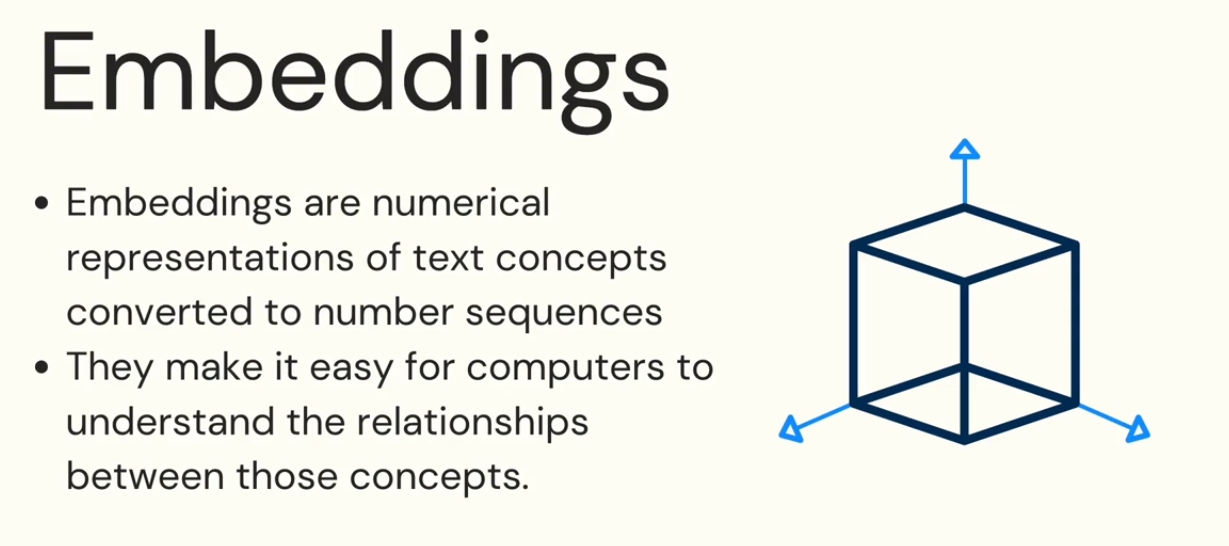

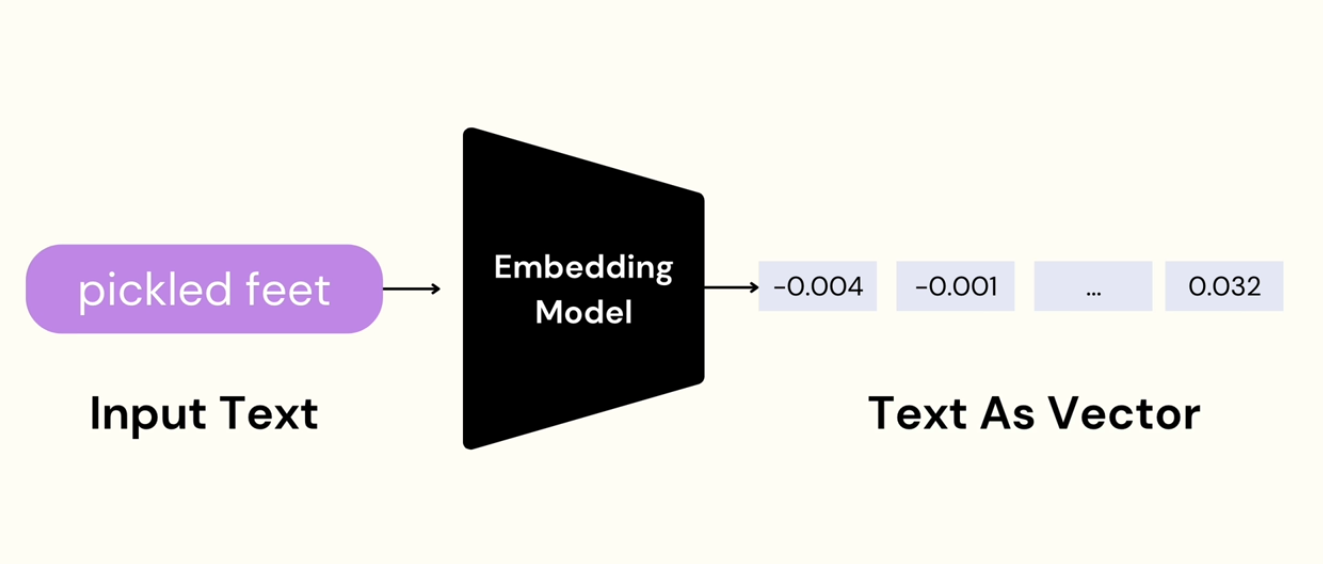

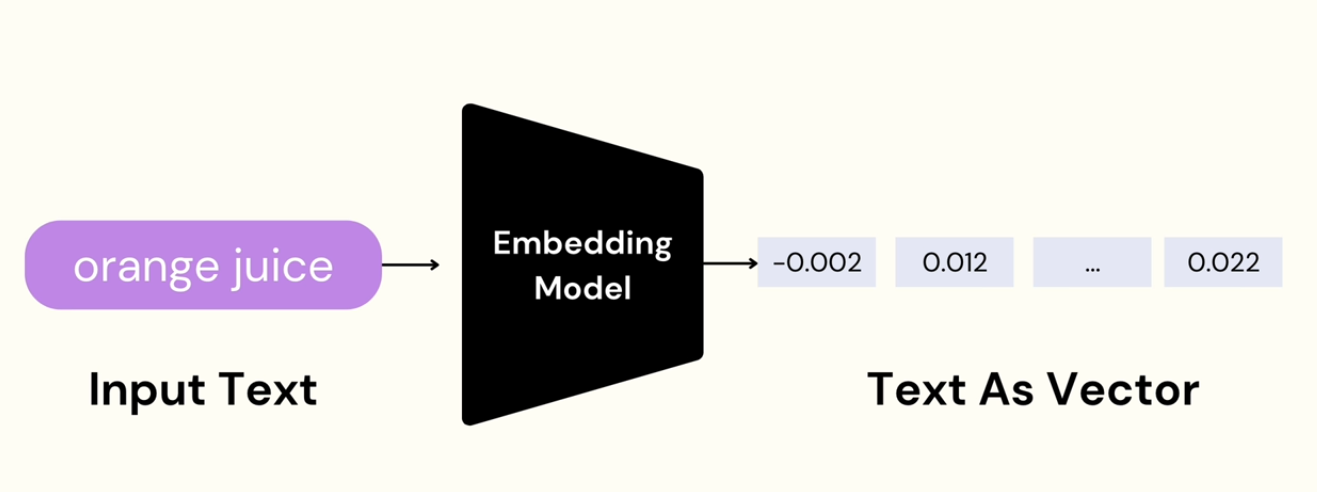

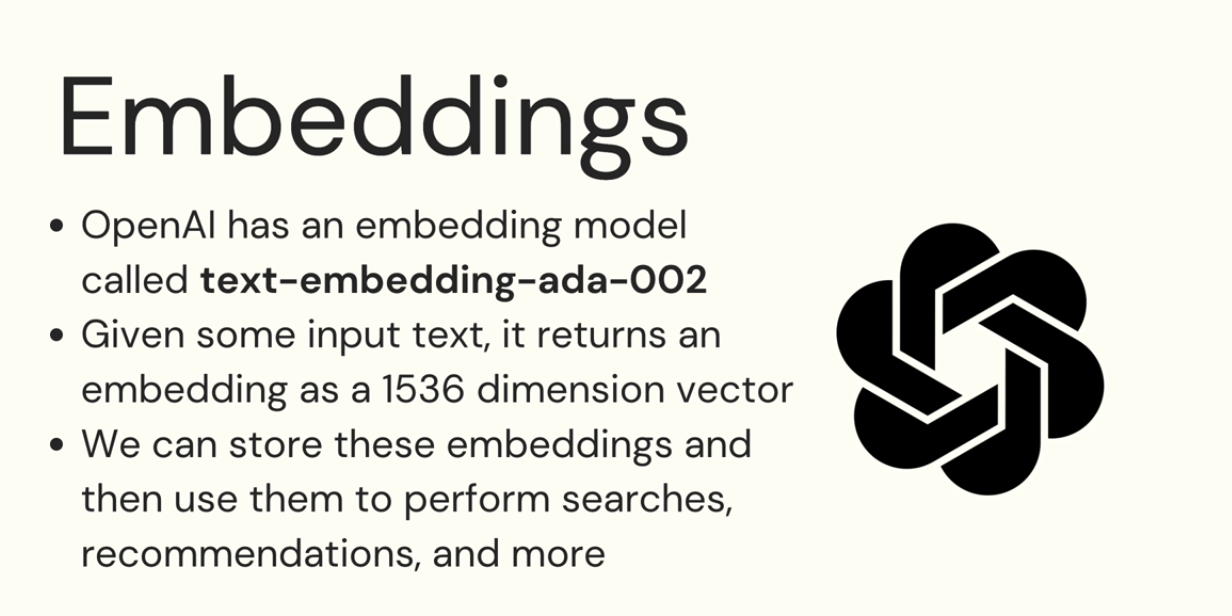

In [4]:
display(Image("./img/1.png"))
display(Image("./img/2.png"))
display(Image("./img/3.png"))
display(Image("./img/4.png"))

***

In [14]:
response = openai.Embedding.create(
            model = "text-embedding-ada-002",
            input = "Suraj Yadav"
)

In [19]:
name_embedding = response.data[0].embedding

In [20]:
type(name_embedding)

list

In [22]:
len(name_embedding)

1536

In [24]:
name_embedding[:10]

[0.020956892520189285,
 -0.005292650777846575,
 -0.0006298588123172522,
 0.005232544615864754,
 -0.03649090602993965,
 0.004184032324701548,
 -0.013343489728868008,
 -0.0077002220787107944,
 -0.027515104040503502,
 -0.0036597761791199446]

***

In [5]:
import numpy as np
import pandas as pd
import json
from tenacity import retry, wait_random_exponential, stop_after_attempt
import pickle
import tiktoken

In [6]:
from tqdm import tqdm

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/parulsethi/DocViz/master/movie_plots.csv")

# df.shape

# df.head()

# df['Genres'].value_counts()

# df.info()

***

In [7]:
ddf = pd.read_csv("./5000_movies.csv")

In [8]:
ddf.head()

budget                                             genres   
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  \
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id   
0                   http://www.avatarmovie.com/   19995  \
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language   
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en  \
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title   
0                                    Avatar  \
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity   
0  In the 22nd century, a paraplegic Marine is di...  150.437577  \
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies   
0  [{"name": "Ingenious Film Partners", "id": 289...  \
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue   
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087  \
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status   
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released  \
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline   
0                     Enter the World of Pandora.  \
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [9]:
ddf.shape

(4803, 20)

In [10]:
json.loads(ddf['genres'].iloc[0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [11]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [12]:
ddf["release_date"] = pd.to_datetime(ddf["release_date"])
ddf = ddf.sort_values("release_date", ascending=False)

In [13]:
ddf.head()

budget                                             genres   
4255        0  [{"id": 35, "name": "Comedy"}, {"id": 10751, "...  \
3408        0  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
3302  8000000                      [{"id": 18, "name": "Drama"}]   
4720  8500000                      [{"id": 18, "name": "Drama"}]   
3249        0                  [{"id": 12, "name": "Adventure"}]   

                                              homepage      id   
4255                http://www.growingupsmithmovie.com  426469  \
3408                                               NaN  325373   
3302                                               NaN  374461   
4720  http://www.foxsearchlight.com/thebirthofanation/  339408   
3249                http://www.focusfeatures.com/kicks  385736   

                                               keywords original_language   
4255                                                 []                en  \
3408  [{"id": 1415, "name": "small town"}, {"id": 46...                en   
3302  [{"id": 1650, "name": "cook"}, {"id": 6054, "n...                en   
4720                  [{"id": 2831, "name": "slavery"}]                en   
3249  [{"id": 3405, "name": "blow job"}, {"id": 1173...                en   

             original_title   
4255       Growing Up Smith  \
3408  Two Lovers and a Bear   
3302             Mr. Church   
4720  The Birth of a Nation   
3249                  Kicks   

                                               overview  popularity   
4255  In 1979, an Indian family moves to America wit...    0.710870  \
3408  Set in a small town near the North Pole where ...    3.139294   
3302  A unique friendship develops when a little gir...    7.828459   
4720  Nat Turner, a former slave in America, leads a...    9.452808   
3249  When his hard-earned kicks get snatched by a l...    3.467923   

                                   production_companies   
4255                                                 []  \
3408                                                 []   
3302  [{"name": "Envision Media Arts", "id": 19456},...   
4720  [{"name": "Phantom Four", "id": 423}, {"name":...   
3249  [{"name": "Bystorm Films", "id": 2903}, {"name...   

                                   production_countries release_date   
4255                                                 []   2017-02-03  \
3408                                                 []   2016-10-02   
3302  [{"iso_3166_1": "US", "name": "United States o...   2016-09-16   
4720  [{"iso_3166_1": "US", "name": "United States o...   2016-09-09   
3249  [{"iso_3166_1": "US", "name": "United States o...   2016-09-09   

       revenue  runtime                          spoken_languages    status   
4255         0    102.0  [{"iso_639_1": "en", "name": "English"}]  Released  \
3408         0     96.0  [{"iso_639_1": "en", "name": "English"}]  Released   
3302         0    104.0  [{"iso_639_1": "en", "name": "English"}]  Released   
4720  15861566    120.0  [{"iso_639_1": "en", "name": "English"}]  Released   
3249         0     80.0  [{"iso_639_1": "en", "name": "English"}]  Released   

                                               tagline                  title   
4255          It’s better to stand out than to fit in.       Growing Up Smith  \
3408                                               NaN  Two Lovers and a Bear   
3302  He was the one person she could always count on.             Mr. Church   
4720                    The Untold Story of Nat Turner  The Birth of a Nation   
3249                            They aren't just shoes                  Kicks   

      vote_average  vote_count  
4255           7.4           7  
3408           6.8          27  
3302           7.0         129  
4720           6.5         178  
3249           7.5          18

In [14]:
ddf['title'].iloc[0]

'Growing Up Smith'

In [15]:
ddf['overview'].iloc[0]

'In 1979, an Indian family moves to America with hopes of living the American Dream. While their 10-year-old boy Smith falls head-over-heels for the girl next door, his desire to become a "good old boy" propels him further away from his family\'s ideals than ever before.'

In [16]:
movie_plots = ddf['overview'].dropna().values

***

In [17]:
@retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(6))
def get_embedding(text, model="text-embedding-ada-002"):

    # replace newlines, which can negatively affect performance.
    text = str(text).replace("\n", " ")

    return openai.Embedding.create(input=text, model=model)["data"][0]["embedding"]

In [18]:
# get_embedding("ChatGPT")

In [19]:
enc = tiktoken.encoding_for_model("text-embedding-ada-002")

In [20]:
total_tokens = np.sum([len(enc.encode(str(plot))) for plot in movie_plots])

In [21]:
total_tokens

311562

In [22]:
cost = total_tokens * (0.0001  / 1000)
print(f"Estimated cost ${cost:.2f}")

Estimated cost $0.03


In [23]:
d = pd.read_pickle("movie_embeddings.pkl")

In [25]:
# establish a cache of embeddings to avoid recomputing
# cache is a dict of tuples (text, model) -> embedding, saved as a pickle file

# set path to embedding cache
embedding_cache_path = "movie_embeddings.pkl"

# load the cache if it exists, and save a copy to disk
try:
    embedding_cache = pd.read_pickle(embedding_cache_path)
except FileNotFoundError:
    embedding_cache = {}
with open(embedding_cache_path, "wb") as embedding_cache_file:
    pickle.dump(embedding_cache, embedding_cache_file)

# define a function to retrieve embeddings from the cache if present, and otherwise request via the API
def embedding_from_string(
    string,
    model="text-embedding-ada-002",
    embedding_cache=embedding_cache
):
    """Return embedding of given string, using a cache to avoid recomputing."""
    if (string, model) not in embedding_cache.keys():
        embedding_cache[(string, model)] = get_embedding(string, model)
        print(f"GOT EMBEDDING FROM OPENAI FOR {string[:20]}")
        with open(embedding_cache_path, "wb") as embedding_cache_file:
            pickle.dump(embedding_cache, embedding_cache_file)
    return embedding_cache[(string, model)]

In [26]:
# This line actaully generates the embeddings
# plot_embeddings = [embedding_from_string(plot, model="text-embedding-ada-002") for plot in movie_plots]

plot_embeddings = [embedding_from_string(str(plot), model="text-embedding-ada-002") for plot in tqdm(movie_plots, desc="Processing movie plots")]


Processing movie plots:   0%|                                                                 | 0/4800 [00:00<?, ?it/s]

GOT EMBEDDING FROM OPENAI FOR Four actors compete 


Processing movie plots:  58%|██████████████████████████████▊                      | 2794/4800 [00:02<00:02, 985.70it/s]

GOT EMBEDDING FROM OPENAI FOR In the third install
GOT EMBEDDING FROM OPENAI FOR From his hospital be
GOT EMBEDDING FROM OPENAI FOR High school football
GOT EMBEDDING FROM OPENAI FOR On the afternoon of 
GOT EMBEDDING FROM OPENAI FOR Beyond Borders is an
GOT EMBEDDING FROM OPENAI FOR Filmmaker Jonathan C
GOT EMBEDDING FROM OPENAI FOR An assassin is shot 
GOT EMBEDDING FROM OPENAI FOR An intergalactic dog
GOT EMBEDDING FROM OPENAI FOR When young Buddy fal
GOT EMBEDDING FROM OPENAI FOR A story about friend
GOT EMBEDDING FROM OPENAI FOR A fictional movie st


Processing movie plots:  58%|██████████████████████████████▊                      | 2794/4800 [00:20<00:02, 985.70it/s]

GOT EMBEDDING FROM OPENAI FOR Matt Lee Whitlock, r


Processing movie plots:  58%|██████████████████████████████▉                      | 2806/4800 [00:20<00:19, 101.70it/s]

GOT EMBEDDING FROM OPENAI FOR Fired from his band 


Processing movie plots:  58%|███████████████████████████████▌                      | 2807/4800 [00:21<00:21, 90.94it/s]

GOT EMBEDDING FROM OPENAI FOR One day, for no appa
GOT EMBEDDING FROM OPENAI FOR When Travis, the mou
GOT EMBEDDING FROM OPENAI FOR When a young couple 
GOT EMBEDDING FROM OPENAI FOR "Secondhand Lions" f
GOT EMBEDDING FROM OPENAI FOR Vampires and werewol
GOT EMBEDDING FROM OPENAI FOR The story of Lehi an
GOT EMBEDDING FROM OPENAI FOR A word for word depi
GOT EMBEDDING FROM OPENAI FOR Five American soldie
GOT EMBEDDING FROM OPENAI FOR Hitman "El Mariachi"
GOT EMBEDDING FROM OPENAI FOR Following the grueso
GOT EMBEDDING FROM OPENAI FOR A young government o
GOT EMBEDDING FROM OPENAI FOR The film tells the s
GOT EMBEDDING FROM OPENAI FOR Follows seemingly un
GOT EMBEDDING FROM OPENAI FOR This is the story of


Processing movie plots:  58%|███████████████████████████████▌                      | 2807/4800 [00:40<00:21, 90.94it/s]

GOT EMBEDDING FROM OPENAI FOR A documentary based 


Processing movie plots:  59%|███████████████████████████████▋                      | 2822/4800 [00:40<00:59, 33.24it/s]

GOT EMBEDDING FROM OPENAI FOR The New York club sc


Processing movie plots:  59%|███████████████████████████████▊                      | 2823/4800 [00:41<01:02, 31.43it/s]

GOT EMBEDDING FROM OPENAI FOR For centuries, a sec
GOT EMBEDDING FROM OPENAI FOR TV child star of the
GOT EMBEDDING FROM OPENAI FOR A futuristic 'Brief 
GOT EMBEDDING FROM OPENAI FOR A revenge-seeking go
GOT EMBEDDING FROM OPENAI FOR This film, adapted f
GOT EMBEDDING FROM OPENAI FOR Two lost souls visit
GOT EMBEDDING FROM OPENAI FOR A former gunslinger 
GOT EMBEDDING FROM OPENAI FOR Forced to work under
GOT EMBEDDING FROM OPENAI FOR Jerry Falk, an aspir
GOT EMBEDDING FROM OPENAI FOR A Jewish-American Pr
GOT EMBEDDING FROM OPENAI FOR A quirky teen with a
GOT EMBEDDING FROM OPENAI FOR When a young man agr
GOT EMBEDDING FROM OPENAI FOR Tracy is a normal 13
GOT EMBEDDING FROM OPENAI FOR Evil dream-demon Fre
GOT EMBEDDING FROM OPENAI FOR An original mix of f


Processing movie plots:  59%|███████████████████████████████▊                      | 2823/4800 [01:00<01:02, 31.43it/s]

GOT EMBEDDING FROM OPENAI FOR A Hong Kong detectiv


Processing movie plots:  59%|███████████████████████████████▉                      | 2839/4800 [01:00<02:12, 14.82it/s]

GOT EMBEDDING FROM OPENAI FOR Amidst unrest, organ


Processing movie plots:  59%|███████████████████████████████▉                      | 2840/4800 [01:01<02:17, 14.24it/s]

GOT EMBEDDING FROM OPENAI FOR After 23 horrifying 
GOT EMBEDDING FROM OPENAI FOR Hondo Harrelson recr
GOT EMBEDDING FROM OPENAI FOR Mother and daughter 
GOT EMBEDDING FROM OPENAI FOR With high school a d
GOT EMBEDDING FROM OPENAI FOR Gigli is ordered to 
GOT EMBEDDING FROM OPENAI FOR In a small North Car
GOT EMBEDDING FROM OPENAI FOR Carmen's caught in a
GOT EMBEDDING FROM OPENAI FOR True story of the un
GOT EMBEDDING FROM OPENAI FOR Lara Croft ventures 
GOT EMBEDDING FROM OPENAI FOR Out-of-control, tras
GOT EMBEDDING FROM OPENAI FOR Mandy Moore stars as
GOT EMBEDDING FROM OPENAI FOR In this true story, 
GOT EMBEDDING FROM OPENAI FOR To prevent a world w
GOT EMBEDDING FROM OPENAI FOR Aaron Davis (Steve S


Processing movie plots:  59%|████████████████████████████████                      | 2854/4800 [01:16<04:04,  7.94it/s]

GOT EMBEDDING FROM OPENAI FOR Jack Sparrow, a free


Processing movie plots:  59%|████████████████████████████████                      | 2855/4800 [01:17<04:14,  7.64it/s]

GOT EMBEDDING FROM OPENAI FOR It's been 10 years s
GOT EMBEDDING FROM OPENAI FOR After Elle Woods, th
GOT EMBEDDING FROM OPENAI FOR The sailor of legend
GOT EMBEDDING FROM OPENAI FOR The Angels are charg
GOT EMBEDDING FROM OPENAI FOR A story of two Russi
GOT EMBEDDING FROM OPENAI FOR A lonely, sexually r
GOT EMBEDDING FROM OPENAI FOR Bruce Banner, a gene
GOT EMBEDDING FROM OPENAI FOR There are times when


Processing movie plots:  59%|████████████████████████████████                      | 2855/4800 [01:30<04:14,  7.64it/s]

GOT EMBEDDING FROM OPENAI FOR Alexia travels with 


Processing movie plots:  60%|████████████████████████████████▏                     | 2864/4800 [01:30<06:56,  4.64it/s]

GOT EMBEDDING FROM OPENAI FOR Writer Alex Sheldon 


Processing movie plots:  60%|████████████████████████████████▏                     | 2865/4800 [01:31<07:17,  4.42it/s]

GOT EMBEDDING FROM OPENAI FOR This wacky prequel t
GOT EMBEDDING FROM OPENAI FOR Rugrats Go Wild is a
GOT EMBEDDING FROM OPENAI FOR When her grandson is
GOT EMBEDDING FROM OPENAI FOR Joe Gavilan (Harriso
GOT EMBEDDING FROM OPENAI FOR A sweet comic film a
GOT EMBEDDING FROM OPENAI FOR It's a major double-


Processing movie plots:  60%|████████████████████████████████▎                     | 2871/4800 [01:40<10:31,  3.05it/s]

GOT EMBEDDING FROM OPENAI FOR Chris crashes into a
GOT EMBEDDING FROM OPENAI FOR Charlie Croker pulle
GOT EMBEDDING FROM OPENAI FOR Nemo, an adventurous
GOT EMBEDDING FROM OPENAI FOR Bruce Nolan toils as


Processing movie plots:  60%|████████████████████████████████▎                     | 2875/4800 [01:44<12:09,  2.64it/s]

GOT EMBEDDING FROM OPENAI FOR In this belated sequ
GOT EMBEDDING FROM OPENAI FOR Teenage girl Osama c
GOT EMBEDDING FROM OPENAI FOR Tiffany, Charlie and


Processing movie plots:  60%|████████████████████████████████▍                     | 2878/4800 [01:47<13:23,  2.39it/s]

GOT EMBEDDING FROM OPENAI FOR In the middle of thi
GOT EMBEDDING FROM OPENAI FOR Tells the seemingly 


Processing movie plots:  60%|████████████████████████████████▍                     | 2880/4800 [01:53<18:54,  1.69it/s]

GOT EMBEDDING FROM OPENAI FOR Six months after the
GOT EMBEDDING FROM OPENAI FOR Two men get laid off


Processing movie plots:  60%|████████████████████████████████▍                     | 2882/4800 [01:56<21:38,  1.48it/s]

GOT EMBEDDING FROM OPENAI FOR Dan Mahowny was a ri


Processing movie plots:  60%|████████████████████████████████▍                     | 2883/4800 [01:58<23:01,  1.39it/s]

GOT EMBEDDING FROM OPENAI FOR After a rough divoce


Processing movie plots:  60%|████████████████████████████████▍                     | 2885/4800 [02:05<37:55,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Lizzie McGuire has g
GOT EMBEDDING FROM OPENAI FOR Complete strangers s


Processing movie plots:  60%|████████████████████████████████▍                     | 2886/4800 [02:06<38:15,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR What Jake Vig doesn'


Processing movie plots:  60%|████████████████████████████████▍                     | 2887/4800 [02:08<38:47,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR Professor Charles Xa


Processing movie plots:  60%|████████████████████████████████▍                     | 2888/4800 [02:09<37:08,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Sixteen American col


Processing movie plots:  60%|████████████████████████████████▌                     | 2889/4800 [02:11<44:19,  1.39s/it]

GOT EMBEDDING FROM OPENAI FOR Stanley's family is 


Processing movie plots:  60%|████████████████████████████████▌                     | 2890/4800 [02:12<41:31,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR A DEA agent investig


Processing movie plots:  60%|████████████████████████████████▌                     | 2891/4800 [02:13<40:13,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Isabelle Adjani and 


Processing movie plots:  60%|████████████████████████████████▌                     | 2892/4800 [02:14<40:46,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR In "A Mighty Wind", 


Processing movie plots:  60%|████████████████████████████████▌                     | 2893/4800 [02:16<39:57,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Playboy Thomas Fuent


Processing movie plots:  60%|████████████████████████████████▌                     | 2894/4800 [02:17<43:20,  1.36s/it]

GOT EMBEDDING FROM OPENAI FOR Two teenage couples 


Processing movie plots:  60%|████████████████████████████████▌                     | 2895/4800 [02:19<44:29,  1.40s/it]

GOT EMBEDDING FROM OPENAI FOR Bill Gluckman, a wea


Processing movie plots:  60%|████████████████████████████████▌                     | 2896/4800 [02:20<44:25,  1.40s/it]

GOT EMBEDDING FROM OPENAI FOR Rowan plays the epon


Processing movie plots:  60%|████████████████████████████████▌                     | 2897/4800 [02:22<51:59,  1.64s/it]

GOT EMBEDDING FROM OPENAI FOR When Vetter's wife i


Processing movie plots:  60%|████████████████████████████████▌                     | 2898/4800 [02:24<47:33,  1.50s/it]

GOT EMBEDDING FROM OPENAI FOR Between sets from hi


Processing movie plots:  60%|████████████████████████████████▌                     | 2899/4800 [02:25<50:50,  1.60s/it]

GOT EMBEDDING FROM OPENAI FOR A compulsive gambler


Processing movie plots:  60%|████████████████████████████████▋                     | 2900/4800 [02:27<51:04,  1.61s/it]

GOT EMBEDDING FROM OPENAI FOR Geophysicist Dr. Jos


Processing movie plots:  60%|████████████████████████████████▋                     | 2901/4800 [02:28<45:25,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR A mysterious and imm


Processing movie plots:  60%|████████████████████████████████▋                     | 2902/4800 [02:30<49:14,  1.56s/it]

GOT EMBEDDING FROM OPENAI FOR An American girl, Da


Processing movie plots:  60%|████████████████████████████████▋                     | 2903/4800 [02:31<47:09,  1.49s/it]

GOT EMBEDDING FROM OPENAI FOR Four boyhood pals pe


Processing movie plots:  60%|████████████████████████████████▋                     | 2904/4800 [02:33<45:30,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR The raunchy, spunky 


Processing movie plots:  61%|████████████████████████████████▋                     | 2905/4800 [02:33<39:48,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Desperate for compan


Processing movie plots:  61%|████████████████████████████████▋                     | 2906/4800 [02:34<37:12,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Recruited by the U.S


Processing movie plots:  61%|████████████████████████████████▋                     | 2907/4800 [02:35<35:59,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR In the wilderness of


Processing movie plots:  61%|████████████████████████████████▋                     | 2908/4800 [02:38<45:23,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR Navy SEAL Lieutenant


Processing movie plots:  61%|████████████████████████████████▋                     | 2909/4800 [02:39<47:27,  1.51s/it]

GOT EMBEDDING FROM OPENAI FOR A Pedro Almodovar pr


Processing movie plots:  61%|████████████████████████████████▋                     | 2910/4800 [02:40<42:07,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR Straight-laced lawye


Processing movie plots:  61%|████████████████████████████████▋                     | 2911/4800 [02:41<38:57,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR Gang leader Tony pul


Processing movie plots:  61%|████████████████████████████████▊                     | 2912/4800 [02:42<38:48,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR The film centers mos


Processing movie plots:  61%|████████████████████████████████▊                     | 2913/4800 [02:44<39:26,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR Three friends attemp


Processing movie plots:  61%|████████████████████████████████▊                     | 2914/4800 [02:45<37:36,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR A man against capita


Processing movie plots:  61%|████████████████████████████████▊                     | 2915/4800 [02:46<41:11,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR The story of a norma


Processing movie plots:  61%|████████████████████████████████▊                     | 2916/4800 [02:47<36:49,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR An affectionate and 


Processing movie plots:  61%|████████████████████████████████▊                     | 2917/4800 [02:48<35:19,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Three generations of


Processing movie plots:  61%|████████████████████████████████▊                     | 2918/4800 [02:49<34:21,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR An advice columnist,


Processing movie plots:  61%|████████████████████████████████▊                     | 2919/4800 [02:52<50:13,  1.60s/it]

GOT EMBEDDING FROM OPENAI FOR Mowgli, missing the 


Processing movie plots:  61%|████████████████████████████████▊                     | 2920/4800 [02:53<45:34,  1.45s/it]

GOT EMBEDDING FROM OPENAI FOR The dynamic duo of C


Processing movie plots:  61%|████████████████████████████████▊                     | 2921/4800 [02:55<48:32,  1.55s/it]

GOT EMBEDDING FROM OPENAI FOR When Kimberly has a 


Processing movie plots:  61%|████████████████████████████████▊                     | 2922/4800 [02:56<46:26,  1.48s/it]

GOT EMBEDDING FROM OPENAI FOR Jared Phelps (Kirby 


Processing movie plots:  61%|████████████████████████████████▉                     | 2923/4800 [02:57<40:10,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR On the east coast of


Processing movie plots:  61%|████████████████████████████████▉                     | 2924/4800 [02:58<39:34,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR When his only friend


Processing movie plots:  61%|████████████████████████████████▉                     | 2925/4800 [02:59<35:24,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR A vengeful spirit ha


Processing movie plots:  61%|████████████████████████████████▉                     | 2926/4800 [03:00<33:27,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Home movies, photogr


Processing movie plots:  61%|████████████████████████████████▉                     | 2927/4800 [03:01<35:50,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Quirky and rebelliou


Processing movie plots:  61%|████████████████████████████████▉                     | 2928/4800 [03:02<33:15,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR (William H. Macy) wo


Processing movie plots:  61%|████████████████████████████████▉                     | 2929/4800 [03:03<33:43,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Duncan Mudge, mid-te


Processing movie plots:  61%|████████████████████████████████▉                     | 2930/4800 [03:05<34:29,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Two childhood friend


Processing movie plots:  61%|████████████████████████████████▉                     | 2931/4800 [03:05<32:10,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Paul Morse is a good


Processing movie plots:  61%|████████████████████████████████▉                     | 2932/4800 [03:07<32:58,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Tom Leezak and Sarah


Processing movie plots:  61%|████████████████████████████████▉                     | 2933/4800 [03:07<31:20,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR A Jewish blaxploitat


Processing movie plots:  61%|█████████████████████████████████                     | 2934/4800 [03:09<39:05,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Jay Austin wants to 


Processing movie plots:  61%|█████████████████████████████████                     | 2935/4800 [03:10<37:01,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR With no clue how he 


Processing movie plots:  61%|█████████████████████████████████                     | 2936/4800 [03:12<37:13,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR "We are all angels. 


Processing movie plots:  61%|█████████████████████████████████                     | 2937/4800 [03:13<35:33,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR It is July, 2000 Ric


Processing movie plots:  61%|█████████████████████████████████                     | 2938/4800 [03:14<34:28,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR When a presidential 


Processing movie plots:  61%|█████████████████████████████████                     | 2939/4800 [03:14<31:42,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Television made him 


Processing movie plots:  61%|█████████████████████████████████                     | 2940/4800 [03:16<37:35,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR The Charles Dickens 


Processing movie plots:  61%|█████████████████████████████████                     | 2941/4800 [03:17<32:44,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR "The Hours" is the s


Processing movie plots:  61%|█████████████████████████████████                     | 2942/4800 [03:18<31:33,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Murderesses Velma Ke


Processing movie plots:  61%|█████████████████████████████████                     | 2943/4800 [03:19<31:45,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR A true story about F


Processing movie plots:  61%|█████████████████████████████████                     | 2944/4800 [03:20<29:54,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Eliza and Debbie are


Processing movie plots:  61%|█████████████████████████████████▏                    | 2945/4800 [03:21<30:20,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A sailor prone to vi


Processing movie plots:  61%|█████████████████████████████████▏                    | 2946/4800 [03:21<28:35,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR Dedicated environmen


Processing movie plots:  61%|█████████████████████████████████▏                    | 2947/4800 [03:22<26:45,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR One man defeated thr


Processing movie plots:  61%|█████████████████████████████████▏                    | 2948/4800 [03:23<29:08,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Frodo and Sam are tr


Processing movie plots:  61%|█████████████████████████████████▏                    | 2949/4800 [03:24<27:50,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR The filmed adaptatio


Processing movie plots:  61%|█████████████████████████████████▏                    | 2950/4800 [03:25<29:14,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR It's 1863. America w


Processing movie plots:  61%|█████████████████████████████████▏                    | 2951/4800 [03:26<29:53,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Set during the Rodne


Processing movie plots:  62%|█████████████████████████████████▏                    | 2952/4800 [03:27<32:10,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR A fish-out-of-water 


Processing movie plots:  62%|█████████████████████████████████▏                    | 2953/4800 [03:28<32:01,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR En route to the hone


Processing movie plots:  62%|█████████████████████████████████▏                    | 2954/4800 [03:30<35:26,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Marisa Ventura is a 


Processing movie plots:  62%|█████████████████████████████████▏                    | 2955/4800 [03:30<31:38,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR 66-year-old Warren S


Processing movie plots:  62%|█████████████████████████████████▎                    | 2956/4800 [03:32<33:22,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR A mentally disturbed


Processing movie plots:  62%|█████████████████████████████████▎                    | 2957/4800 [03:33<34:06,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR A love-lorn script w


Processing movie plots:  62%|█████████████████████████████████▎                    | 2958/4800 [03:35<41:05,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR In a dystopian futur


Processing movie plots:  62%|█████████████████████████████████▎                    | 2959/4800 [03:36<40:50,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR The mafia's Paul Vit


Processing movie plots:  62%|█████████████████████████████████▎                    | 2960/4800 [03:37<35:49,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR While filming an adv


Processing movie plots:  62%|█████████████████████████████████▎                    | 2961/4800 [03:38<33:17,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR When space galleon c


Processing movie plots:  62%|█████████████████████████████████▎                    | 2962/4800 [03:39<33:16,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR William Hundert is a


Processing movie plots:  62%|█████████████████████████████████▎                    | 2963/4800 [03:40<34:09,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR A stylish political 


Processing movie plots:  62%|█████████████████████████████████▎                    | 2964/4800 [03:42<38:58,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR Craig and Day Day ha


Processing movie plots:  62%|█████████████████████████████████▎                    | 2965/4800 [03:43<36:31,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR A New York press age


Processing movie plots:  62%|█████████████████████████████████▎                    | 2966/4800 [03:44<34:51,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Bond takes on a Nort


Processing movie plots:  62%|█████████████████████████████████▍                    | 2967/4800 [03:45<35:48,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR This movie tells the


Processing movie plots:  62%|█████████████████████████████████▍                    | 2968/4800 [03:46<34:08,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Ignoring threats to 


Processing movie plots:  62%|█████████████████████████████████▍                    | 2969/4800 [03:47<35:22,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR The setting is Detro


Processing movie plots:  62%|█████████████████████████████████▍                    | 2970/4800 [03:49<39:33,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR A woman tries to str


Processing movie plots:  62%|█████████████████████████████████▍                    | 2971/4800 [03:50<35:16,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR After witnessing a h


Processing movie plots:  62%|█████████████████████████████████▍                    | 2972/4800 [03:50<31:14,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Beautiful, sophistic


Processing movie plots:  62%|█████████████████████████████████▍                    | 2973/4800 [03:51<30:24,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Better watch out! Th


Processing movie plots:  62%|█████████████████████████████████▍                    | 2974/4800 [03:52<29:46,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Twenty-eight days af


Processing movie plots:  62%|█████████████████████████████████▍                    | 2975/4800 [03:54<36:32,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR When the Switchblade


Processing movie plots:  62%|█████████████████████████████████▍                    | 2976/4800 [03:56<40:24,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR A beleaguered small-


Processing movie plots:  62%|█████████████████████████████████▍                    | 2977/4800 [03:56<35:05,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR After discovering a 


Processing movie plots:  62%|█████████████████████████████████▌                    | 2978/4800 [03:57<34:39,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR The year is 1890 and


Processing movie plots:  62%|█████████████████████████████████▌                    | 2979/4800 [03:58<33:28,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Johnny Knoxville and


Processing movie plots:  62%|█████████████████████████████████▌                    | 2980/4800 [04:00<36:33,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR A successful TV star


Processing movie plots:  62%|█████████████████████████████████▌                    | 2981/4800 [04:01<40:26,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR A psychological thri


Processing movie plots:  62%|█████████████████████████████████▌                    | 2982/4800 [04:03<37:38,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR Natalie Babbitt's aw


Processing movie plots:  62%|█████████████████████████████████▌                    | 2983/4800 [04:04<35:37,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Stranded and alone o


Processing movie plots:  62%|█████████████████████████████████▌                    | 2984/4800 [04:05<35:51,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR A teenager journeys 


Processing movie plots:  62%|█████████████████████████████████▌                    | 2985/4800 [04:06<40:08,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR The incredibly spoil


Processing movie plots:  62%|████████████████████████████████▎                   | 2986/4800 [04:11<1:09:04,  2.28s/it]

GOT EMBEDDING FROM OPENAI FOR Why do 11,000 people


Processing movie plots:  62%|█████████████████████████████████▌                    | 2987/4800 [04:12<56:49,  1.88s/it]

GOT EMBEDDING FROM OPENAI FOR Sidney is a writer w


Processing movie plots:  62%|█████████████████████████████████▌                    | 2988/4800 [04:13<48:44,  1.61s/it]

GOT EMBEDDING FROM OPENAI FOR Get ready as Bob the


Processing movie plots:  62%|█████████████████████████████████▋                    | 2989/4800 [04:15<50:25,  1.67s/it]

GOT EMBEDDING FROM OPENAI FOR Former Special Force


Processing movie plots:  62%|█████████████████████████████████▋                    | 2990/4800 [04:16<44:54,  1.49s/it]

GOT EMBEDDING FROM OPENAI FOR A teenage girl moves


Processing movie plots:  62%|█████████████████████████████████▋                    | 2991/4800 [04:17<40:42,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR Two straight men mis


Processing movie plots:  62%|█████████████████████████████████▋                    | 2992/4800 [04:18<44:13,  1.47s/it]

GOT EMBEDDING FROM OPENAI FOR An unsuspecting, dis


Processing movie plots:  62%|█████████████████████████████████▋                    | 2993/4800 [04:20<45:49,  1.52s/it]

GOT EMBEDDING FROM OPENAI FOR The young Father Ama


Processing movie plots:  62%|█████████████████████████████████▋                    | 2994/4800 [04:21<39:25,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR Former FBI Agent Wil


Processing movie plots:  62%|█████████████████████████████████▋                    | 2995/4800 [04:23<41:34,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR After the closure of


Processing movie plots:  62%|█████████████████████████████████▋                    | 2996/4800 [04:24<39:10,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR Cabbie-turned-chauff


Processing movie plots:  62%|█████████████████████████████████▋                    | 2997/4800 [04:25<36:35,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR New York fashion des


Processing movie plots:  62%|█████████████████████████████████▋                    | 2998/4800 [04:26<39:38,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR The Pianist is a fil


Processing movie plots:  62%|█████████████████████████████████▋                    | 2999/4800 [04:27<35:44,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR In the late '60s, th


Processing movie plots:  62%|█████████████████████████████████▊                    | 3000/4800 [04:28<33:07,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Jonathan Ecks, an FB


Processing movie plots:  63%|█████████████████████████████████▊                    | 3001/4800 [04:29<35:26,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Unsure of what to do


Processing movie plots:  63%|█████████████████████████████████▊                    | 3002/4800 [04:30<34:28,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR A witty and clever c


Processing movie plots:  63%|█████████████████████████████████▊                    | 3003/4800 [04:32<34:46,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR A young man's peculi


Processing movie plots:  63%|█████████████████████████████████▊                    | 3004/4800 [04:33<35:12,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR John and his girlfri


Processing movie plots:  63%|█████████████████████████████████▊                    | 3005/4800 [04:34<38:04,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR As he copes with the


Processing movie plots:  63%|█████████████████████████████████▊                    | 3006/4800 [04:36<38:34,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR A slick New York pub


Processing movie plots:  63%|█████████████████████████████████▊                    | 3007/4800 [04:37<36:32,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR The story, set in 18


Processing movie plots:  63%|█████████████████████████████████▊                    | 3008/4800 [04:38<34:36,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR Ben Cronin has it al


Processing movie plots:  63%|█████████████████████████████████▊                    | 3009/4800 [04:39<31:37,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR A man struggling to 


Processing movie plots:  63%|█████████████████████████████████▊                    | 3010/4800 [04:39<29:21,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR An urban hotel in Lo


Processing movie plots:  63%|█████████████████████████████████▊                    | 3011/4800 [04:40<29:44,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Tom Ripley - cool, u


Processing movie plots:  63%|█████████████████████████████████▉                    | 3012/4800 [04:41<30:02,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR In 1950s Connecticut


Processing movie plots:  63%|█████████████████████████████████▉                    | 3013/4800 [04:43<39:23,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR "Frida" chronicles t


Processing movie plots:  63%|█████████████████████████████████▉                    | 3014/4800 [04:44<35:48,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Lilya lives in pover


Processing movie plots:  63%|█████████████████████████████████▉                    | 3015/4800 [04:46<36:44,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Monroe Hutchens is t


Processing movie plots:  63%|█████████████████████████████████▉                    | 3016/4800 [04:47<34:00,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Bored with Bollywood


Processing movie plots:  63%|█████████████████████████████████▉                    | 3017/4800 [04:48<35:44,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Sy "the photo guy" P


Processing movie plots:  63%|█████████████████████████████████▉                    | 3018/4800 [04:49<36:02,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Serving Sara is a 20


Processing movie plots:  63%|█████████████████████████████████▉                    | 3019/4800 [04:50<34:19,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR The year is 2087, th


Processing movie plots:  63%|█████████████████████████████████▉                    | 3020/4800 [04:51<34:49,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Xander Cage is your 


Processing movie plots:  63%|█████████████████████████████████▉                    | 3021/4800 [04:53<35:12,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR With four corpses on


Processing movie plots:  63%|█████████████████████████████████▉                    | 3022/4800 [04:54<31:58,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Nothing gets between


Processing movie plots:  63%|██████████████████████████████████                    | 3023/4800 [04:54<28:43,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Exploring the furthe


Processing movie plots:  63%|██████████████████████████████████                    | 3024/4800 [04:55<30:02,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Still recovering fro


Processing movie plots:  63%|██████████████████████████████████                    | 3025/4800 [04:57<32:08,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR A family living on a


Processing movie plots:  63%|██████████████████████████████████                    | 3026/4800 [04:58<31:42,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR A contemporary comed


Processing movie plots:  63%|██████████████████████████████████                    | 3027/4800 [04:59<32:40,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR A sweet-natured Ital


Processing movie plots:  63%|██████████████████████████████████                    | 3028/4800 [05:00<32:09,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR The controversial ba


Processing movie plots:  63%|██████████████████████████████████                    | 3029/4800 [05:01<29:43,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Aussie adventurer St


Processing movie plots:  63%|██████████████████████████████████                    | 3030/4800 [05:02<28:56,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR The world's most sha


Processing movie plots:  63%|██████████████████████████████████                    | 3031/4800 [05:02<26:39,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR For Beary Barrington


Processing movie plots:  63%|██████████████████████████████████                    | 3032/4800 [05:03<25:39,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR Stuart, an adorable 


Processing movie plots:  63%|██████████████████████████████████                    | 3033/4800 [05:04<26:58,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR When Russia's first 


Processing movie plots:  63%|██████████████████████████████████▏                   | 3034/4800 [05:05<28:07,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR The residents of a r


Processing movie plots:  63%|██████████████████████████████████▏                   | 3035/4800 [05:07<34:04,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR Mike Sullivan works 


Processing movie plots:  63%|██████████████████████████████████▏                   | 3036/4800 [05:08<32:42,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR In post-apocalyptic 


Processing movie plots:  63%|██████████████████████████████████▏                   | 3037/4800 [05:09<30:23,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Two people who have 


Processing movie plots:  63%|██████████████████████████████████▏                   | 3038/4800 [05:10<35:31,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Kay and Jay reunite 


Processing movie plots:  63%|██████████████████████████████████▏                   | 3039/4800 [05:11<33:53,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Calvin and his frien


Processing movie plots:  63%|██████████████████████████████████▏                   | 3040/4800 [05:12<31:06,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Serial Killer Michae


Processing movie plots:  63%|██████████████████████████████████▏                   | 3041/4800 [05:13<32:31,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR When Longfellow Deed


Processing movie plots:  63%|██████████████████████████████████▏                   | 3042/4800 [05:15<34:43,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR When a powerful deve


Processing movie plots:  63%|██████████████████████████████████▏                   | 3043/4800 [05:16<39:09,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR A lonely Hawaiian gi


Processing movie plots:  63%|██████████████████████████████████▏                   | 3044/4800 [05:17<35:35,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR A woman and her new 


Processing movie plots:  63%|██████████████████████████████████▎                   | 3045/4800 [05:20<47:23,  1.62s/it]

GOT EMBEDDING FROM OPENAI FOR A basketball star is


Processing movie plots:  63%|██████████████████████████████████▎                   | 3046/4800 [05:21<41:58,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR John Anderton is a t


Processing movie plots:  63%|██████████████████████████████████▎                   | 3047/4800 [05:22<40:22,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR Wounded to the brink


Processing movie plots:  64%|██████████████████████████████████▎                   | 3048/4800 [05:23<37:17,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR Joe Enders is a gung


Processing movie plots:  64%|██████████████████████████████████▎                   | 3049/4800 [05:24<36:41,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR A group of Catholic 


Processing movie plots:  64%|██████████████████████████████████▎                   | 3050/4800 [05:25<34:43,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR The Mystery Inc. gan


Processing movie plots:  64%|██████████████████████████████████▎                   | 3051/4800 [05:28<42:03,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR Bubba Ho-tep tells t


Processing movie plots:  64%|██████████████████████████████████▎                   | 3052/4800 [05:29<42:12,  1.45s/it]

GOT EMBEDDING FROM OPENAI FOR When a Harvard-educa


Processing movie plots:  64%|██████████████████████████████████▎                   | 3053/4800 [05:30<38:20,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR A retired pool hustl


Processing movie plots:  64%|██████████████████████████████████▎                   | 3054/4800 [05:31<33:54,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A mother and daughte


Processing movie plots:  64%|██████████████████████████████████▎                   | 3055/4800 [05:32<31:00,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Over the course of t


Processing movie plots:  64%|██████████████████████████████████▍                   | 3056/4800 [05:33<31:22,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR When the president o


Processing movie plots:  64%|██████████████████████████████████▍                   | 3057/4800 [05:34<30:08,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR An Afro-American org


Processing movie plots:  64%|██████████████████████████████████▍                   | 3058/4800 [05:35<30:04,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Working-class waitre


Processing movie plots:  64%|██████████████████████████████████▍                   | 3059/4800 [05:36<31:31,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR As a wild stallion t


Processing movie plots:  64%|██████████████████████████████████▍                   | 3060/4800 [05:37<30:07,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Two Los Angeles homi


Processing movie plots:  64%|██████████████████████████████████▍                   | 3061/4800 [05:38<28:11,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Five hapless inner-c


Processing movie plots:  64%|██████████████████████████████████▍                   | 3062/4800 [05:39<27:46,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Events over the cour


Processing movie plots:  64%|██████████████████████████████████▍                   | 3063/4800 [05:40<35:21,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR A variety of charact


Processing movie plots:  64%|██████████████████████████████████▍                   | 3064/4800 [05:41<33:39,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR Penny's love for her


Processing movie plots:  64%|██████████████████████████████████▍                   | 3065/4800 [05:42<30:28,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Two young gentlemen 


Processing movie plots:  64%|██████████████████████████████████▍                   | 3066/4800 [05:43<30:18,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR A strait-laced Frenc


Processing movie plots:  64%|██████████████████████████████████▌                   | 3067/4800 [05:44<30:02,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR The film follows Vic


Processing movie plots:  64%|██████████████████████████████████▌                   | 3068/4800 [05:45<28:28,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Ten years after the 


Processing movie plots:  64%|██████████████████████████████████▌                   | 3069/4800 [05:46<28:25,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Nerdy high school se


Processing movie plots:  64%|██████████████████████████████████▌                   | 3070/4800 [05:47<30:02,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Connie is a wife and


Processing movie plots:  64%|██████████████████████████████████▌                   | 3071/4800 [05:49<31:14,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Out of work TV camer


Processing movie plots:  64%|██████████████████████████████████▌                   | 3072/4800 [05:50<31:33,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Woody Allen stars as


Processing movie plots:  64%|██████████████████████████████████▌                   | 3073/4800 [05:51<31:00,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR 1950s New York City.


Processing movie plots:  64%|██████████████████████████████████▌                   | 3074/4800 [05:52<30:51,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR After being bitten b


Processing movie plots:  64%|██████████████████████████████████▌                   | 3075/4800 [05:53<30:56,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A reporter Lanie Ker


Processing movie plots:  64%|██████████████████████████████████▌                   | 3076/4800 [05:56<49:00,  1.71s/it]

GOT EMBEDDING FROM OPENAI FOR Will Freeman is a hi


Processing movie plots:  64%|██████████████████████████████████▌                   | 3077/4800 [05:57<43:04,  1.50s/it]

GOT EMBEDDING FROM OPENAI FOR Tenacious homicide d


Processing movie plots:  64%|██████████████████████████████████▋                   | 3078/4800 [05:58<39:01,  1.36s/it]

GOT EMBEDDING FROM OPENAI FOR In ancient Egypt, pe


Processing movie plots:  64%|██████████████████████████████████▋                   | 3079/4800 [05:59<36:04,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Christina's love lif


Processing movie plots:  64%|██████████████████████████████████▋                   | 3080/4800 [06:00<32:37,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Jess Bhamra, the dau


Processing movie plots:  64%|██████████████████████████████████▋                   | 3081/4800 [06:01<30:26,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR A rush-hour fender-b


Processing movie plots:  64%|██████████████████████████████████▋                   | 3082/4800 [06:02<32:44,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR The story of how a m


Processing movie plots:  64%|██████████████████████████████████▋                   | 3083/4800 [06:03<31:55,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR High powered lawyer 


Processing movie plots:  64%|██████████████████████████████████▋                   | 3084/4800 [06:04<30:47,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A day in the life of


Processing movie plots:  64%|██████████████████████████████████▋                   | 3085/4800 [06:05<32:32,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Van Wilder has been 


Processing movie plots:  64%|██████████████████████████████████▋                   | 3086/4800 [06:06<31:08,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Trapped in their New


Processing movie plots:  64%|██████████████████████████████████▋                   | 3087/4800 [06:07<28:58,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Tells the story of R


Processing movie plots:  64%|██████████████████████████████████▋                   | 3088/4800 [06:08<28:54,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Jim Morris never mad


Processing movie plots:  64%|██████████████████████████████████▊                   | 3089/4800 [06:09<28:43,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Pete, an eight-year-


Processing movie plots:  64%|██████████████████████████████████▊                   | 3090/4800 [06:11<30:45,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Three friends who he


Processing movie plots:  64%|██████████████████████████████████▊                   | 3091/4800 [06:12<30:14,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR A rare mutation has 


Processing movie plots:  64%|██████████████████████████████████▊                   | 3092/4800 [06:12<28:10,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Until now, Zak Gibbs


Processing movie plots:  64%|██████████████████████████████████▊                   | 3093/4800 [06:13<28:30,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR When a virus leaks f


Processing movie plots:  64%|██████████████████████████████████▊                   | 3094/4800 [06:15<29:26,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR With the impending i


Processing movie plots:  64%|██████████████████████████████████▊                   | 3095/4800 [06:16<29:59,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Bucum Jackson (Cube)


Processing movie plots:  64%|██████████████████████████████████▊                   | 3096/4800 [06:17<30:08,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Hoping to alter the 


Processing movie plots:  65%|██████████████████████████████████▊                   | 3097/4800 [06:18<31:27,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Matt Sullivan's last


Processing movie plots:  65%|██████████████████████████████████▊                   | 3098/4800 [06:19<28:52,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR The story of the fir


Processing movie plots:  65%|██████████████████████████████████▊                   | 3099/4800 [06:20<28:59,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR A ballet rendition o


Processing movie plots:  65%|██████████████████████████████████▉                   | 3100/4800 [06:21<29:02,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR A young Greek woman 


Processing movie plots:  65%|██████████████████████████████████▉                   | 3101/4800 [06:22<28:47,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR For some married cou


Processing movie plots:  65%|██████████████████████████████████▉                   | 3102/4800 [06:23<28:03,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR A grieving doctor is


Processing movie plots:  65%|██████████████████████████████████▉                   | 3103/4800 [06:24<27:25,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Fourth-generation Ar


Processing movie plots:  65%|██████████████████████████████████▉                   | 3104/4800 [06:25<29:40,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Three friends get to


Processing movie plots:  65%|██████████████████████████████████▉                   | 3105/4800 [06:26<29:16,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR John Quincy Archibal


Processing movie plots:  65%|██████████████████████████████████▉                   | 3106/4800 [06:27<30:00,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR The classic tale of 


Processing movie plots:  65%|██████████████████████████████████▉                   | 3107/4800 [06:28<30:36,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR The film "Amen." exa


Processing movie plots:  65%|██████████████████████████████████▉                   | 3108/4800 [06:29<29:42,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Lestat de Lioncourt 


Processing movie plots:  65%|██████████████████████████████████▉                   | 3109/4800 [06:30<28:19,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR Fourteen-year-old Ja


Processing movie plots:  65%|██████████████████████████████████▉                   | 3110/4800 [06:31<28:16,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR From the director of


Processing movie plots:  65%|██████████████████████████████████▉                   | 3111/4800 [06:32<28:18,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Firefighter Gordon B


Processing movie plots:  65%|███████████████████████████████████                   | 3112/4800 [06:33<29:22,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Cidade de Deus is a 


Processing movie plots:  65%|███████████████████████████████████                   | 3113/4800 [06:34<28:27,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR In 1931, three abori


Processing movie plots:  65%|███████████████████████████████████                   | 3114/4800 [06:35<28:30,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Dave, Sam and Jeff a


Processing movie plots:  65%|███████████████████████████████████                   | 3115/4800 [06:36<28:35,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR When Jonathan Jordan


Processing movie plots:  65%|███████████████████████████████████                   | 3116/4800 [06:37<29:31,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Reporter John Klein 


Processing movie plots:  65%|███████████████████████████████████                   | 3117/4800 [06:40<40:21,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR A movie within a mov


Processing movie plots:  65%|███████████████████████████████████                   | 3118/4800 [06:41<40:25,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR When the popular, re


Processing movie plots:  65%|███████████████████████████████████                   | 3119/4800 [06:42<35:11,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Edmond Dantés's life


Processing movie plots:  65%|███████████████████████████████████                   | 3120/4800 [06:43<33:06,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR When a Miami dentist


Processing movie plots:  65%|███████████████████████████████████                   | 3121/4800 [06:44<33:14,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR A failed New Jersey 


Processing movie plots:  65%|███████████████████████████████████                   | 3122/4800 [06:45<30:20,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR The dramatised story


Processing movie plots:  65%|███████████████████████████████████▏                  | 3123/4800 [06:46<30:15,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Fifteen years ago, t


Processing movie plots:  65%|███████████████████████████████████▏                  | 3124/4800 [06:47<29:14,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Seymour Polatkin is 


Processing movie plots:  65%|███████████████████████████████████▏                  | 3125/4800 [06:48<29:12,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR An undercover narc d


Processing movie plots:  65%|███████████████████████████████████▏                  | 3126/4800 [06:49<27:16,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Psychological horror


Processing movie plots:  65%|███████████████████████████████████▏                  | 3127/4800 [06:50<27:29,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Two friends named Ge


Processing movie plots:  65%|███████████████████████████████████▏                  | 3128/4800 [06:51<27:48,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR A group of over-achi


Processing movie plots:  65%|███████████████████████████████████▏                  | 3129/4800 [06:52<26:14,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR A discount store cle


Processing movie plots:  65%|███████████████████████████████████▏                  | 3130/4800 [06:53<28:42,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR A young woman, recen


Processing movie plots:  65%|███████████████████████████████████▏                  | 3131/4800 [06:54<27:09,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Gifted 18-year-old M


Processing movie plots:  65%|███████████████████████████████████▏                  | 3132/4800 [06:55<29:11,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Eight women gather t


Processing movie plots:  65%|███████████████████████████████████▏                  | 3133/4800 [06:56<28:00,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR A disgraced FBI agen


Processing movie plots:  65%|███████████████████████████████████▎                  | 3134/4800 [06:57<27:12,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Jack is caught with 


Processing movie plots:  65%|███████████████████████████████████▎                  | 3135/4800 [06:58<32:48,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Drama set in 1930s L


Processing movie plots:  65%|███████████████████████████████████▎                  | 3136/4800 [06:59<29:43,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR There's more to Ana 


Processing movie plots:  65%|███████████████████████████████████▎                  | 3137/4800 [07:00<27:42,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Following her boyfri


Processing movie plots:  65%|███████████████████████████████████▎                  | 3138/4800 [07:01<27:48,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR A con man (Dillon) t


Processing movie plots:  65%|███████████████████████████████████▎                  | 3139/4800 [07:02<26:03,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Joseph just broke up


Processing movie plots:  65%|███████████████████████████████████▎                  | 3140/4800 [07:03<27:50,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR A young man finds so


Processing movie plots:  65%|███████████████████████████████████▎                  | 3141/4800 [07:04<27:02,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR After the murder of 


Processing movie plots:  65%|███████████████████████████████████▎                  | 3142/4800 [07:05<25:34,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR Sam has the mental c


Processing movie plots:  65%|███████████████████████████████████▎                  | 3143/4800 [07:06<23:49,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR When U.S. Rangers an


Processing movie plots:  66%|███████████████████████████████████▎                  | 3144/4800 [07:06<24:23,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Disgraced ex-England


Processing movie plots:  66%|███████████████████████████████████▍                  | 3145/4800 [07:07<23:57,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR When her scientist e


Processing movie plots:  66%|███████████████████████████████████▍                  | 3146/4800 [07:08<26:46,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Multi-platinum rap s


Processing movie plots:  66%|███████████████████████████████████▍                  | 3147/4800 [07:10<30:41,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Jimmy Neutron is a b


Processing movie plots:  66%|███████████████████████████████████▍                  | 3148/4800 [07:11<30:04,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Set in 1951, a black


Processing movie plots:  66%|███████████████████████████████████▍                  | 3149/4800 [07:12<27:28,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR When underappreciate


Processing movie plots:  66%|███████████████████████████████████▍                  | 3150/4800 [07:12<25:17,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR An emotionally-beate


Processing movie plots:  66%|███████████████████████████████████▍                  | 3151/4800 [07:14<27:00,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Young hobbit Frodo B


Processing movie plots:  66%|███████████████████████████████████▍                  | 3152/4800 [07:15<26:31,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR True story of the li


Processing movie plots:  66%|███████████████████████████████████▍                  | 3153/4800 [07:15<25:54,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR The cameras of Jacqu


Processing movie plots:  66%|███████████████████████████████████▍                  | 3154/4800 [07:17<28:20,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR A Jewish woman named


Processing movie plots:  66%|███████████████████████████████████▍                  | 3155/4800 [07:18<26:38,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR In 1964, a brash new


Processing movie plots:  66%|███████████████████████████████████▌                  | 3156/4800 [07:18<25:07,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR At Princeton Univers


Processing movie plots:  66%|███████████████████████████████████▌                  | 3157/4800 [07:19<26:02,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR David Aames (Tom Cru


Processing movie plots:  66%|███████████████████████████████████▌                  | 3158/4800 [07:20<27:31,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Less than 24 hours i


Processing movie plots:  66%|███████████████████████████████████▌                  | 3159/4800 [07:21<26:54,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Elmo McElroy is a st


Processing movie plots:  66%|███████████████████████████████████▌                  | 3160/4800 [07:22<27:21,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR On a bet, a gridiron


Processing movie plots:  66%|███████████████████████████████████▌                  | 3161/4800 [07:23<27:26,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR Gary Sinise plays Sp


Processing movie plots:  66%|███████████████████████████████████▌                  | 3162/4800 [07:24<24:39,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Ten years after the 


Processing movie plots:  66%|███████████████████████████████████▌                  | 3163/4800 [07:25<25:09,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR Summertime on the co


Processing movie plots:  66%|███████████████████████████████████▌                  | 3164/4800 [07:26<26:03,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A dentist finds hims


Processing movie plots:  66%|███████████████████████████████████▌                  | 3165/4800 [07:28<30:04,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Martin Lawrence play


Processing movie plots:  66%|███████████████████████████████████▌                  | 3166/4800 [07:29<29:15,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Animal House meets C


Processing movie plots:  66%|███████████████████████████████████▋                  | 3167/4800 [07:30<30:18,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Veteran spy Nathan M


Processing movie plots:  66%|███████████████████████████████████▋                  | 3168/4800 [07:31<27:10,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR While flying a routi


Processing movie plots:  66%|███████████████████████████████████▋                  | 3169/4800 [07:31<26:26,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR A man confesses to a


Processing movie plots:  66%|███████████████████████████████████▋                  | 3170/4800 [07:32<26:51,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Harry Potter has liv


Processing movie plots:  66%|███████████████████████████████████▋                  | 3171/4800 [07:34<32:04,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR With the rent due an


Processing movie plots:  66%|███████████████████████████████████▋                  | 3172/4800 [07:35<28:29,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Set in the southern 


Processing movie plots:  66%|███████████████████████████████████▋                  | 3173/4800 [07:36<28:59,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Multiple storylined 


Processing movie plots:  66%|███████████████████████████████████▋                  | 3174/4800 [07:37<31:56,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Everything Put Toget


Processing movie plots:  66%|███████████████████████████████████▋                  | 3175/4800 [07:40<40:33,  1.50s/it]

GOT EMBEDDING FROM OPENAI FOR A sheriff's deputy f


Processing movie plots:  66%|███████████████████████████████████▋                  | 3176/4800 [07:41<36:32,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR A shallow man falls 


Processing movie plots:  66%|███████████████████████████████████▋                  | 3177/4800 [07:42<34:10,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR James Sullivan and M


Processing movie plots:  66%|███████████████████████████████████▊                  | 3178/4800 [07:43<32:18,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Hubert is a French p


Processing movie plots:  66%|███████████████████████████████████▊                  | 3179/4800 [07:44<28:58,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR A divorced father di


Processing movie plots:  66%|███████████████████████████████████▊                  | 3180/4800 [07:45<28:41,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Arthur and his two c


Processing movie plots:  66%|███████████████████████████████████▊                  | 3181/4800 [07:46<28:26,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR 'N Sync heartthrobs 


Processing movie plots:  66%|███████████████████████████████████▊                  | 3182/4800 [07:47<32:15,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR When a man is diagno


Processing movie plots:  66%|███████████████████████████████████▊                  | 3183/4800 [07:48<30:06,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Prot is a patient at


Processing movie plots:  66%|███████████████████████████████████▊                  | 3184/4800 [07:49<26:33,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR A Court Martialed ge


Processing movie plots:  66%|███████████████████████████████████▊                  | 3185/4800 [07:50<29:19,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR A single mother, wit


Processing movie plots:  66%|███████████████████████████████████▊                  | 3186/4800 [07:51<27:23,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Frederick Abberline 


Processing movie plots:  66%|███████████████████████████████████▊                  | 3187/4800 [07:52<27:21,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR A mismatched team of


Processing movie plots:  66%|███████████████████████████████████▊                  | 3188/4800 [07:53<27:23,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Corky Romano is a bu


Processing movie plots:  66%|███████████████████████████████████▉                  | 3189/4800 [07:54<27:31,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Two bank robbers fal


Processing movie plots:  66%|███████████████████████████████████▉                  | 3190/4800 [07:55<25:29,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR On his first day on 


Processing movie plots:  66%|███████████████████████████████████▉                  | 3191/4800 [07:56<26:15,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR An estranged family 


Processing movie plots:  66%|███████████████████████████████████▉                  | 3192/4800 [07:57<31:34,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Although strangers S


Processing movie plots:  67%|███████████████████████████████████▉                  | 3193/4800 [07:58<28:37,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Three young people o


Processing movie plots:  67%|███████████████████████████████████▉                  | 3194/4800 [07:59<28:11,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Max Keeble, the vict


Processing movie plots:  67%|███████████████████████████████████▉                  | 3195/4800 [08:00<26:23,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR When the daughter of


Processing movie plots:  67%|███████████████████████████████████▉                  | 3196/4800 [08:01<25:07,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Clear the runway for


Processing movie plots:  67%|███████████████████████████████████▉                  | 3197/4800 [08:02<24:03,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Similar to Mariah's 


Processing movie plots:  67%|███████████████████████████████████▉                  | 3198/4800 [08:03<24:53,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Ayurveda is a scienc


Processing movie plots:  67%|███████████████████████████████████▉                  | 3199/4800 [08:04<29:07,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR An aimless young man


Processing movie plots:  67%|████████████████████████████████████                  | 3200/4800 [08:05<28:26,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR After the parents of


Processing movie plots:  67%|████████████████████████████████████                  | 3201/4800 [08:06<26:21,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Remember the good ol


Processing movie plots:  67%|████████████████████████████████████                  | 3202/4800 [08:08<31:41,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Jack Dodd was a Lond


Processing movie plots:  67%|████████████████████████████████████                  | 3203/4800 [08:09<31:57,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Set just before the 


Processing movie plots:  67%|████████████████████████████████████                  | 3204/4800 [08:10<30:32,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Stone (the Antichris


Processing movie plots:  67%|████████████████████████████████████                  | 3205/4800 [08:11<29:31,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR A widowed mother and


Processing movie plots:  67%|████████████████████████████████████                  | 3206/4800 [08:12<30:20,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR In Peter Hyams's ada


Processing movie plots:  67%|████████████████████████████████████                  | 3207/4800 [08:13<27:51,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Four sons of well-kn


Processing movie plots:  67%|████████████████████████████████████                  | 3208/4800 [08:14<27:38,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Vivica A. Fox sizzle


Processing movie plots:  67%|████████████████████████████████████                  | 3209/4800 [08:15<27:24,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR A shy bank clerk ord


Processing movie plots:  67%|████████████████████████████████████                  | 3210/4800 [08:16<25:31,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR A female collage co-


Processing movie plots:  67%|████████████████████████████████████                  | 3211/4800 [08:17<29:28,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Rock Star tells the 


Processing movie plots:  67%|████████████████████████████████████▏                 | 3212/4800 [08:18<27:26,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR The lives of a lawye


Processing movie plots:  67%|████████████████████████████████████▏                 | 3213/4800 [08:19<27:05,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Grieving after the d


Processing movie plots:  67%|████████████████████████████████████▏                 | 3214/4800 [08:20<26:53,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Self-esteem and inse


Processing movie plots:  67%|████████████████████████████████████▏                 | 3215/4800 [08:21<25:26,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Hot young stars, a h


Processing movie plots:  67%|████████████████████████████████████▏                 | 3216/4800 [08:22<25:54,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR From an exciting Ind


Processing movie plots:  67%|████████████████████████████████████▏                 | 3217/4800 [08:23<26:12,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Half-way through his


Processing movie plots:  67%|████████████████████████████████████▏                 | 3218/4800 [08:24<24:37,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Melanie Ballard (Nat


Processing movie plots:  67%|████████████████████████████████████▏                 | 3219/4800 [08:26<30:49,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Jimmy is young man w


Processing movie plots:  67%|████████████████████████████████████▏                 | 3220/4800 [08:27<29:38,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR When Jay and Silent 


Processing movie plots:  67%|████████████████████████████████████▏                 | 3221/4800 [08:28<35:22,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR A coming-of-age roma


Processing movie plots:  67%|████████████████████████████████████▏                 | 3222/4800 [08:30<34:37,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR During the 16th cent


Processing movie plots:  67%|████████████████████████████████████▎                 | 3223/4800 [08:31<33:02,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR When a Midwest town 


Processing movie plots:  67%|████████████████████████████████████▎                 | 3224/4800 [08:32<32:20,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR When a Greek fisherm


Processing movie plots:  67%|████████████████████████████████████▎                 | 3225/4800 [08:33<29:05,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Tensions rise within


Processing movie plots:  67%|████████████████████████████████████▎                 | 3226/4800 [08:34<26:34,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR The whole gang are b


Processing movie plots:  67%|████████████████████████████████████▎                 | 3227/4800 [08:35<30:35,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A policeman white bl


Processing movie plots:  67%|████████████████████████████████████▎                 | 3228/4800 [08:37<32:23,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR CW Briggs is a veter


Processing movie plots:  67%|████████████████████████████████████▎                 | 3229/4800 [08:38<34:32,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR It's vacation time f


Processing movie plots:  67%|████████████████████████████████████▎                 | 3230/4800 [08:39<30:16,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR A young man is plung


Processing movie plots:  67%|████████████████████████████████████▎                 | 3231/4800 [08:40<30:40,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A socially awkward b


Processing movie plots:  67%|████████████████████████████████████▎                 | 3232/4800 [08:41<28:04,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Grace is a religious


Processing movie plots:  67%|████████████████████████████████████▎                 | 3233/4800 [08:42<27:20,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR In an ensemble film 


Processing movie plots:  67%|████████████████████████████████████▍                 | 3234/4800 [08:43<27:26,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR After a spectacular 


Processing movie plots:  67%|████████████████████████████████████▍                 | 3235/4800 [08:44<25:31,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR In the year 2455, Ol


Processing movie plots:  67%|████████████████████████████████████▍                 | 3236/4800 [08:45<29:26,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR A transexual punk ro


Processing movie plots:  67%|████████████████████████████████████▍                 | 3237/4800 [08:46<30:07,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR A quirky girl tries 


Processing movie plots:  67%|████████████████████████████████████▍                 | 3238/4800 [08:47<28:02,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A ten year old girl 


Processing movie plots:  67%|████████████████████████████████████▍                 | 3239/4800 [08:49<30:04,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR In need of funds for


Processing movie plots:  68%|████████████████████████████████████▍                 | 3240/4800 [08:50<30:25,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR In the midst of a na


Processing movie plots:  68%|████████████████████████████████████▍                 | 3241/4800 [08:52<34:19,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR A nurse eavesdrops w


Processing movie plots:  68%|████████████████████████████████████▍                 | 3242/4800 [08:52<30:16,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR An aging thief hopes


Processing movie plots:  68%|████████████████████████████████████▍                 | 3243/4800 [08:54<30:52,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Elle Woods has it al


Processing movie plots:  68%|████████████████████████████████████▍                 | 3244/4800 [08:55<32:36,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Two aspiring boxers 


Processing movie plots:  68%|████████████████████████████████████▌                 | 3245/4800 [08:56<32:19,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR A young Shaolin foll


Processing movie plots:  68%|████████████████████████████████████▌                 | 3246/4800 [08:57<29:09,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Liu Jian, an elite C


Processing movie plots:  68%|████████████████████████████████████▌                 | 3247/4800 [08:58<26:43,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR While the original p


Processing movie plots:  68%|████████████████████████████████████▌                 | 3248/4800 [08:59<24:52,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR When a professor dev


Processing movie plots:  68%|████████████████████████████████████▌                 | 3249/4800 [09:00<25:22,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Led by a strange dre


Processing movie plots:  68%|████████████████████████████████████▌                 | 3250/4800 [09:01<25:51,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR A college-age brothe


Processing movie plots:  68%|████████████████████████████████████▌                 | 3251/4800 [09:02<25:57,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Set in England durin


Processing movie plots:  68%|████████████████████████████████████▌                 | 3252/4800 [09:03<26:19,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Pootie Tang, the mus


Processing movie plots:  68%|████████████████████████████████████▌                 | 3253/4800 [09:04<27:40,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR At Pacific Palisades


Processing movie plots:  68%|████████████████████████████████████▌                 | 3254/4800 [09:05<27:18,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR A robotic boy, the f


Processing movie plots:  68%|████████████████████████████████████▌                 | 3255/4800 [09:06<27:03,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR The story of Jody, a


Processing movie plots:  68%|████████████████████████████████████▋                 | 3256/4800 [09:08<34:41,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR Dr. John Dolittle th


Processing movie plots:  68%|████████████████████████████████████▋                 | 3257/4800 [09:10<36:52,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR Domenic Toretto is a


Processing movie plots:  68%|████████████████████████████████████▋                 | 3258/4800 [09:11<33:57,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR After finding himsel


Processing movie plots:  68%|████████████████████████████████████▋                 | 3259/4800 [09:12<29:47,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR English aristocrat L


Processing movie plots:  68%|████████████████████████████████████▋                 | 3260/4800 [09:13<28:51,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR In Mexico, two teena


Processing movie plots:  68%|████████████████████████████████████▋                 | 3261/4800 [09:14<28:55,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Rogue agent Gabriel 


Processing movie plots:  68%|████████████████████████████████████▋                 | 3262/4800 [09:15<30:41,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR The world's most hig


Processing movie plots:  68%|████████████████████████████████████▋                 | 3263/4800 [09:17<32:06,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR When loser Marvin Ma


Processing movie plots:  68%|████████████████████████████████████▋                 | 3264/4800 [09:18<31:43,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR Thief Kevin Caffery 


Processing movie plots:  68%|████████████████████████████████████▋                 | 3265/4800 [09:19<30:01,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR The lifelong friends


Processing movie plots:  68%|████████████████████████████████████▋                 | 3266/4800 [09:19<26:31,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR It ain't easy bein' 


Processing movie plots:  68%|████████████████████████████████████▊                 | 3267/4800 [09:20<24:03,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR After a car wreck on


Processing movie plots:  68%|████████████████████████████████████▊                 | 3268/4800 [09:21<24:41,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR A story about a seem


Processing movie plots:  68%|████████████████████████████████████▊                 | 3269/4800 [09:24<37:10,  1.46s/it]

GOT EMBEDDING FROM OPENAI FOR William Thatcher, a 


Processing movie plots:  68%|████████████████████████████████████▊                 | 3270/4800 [09:25<32:49,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR Rick and Evelyn O'Co


Processing movie plots:  68%|████████████████████████████████████▊                 | 3271/4800 [09:26<30:48,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR A young man is in a 


Processing movie plots:  68%|████████████████████████████████████▊                 | 3272/4800 [09:27<29:19,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Talented rookie race


Processing movie plots:  68%|████████████████████████████████████▊                 | 3273/4800 [09:28<26:42,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Porter Stoddard is a


Processing movie plots:  68%|████████████████████████████████████▊                 | 3274/4800 [09:29<28:17,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR At a tiny Parisian c


Processing movie plots:  68%|████████████████████████████████████▊                 | 3275/4800 [09:30<27:27,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Jessica, a Jewish co


Processing movie plots:  68%|████████████████████████████████████▊                 | 3276/4800 [09:31<28:30,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR An unemployed cartoo


Processing movie plots:  68%|████████████████████████████████████▊                 | 3277/4800 [09:32<26:23,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR A chaotic Bridget Jo


Processing movie plots:  68%|████████████████████████████████████▉                 | 3278/4800 [09:33<24:32,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR John H. Groberg, a m


Processing movie plots:  68%|████████████████████████████████████▉                 | 3279/4800 [09:34<25:00,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR After settling in th


Processing movie plots:  68%|████████████████████████████████████▉                 | 3280/4800 [09:35<25:18,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Joe Dirt is a janito


Processing movie plots:  68%|████████████████████████████████████▉                 | 3281/4800 [09:36<23:55,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR A knight and his val


Processing movie plots:  68%|████████████████████████████████████▉                 | 3282/4800 [09:36<22:42,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR When a teacher kidna


Processing movie plots:  68%|████████████████████████████████████▉                 | 3283/4800 [09:38<26:59,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Josie, Melody and Va


Processing movie plots:  68%|████████████████████████████████████▉                 | 3284/4800 [09:39<24:59,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR A boy named George J


Processing movie plots:  68%|████████████████████████████████████▉                 | 3285/4800 [09:40<28:07,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR College buddies chip


Processing movie plots:  68%|████████████████████████████████████▉                 | 3286/4800 [09:41<25:18,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR Wes Clayton is a law


Processing movie plots:  68%|████████████████████████████████████▉                 | 3287/4800 [09:42<29:26,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Jane Goodale has eve


Processing movie plots:  68%|████████████████████████████████████▉                 | 3288/4800 [09:44<29:53,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR This is the story of


Processing movie plots:  69%|█████████████████████████████████████                 | 3289/4800 [09:45<28:40,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Max and Page are a b


Processing movie plots:  69%|█████████████████████████████████████                 | 3290/4800 [09:46<27:42,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Carmen and Juni thin


Processing movie plots:  69%|█████████████████████████████████████                 | 3291/4800 [09:47<27:06,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR When his mother, who


Processing movie plots:  69%|█████████████████████████████████████                 | 3292/4800 [09:48<28:12,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Enemy at the Gates i


Processing movie plots:  69%|█████████████████████████████████████                 | 3293/4800 [09:49<28:52,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Maverick cop Orin Bo


Processing movie plots:  69%|█████████████████████████████████████                 | 3294/4800 [09:50<26:29,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Boy meets girl; boy 


Processing movie plots:  69%|█████████████████████████████████████                 | 3295/4800 [09:52<30:58,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR A celebration of lov


Processing movie plots:  69%|█████████████████████████████████████                 | 3296/4800 [09:52<27:40,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR When Berke Landers, 


Processing movie plots:  69%|█████████████████████████████████████                 | 3297/4800 [09:53<25:29,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR A drug sniffing agen


Processing movie plots:  69%|█████████████████████████████████████                 | 3298/4800 [09:54<24:09,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR When Eastern Europea


Processing movie plots:  69%|█████████████████████████████████████                 | 3299/4800 [09:55<23:54,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Jerry Welbach, a rel


Processing movie plots:  69%|█████████████████████████████████████▏                | 3300/4800 [09:56<24:58,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR After being denied a


Processing movie plots:  69%|█████████████████████████████████████▏                | 3301/4800 [09:57<26:44,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR After a car crash se


Processing movie plots:  69%|█████████████████████████████████████▏                | 3302/4800 [09:59<30:29,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR It was an ingenious 


Processing movie plots:  69%|█████████████████████████████████████▏                | 3303/4800 [10:00<30:12,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR After dying before h


Processing movie plots:  69%|█████████████████████████████████████▏                | 3304/4800 [10:01<27:54,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Nelson is a man devo


Processing movie plots:  69%|█████████████████████████████████████▏                | 3305/4800 [10:02<30:23,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR A British spy is ban


Processing movie plots:  69%|█████████████████████████████████████▏                | 3306/4800 [10:03<29:00,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A pair of buddies co


Processing movie plots:  69%|█████████████████████████████████████▏                | 3307/4800 [10:04<26:19,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Ordinary single girl


Processing movie plots:  69%|█████████████████████████████████████▏                | 3308/4800 [10:05<25:55,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Five friends are sta


Processing movie plots:  69%|█████████████████████████████████████▏                | 3309/4800 [10:06<25:45,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Recess: School's Out


Processing movie plots:  69%|█████████████████████████████████████▏                | 3310/4800 [10:07<25:37,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Mary Fiore, San Fran


Processing movie plots:  69%|█████████████████████████████████████▏                | 3311/4800 [10:08<25:41,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR In 1971, air-conditi


Processing movie plots:  69%|█████████████████████████████████████▎                | 3312/4800 [10:09<23:59,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR In this biting and d


Processing movie plots:  69%|█████████████████████████████████████▎                | 3313/4800 [10:11<27:17,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR The movie tells the 


Processing movie plots:  69%|█████████████████████████████████████▎                | 3314/4800 [10:11<25:17,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR In this spine-tingli


Processing movie plots:  69%|█████████████████████████████████████▎                | 3315/4800 [10:13<29:46,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Julie Styron thinks 


Processing movie plots:  69%|█████████████████████████████████████▎                | 3316/4800 [10:14<26:14,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Dogtown and Z-Boys f


Processing movie plots:  69%|█████████████████████████████████████▎                | 3317/4800 [10:15<25:06,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Five bored, occasion


Processing movie plots:  69%|█████████████████████████████████████▎                | 3318/4800 [10:16<25:25,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR After narrowly escap


Processing movie plots:  69%|█████████████████████████████████████▎                | 3319/4800 [10:17<26:10,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR The governor of a Me


Processing movie plots:  69%|█████████████████████████████████████▎                | 3320/4800 [10:18<26:37,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A white midwestern g


Processing movie plots:  69%|█████████████████████████████████████▎                | 3321/4800 [10:19<24:54,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR A computer programme


Processing movie plots:  69%|█████████████████████████████████████▎                | 3322/4800 [10:20<24:42,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR A police chief about


Processing movie plots:  69%|█████████████████████████████████████▍                | 3323/4800 [10:21<28:18,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR This is a fun-loving


Processing movie plots:  69%|█████████████████████████████████████▍                | 3324/4800 [10:22<25:42,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR College has always b


Processing movie plots:  69%|█████████████████████████████████████▍                | 3325/4800 [10:23<24:06,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A prospector sells h


Processing movie plots:  69%|█████████████████████████████████████▍                | 3326/4800 [10:24<24:25,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR An exploration of th


Processing movie plots:  69%|█████████████████████████████████████▍                | 3327/4800 [10:25<22:29,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR Dramatisation of the


Processing movie plots:  69%|█████████████████████████████████████▍                | 3328/4800 [10:25<21:41,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR In the millenium ver


Processing movie plots:  69%|█████████████████████████████████████▍                | 3329/4800 [10:28<36:22,  1.48s/it]

GOT EMBEDDING FROM OPENAI FOR Chuck, a top interna


Processing movie plots:  69%|█████████████████████████████████████▍                | 3330/4800 [10:29<33:04,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR Colin (Barry McEvoy)


Processing movie plots:  69%|█████████████████████████████████████▍                | 3331/4800 [10:30<30:45,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Gus van Sant tells t


Processing movie plots:  69%|█████████████████████████████████████▍                | 3332/4800 [10:32<30:18,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR Jesse and Chester, t


Processing movie plots:  69%|█████████████████████████████████████▍                | 3333/4800 [10:33<28:50,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Advertising executiv


Processing movie plots:  69%|█████████████████████████████████████▌                | 3334/4800 [10:34<29:12,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR When the local FBI o


Processing movie plots:  69%|█████████████████████████████████████▌                | 3335/4800 [10:35<29:21,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR A fable of emotional


Processing movie plots:  70%|█████████████████████████████████████▌                | 3336/4800 [10:36<27:59,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Jack's lavish, fast-


Processing movie plots:  70%|█████████████████████████████████████▌                | 3337/4800 [10:37<25:47,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR The year is 1949. A 


Processing movie plots:  70%|█████████████████████████████████████▌                | 3338/4800 [10:38<25:21,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Kuzco is a self-cent


Processing movie plots:  70%|█████████████████████████████████████▌                | 3339/4800 [10:39<26:44,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Alice hires a profes


Processing movie plots:  70%|█████████████████████████████████████▌                | 3340/4800 [10:41<29:00,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Trapped near the sum


Processing movie plots:  70%|█████████████████████████████████████▌                | 3341/4800 [10:41<26:21,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A nobleman with a li


Processing movie plots:  70%|█████████████████████████████████████▌                | 3342/4800 [10:43<25:57,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Inside a snowflake e


Processing movie plots:  70%|█████████████████████████████████████▌                | 3343/4800 [10:44<25:38,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Futuristic action ab


Processing movie plots:  70%|█████████████████████████████████████▌                | 3344/4800 [10:44<23:38,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR A single mother's li


Processing movie plots:  70%|█████████████████████████████████████▋                | 3345/4800 [10:45<24:15,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR An ordinary man make


Processing movie plots:  70%|█████████████████████████████████████▋                | 3346/4800 [10:47<29:39,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR Astronauts search fo


Processing movie plots:  70%|█████████████████████████████████████▋                | 3347/4800 [10:48<25:46,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR After the lord of da


Processing movie plots:  70%|█████████████████████████████████████▋                | 3348/4800 [10:49<30:03,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR World War I has left


Processing movie plots:  70%|█████████████████████████████████████▋                | 3349/4800 [10:51<32:01,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR Aspects of this take


Processing movie plots:  70%|█████████████████████████████████████▋                | 3350/4800 [10:53<33:37,  1.39s/it]

GOT EMBEDDING FROM OPENAI FOR Estranged twin broth


Processing movie plots:  70%|█████████████████████████████████████▋                | 3351/4800 [10:54<32:24,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR Young adults become 


Processing movie plots:  70%|█████████████████████████████████████▋                | 3352/4800 [10:55<30:02,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR The hopes and dreams


Processing movie plots:  70%|█████████████████████████████████████▋                | 3353/4800 [10:56<26:49,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Russ Richards is a T


Processing movie plots:  70%|█████████████████████████████████████▋                | 3354/4800 [10:57<27:47,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Based on the popular


Processing movie plots:  70%|█████████████████████████████████████▋                | 3355/4800 [10:58<26:02,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Elliot Richardson, s


Processing movie plots:  70%|█████████████████████████████████████▊                | 3356/4800 [10:59<25:40,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Political thriller a


Processing movie plots:  70%|█████████████████████████████████████▊                | 3357/4800 [11:00<24:28,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR A small group of Cat


Processing movie plots:  70%|█████████████████████████████████████▊                | 3358/4800 [11:01<24:44,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Because of his salac


Processing movie plots:  70%|█████████████████████████████████████▊                | 3359/4800 [11:02<23:11,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Like some other kids


Processing movie plots:  70%|█████████████████████████████████████▊                | 3360/4800 [11:03<23:41,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Suffering short-term


Processing movie plots:  70%|█████████████████████████████████████▊                | 3361/4800 [11:03<22:24,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Get ready for a howl


Processing movie plots:  70%|█████████████████████████████████████▊                | 3362/4800 [11:04<23:02,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR TV producer Pierre D


Processing movie plots:  70%|█████████████████████████████████████▊                | 3363/4800 [11:05<23:26,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Greg Focker is ready


Processing movie plots:  70%|█████████████████████████████████████▊                | 3364/4800 [11:06<23:46,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Remake of the Michae


Processing movie plots:  70%|█████████████████████████████████████▊                | 3365/4800 [11:08<25:31,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR A delicately told an


Processing movie plots:  70%|█████████████████████████████████████▊                | 3366/4800 [11:09<23:34,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Two warriors in purs


Processing movie plots:  70%|█████████████████████████████████████▉                | 3367/4800 [11:09<22:28,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR After leading his fo


Processing movie plots:  70%|█████████████████████████████████████▉                | 3368/4800 [11:11<23:57,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR A woman risks losing


Processing movie plots:  70%|█████████████████████████████████████▉                | 3369/4800 [11:12<29:04,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR America's 7th Best S


Processing movie plots:  70%|█████████████████████████████████████▉                | 3370/4800 [11:14<33:28,  1.40s/it]

GOT EMBEDDING FROM OPENAI FOR Set to the intoxicat


Processing movie plots:  70%|█████████████████████████████████████▉                | 3371/4800 [11:16<37:26,  1.57s/it]

GOT EMBEDDING FROM OPENAI FOR The making of a horr


Processing movie plots:  70%|█████████████████████████████████████▉                | 3372/4800 [11:17<33:24,  1.40s/it]

GOT EMBEDDING FROM OPENAI FOR The tension is palpa


Processing movie plots:  70%|█████████████████████████████████████▉                | 3373/4800 [11:18<32:03,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR Almost Famous is an 


Processing movie plots:  70%|█████████████████████████████████████▉                | 3374/4800 [11:19<30:27,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR The Rugrats are back


Processing movie plots:  70%|█████████████████████████████████████▉                | 3375/4800 [11:21<31:35,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR Against formidable o


Processing movie plots:  70%|█████████████████████████████████████▉                | 3376/4800 [11:22<29:23,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR Gary is a former gan


Processing movie plots:  70%|█████████████████████████████████████▉                | 3377/4800 [11:23<27:53,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR A Japanese Yakuza ga


Processing movie plots:  70%|██████████████████████████████████████                | 3378/4800 [11:24<26:47,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Duets is a road-trip


Processing movie plots:  70%|██████████████████████████████████████                | 3379/4800 [11:25<28:49,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR What happens when a 


Processing movie plots:  70%|██████████████████████████████████████                | 3380/4800 [11:28<39:00,  1.65s/it]

GOT EMBEDDING FROM OPENAI FOR Parker and Longbaugh


Processing movie plots:  70%|██████████████████████████████████████                | 3381/4800 [11:29<35:51,  1.52s/it]

GOT EMBEDDING FROM OPENAI FOR FBI agent Joel Campb


Processing movie plots:  70%|██████████████████████████████████████                | 3382/4800 [11:30<33:59,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR In 1993 Fiza's broth


Processing movie plots:  70%|██████████████████████████████████████                | 3383/4800 [11:32<34:47,  1.47s/it]

GOT EMBEDDING FROM OPENAI FOR Various women strugg


Processing movie plots:  70%|██████████████████████████████████████                | 3384/4800 [11:34<36:24,  1.54s/it]

GOT EMBEDDING FROM OPENAI FOR In August of 1949, L


Processing movie plots:  71%|██████████████████████████████████████                | 3385/4800 [11:35<32:51,  1.39s/it]

GOT EMBEDDING FROM OPENAI FOR Three to one may sou


Processing movie plots:  71%|██████████████████████████████████████                | 3386/4800 [11:36<28:42,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR Is it just another e


Processing movie plots:  71%|██████████████████████████████████████                | 3387/4800 [11:36<25:12,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR The second film from


Processing movie plots:  71%|██████████████████████████████████████                | 3388/4800 [11:37<24:52,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Immortals Connor and


Processing movie plots:  71%|██████████████████████████████████████▏               | 3389/4800 [11:38<24:06,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR An Argentinian crime


Processing movie plots:  71%|██████████████████████████████████████▏               | 3390/4800 [11:39<22:19,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR In the deep south du


Processing movie plots:  71%|██████████████████████████████████████▏               | 3391/4800 [11:40<22:50,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR The Toro cheerleadin


Processing movie plots:  71%|██████████████████████████████████████▏               | 3392/4800 [11:41<21:45,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR When ruthless terror


Processing movie plots:  71%|██████████████████████████████████████▏               | 3393/4800 [11:42<22:28,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Four retired mobster


Processing movie plots:  71%|██████████████████████████████████████▏               | 3394/4800 [11:43<21:25,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR The Original Kings o


Processing movie plots:  71%|██████████████████████████████████████▏               | 3395/4800 [11:44<22:10,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR A psychotherapist jo


Processing movie plots:  71%|██████████████████████████████████████▏               | 3396/4800 [11:45<23:33,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Autumn in New York f


Processing movie plots:  71%|██████████████████████████████████████▏               | 3397/4800 [11:46<22:55,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR When Maggie's sister


Processing movie plots:  71%|██████████████████████████████████████▏               | 3398/4800 [11:47<23:12,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Maverick old-guard c


Processing movie plots:  71%|██████████████████████████████████████▏               | 3399/4800 [11:48<23:18,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Spoof of 1960's Beac


Processing movie plots:  71%|██████████████████████████████████████▎               | 3400/4800 [11:49<24:59,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Cocky researcher, Se


Processing movie plots:  71%|██████████████████████████████████████▎               | 3401/4800 [11:52<37:31,  1.61s/it]

GOT EMBEDDING FROM OPENAI FOR Frank Corvin, ‘Hawk’


Processing movie plots:  71%|██████████████████████████████████████▎               | 3402/4800 [11:53<34:41,  1.49s/it]

GOT EMBEDDING FROM OPENAI FOR Graced with a velvet


Processing movie plots:  71%|██████████████████████████████████████▎               | 3403/4800 [11:54<30:02,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR The hilarity begins 


Processing movie plots:  71%|██████████████████████████████████████▎               | 3404/4800 [11:55<31:06,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR Mr. Conductor's supp


Processing movie plots:  71%|██████████████████████████████████████▎               | 3405/4800 [11:56<28:11,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR When Claire Spencer 


Processing movie plots:  71%|██████████████████████████████████████▎               | 3406/4800 [11:57<27:27,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR On a university scho


Processing movie plots:  71%|██████████████████████████████████████▎               | 3407/4800 [11:59<29:06,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR A mentally disturbed


Processing movie plots:  71%|██████████████████████████████████████▎               | 3408/4800 [12:00<27:39,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Two mutants, Rogue a


Processing movie plots:  71%|██████████████████████████████████████▎               | 3409/4800 [12:01<25:00,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR When Molly Hale's sa


Processing movie plots:  71%|██████████████████████████████████████▎               | 3410/4800 [12:02<23:07,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Powerful businessman


Processing movie plots:  71%|██████████████████████████████████████▎               | 3411/4800 [12:03<24:48,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Kaisa is a Scot, a s


Processing movie plots:  71%|██████████████████████████████████████▍               | 3412/4800 [12:05<29:21,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR Rocky and Bullwinkle


Processing movie plots:  71%|██████████████████████████████████████▍               | 3413/4800 [12:06<28:26,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR After proving himsel


Processing movie plots:  71%|██████████████████████████████████████▍               | 3414/4800 [12:06<25:11,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Rhode Island State T


Processing movie plots:  71%|██████████████████████████████████████▍               | 3415/4800 [12:07<23:56,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Having been hopeless


Processing movie plots:  71%|██████████████████████████████████████▍               | 3416/4800 [12:08<22:14,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Three different peop


Processing movie plots:  71%|██████████████████████████████████████▍               | 3417/4800 [12:10<26:10,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Ryan and Jennifer ar


Processing movie plots:  71%|██████████████████████████████████████▍               | 3418/4800 [12:11<24:57,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A young man finds ou


Processing movie plots:  71%|██████████████████████████████████████▍               | 3419/4800 [12:12<26:20,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR New York police dete


Processing movie plots:  71%|██████████████████████████████████████▍               | 3420/4800 [12:14<30:31,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR Upon learning that h


Processing movie plots:  71%|██████████████████████████████████████▍               | 3421/4800 [12:16<37:28,  1.63s/it]

GOT EMBEDDING FROM OPENAI FOR An inside look into 


Processing movie plots:  71%|██████████████████████████████████████▍               | 3422/4800 [12:17<32:48,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR When a street-smart 


Processing movie plots:  71%|██████████████████████████████████████▌               | 3423/4800 [12:18<31:33,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR Raju, a waiter, is i


Processing movie plots:  71%|██████████████████████████████████████▌               | 3424/4800 [12:19<28:57,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Chon Wang, a clumsy 


Processing movie plots:  71%|██████████████████████████████████████▌               | 3425/4800 [12:20<28:40,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR With computer genius


Processing movie plots:  71%|██████████████████████████████████████▌               | 3426/4800 [12:21<26:49,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A loser of a crook a


Processing movie plots:  71%|██████████████████████████████████████▌               | 3427/4800 [12:22<25:53,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Four friends take of


Processing movie plots:  71%|██████████████████████████████████████▌               | 3428/4800 [12:23<23:37,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR An orphaned dinosaur


Processing movie plots:  71%|██████████████████████████████████████▌               | 3429/4800 [12:24<23:13,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Set against the back


Processing movie plots:  71%|██████████████████████████████████████▌               | 3430/4800 [12:25<23:59,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR An insane independen


Processing movie plots:  71%|██████████████████████████████████████▌               | 3431/4800 [12:26<23:36,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Selma, a Czech immig


Processing movie plots:  72%|██████████████████████████████████████▌               | 3432/4800 [12:27<22:02,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Director F.W. Murnau


Processing movie plots:  72%|██████████████████████████████████████▌               | 3433/4800 [12:28<23:39,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR A documentarian deci


Processing movie plots:  72%|██████████████████████████████████████▋               | 3434/4800 [12:29<23:33,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR A group of 12 teenag


Processing movie plots:  72%|██████████████████████████████████████▋               | 3435/4800 [12:31<27:49,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR A chauffeur kidnaps 


Processing movie plots:  72%|██████████████████████████████████████▋               | 3436/4800 [12:32<24:54,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR In the year 3000, ma


Processing movie plots:  72%|██████████████████████████████████████▋               | 3437/4800 [12:33<22:57,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Inspired by the true


Processing movie plots:  72%|██████████████████████████████████████▋               | 3438/4800 [12:34<21:49,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR This documentary sho


Processing movie plots:  72%|██████████████████████████████████████▋               | 3439/4800 [12:35<22:07,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Peter Coyote (E.T., 


Processing movie plots:  72%|██████████████████████████████████████▋               | 3440/4800 [12:36<23:40,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR In the year 180, the


Processing movie plots:  72%|██████████████████████████████████████▋               | 3441/4800 [12:37<22:40,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR When a rare phenomen


Processing movie plots:  72%|██████████████████████████████████████▋               | 3442/4800 [12:38<22:27,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR The Flintstones are 


Processing movie plots:  72%|██████████████████████████████████████▋               | 3443/4800 [12:42<42:02,  1.86s/it]

GOT EMBEDDING FROM OPENAI FOR In the rail yards of


Processing movie plots:  72%|██████████████████████████████████████▋               | 3444/4800 [12:44<44:49,  1.98s/it]

GOT EMBEDDING FROM OPENAI FOR Novalee Nation is a 


Processing movie plots:  72%|██████████████████████████████████████▊               | 3445/4800 [12:47<53:26,  2.37s/it]

GOT EMBEDDING FROM OPENAI FOR A young African-Amer


Processing movie plots:  72%|██████████████████████████████████████▊               | 3446/4800 [12:48<45:39,  2.02s/it]

GOT EMBEDDING FROM OPENAI FOR On a beautiful colle


Processing movie plots:  72%|██████████████████████████████████████▊               | 3447/4800 [12:49<37:37,  1.67s/it]

GOT EMBEDDING FROM OPENAI FOR In the midst of Worl


Processing movie plots:  72%|██████████████████████████████████████▊               | 3448/4800 [12:51<35:55,  1.59s/it]

GOT EMBEDDING FROM OPENAI FOR Best friends since t


Processing movie plots:  72%|██████████████████████████████████████▊               | 3449/4800 [12:52<32:00,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR A wealthy New York i


Processing movie plots:  72%|██████████████████████████████████████▊               | 3450/4800 [12:53<30:44,  1.37s/it]

GOT EMBEDDING FROM OPENAI FOR Two slacker wrestlin


Processing movie plots:  72%|██████████████████████████████████████▊               | 3451/4800 [12:54<28:22,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR It took a lot of caj


Processing movie plots:  72%|██████████████████████████████████████▊               | 3452/4800 [12:55<25:24,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR After getting into a


Processing movie plots:  72%|██████████████████████████████████████▊               | 3453/4800 [12:56<24:39,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR After a failed swind


Processing movie plots:  72%|██████████████████████████████████████▊               | 3454/4800 [12:57<24:13,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Luke's exultance at 


Processing movie plots:  72%|██████████████████████████████████████▊               | 3455/4800 [12:58<25:15,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR A nerdy teen, Ryan W


Processing movie plots:  72%|██████████████████████████████████████▉               | 3456/4800 [12:59<23:01,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR A rich college kid i


Processing movie plots:  72%|██████████████████████████████████████▉               | 3457/4800 [13:00<24:24,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Two warring gang fam


Processing movie plots:  72%|██████████████████████████████████████▉               | 3458/4800 [13:01<22:20,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR When record store ow


Processing movie plots:  72%|██████████████████████████████████████▉               | 3459/4800 [13:02<24:00,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR The first story focu


Processing movie plots:  72%|██████████████████████████████████████▉               | 3460/4800 [13:03<22:10,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR A twice-divorced mot


Processing movie plots:  72%|██████████████████████████████████████▉               | 3461/4800 [13:04<22:24,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR After a teenager has


Processing movie plots:  72%|██████████████████████████████████████▉               | 3462/4800 [13:05<22:37,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR In October 1991, a c


Processing movie plots:  72%|██████████████████████████████████████▉               | 3463/4800 [13:06<23:00,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Charlie, his sexy gi


Processing movie plots:  72%|██████████████████████████████████████▉               | 3464/4800 [13:08<26:37,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR When contact is lost


Processing movie plots:  72%|██████████████████████████████████████▉               | 3465/4800 [13:09<31:04,  1.40s/it]

GOT EMBEDDING FROM OPENAI FOR The President of the


Processing movie plots:  72%|██████████████████████████████████████▉               | 3466/4800 [13:12<36:46,  1.65s/it]

GOT EMBEDDING FROM OPENAI FOR A highly-evolved pla


Processing movie plots:  72%|███████████████████████████████████████               | 3467/4800 [13:16<51:51,  2.33s/it]

GOT EMBEDDING FROM OPENAI FOR A comedy-drama about


Processing movie plots:  72%|███████████████████████████████████████               | 3468/4800 [13:16<41:22,  1.86s/it]

GOT EMBEDDING FROM OPENAI FOR The recently decease


Processing movie plots:  72%|███████████████████████████████████████               | 3469/4800 [13:18<38:34,  1.74s/it]

GOT EMBEDDING FROM OPENAI FOR Brian Hooks plays a 


Processing movie plots:  72%|███████████████████████████████████████               | 3470/4800 [13:19<32:28,  1.47s/it]

GOT EMBEDDING FROM OPENAI FOR After assuming his d


Processing movie plots:  72%|███████████████████████████████████████               | 3471/4800 [13:20<29:38,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR Grady (Michael Dougl


Processing movie plots:  72%|███████████████████████████████████████               | 3472/4800 [13:21<27:32,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR A mobster named Jimm


Processing movie plots:  72%|███████████████████████████████████████               | 3473/4800 [13:22<25:51,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A college dropout ge


Processing movie plots:  72%|███████████████████████████████████████               | 3474/4800 [13:22<23:29,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR When their ship cras


Processing movie plots:  72%|███████████████████████████████████████               | 3475/4800 [13:24<23:14,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR A trio of sisters bo


Processing movie plots:  72%|███████████████████████████████████████               | 3476/4800 [13:24<21:41,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Twenty-something Ric


Processing movie plots:  72%|███████████████████████████████████████               | 3477/4800 [13:25<20:33,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR When a school in ups


Processing movie plots:  72%|███████████████████████████████████████▏              | 3478/4800 [13:26<19:20,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR As it happens, every


Processing movie plots:  72%|███████████████████████████████████████▏              | 3479/4800 [13:27<18:46,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR Legendary undercover


Processing movie plots:  72%|███████████████████████████████████████▏              | 3480/4800 [13:28<23:23,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Medical student Paul


Processing movie plots:  73%|███████████████████████████████████████▏              | 3481/4800 [13:29<23:07,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR A murdering spree be


Processing movie plots:  73%|███████████████████████████████████████▏              | 3482/4800 [13:30<22:48,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR A group of friends s


Processing movie plots:  73%|███████████████████████████████████████▏              | 3483/4800 [13:32<25:21,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR An unsuccessful over


Processing movie plots:  73%|███████████████████████████████████████▏              | 3484/4800 [13:33<24:30,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Charlie takes an ody


Processing movie plots:  73%|███████████████████████████████████████▏              | 3485/4800 [13:34<23:44,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR College coeds in New


Processing movie plots:  73%|███████████████████████████████████████▏              | 3486/4800 [13:35<22:44,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Buck is a man-child 


Processing movie plots:  73%|███████████████████████████████████████▏              | 3487/4800 [13:36<21:49,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR A shy boy is unable 


Processing movie plots:  73%|███████████████████████████████████████▏              | 3488/4800 [13:37<23:24,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Set in the 22nd cent


Processing movie plots:  73%|███████████████████████████████████████▎              | 3489/4800 [13:38<24:27,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Ice Cube returns as 


Processing movie plots:  73%|███████████████████████████████████████▎              | 3490/4800 [13:39<23:59,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR In 1850, on the isol


Processing movie plots:  73%|███████████████████████████████████████▎              | 3491/4800 [13:41<27:16,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR Tom Ripley is a calc


Processing movie plots:  73%|███████████████████████████████████████▎              | 3492/4800 [13:42<25:51,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Two aging fighters i


Processing movie plots:  73%|███████████████████████████████████████▎              | 3493/4800 [13:43<26:10,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Based on the best se


Processing movie plots:  73%|███████████████████████████████████████▎              | 3494/4800 [13:44<25:02,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR The stars of a 1970s


Processing movie plots:  73%|███████████████████████████████████████▎              | 3495/4800 [13:45<25:31,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A film about the lif


Processing movie plots:  73%|███████████████████████████████████████▎              | 3496/4800 [13:46<22:47,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR A Japanese-American 


Processing movie plots:  73%|███████████████████████████████████████▎              | 3497/4800 [13:47<23:27,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Set in the changing 


Processing movie plots:  73%|███████████████████████████████████████▎              | 3498/4800 [13:48<21:57,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Blending lively musi


Processing movie plots:  73%|███████████████████████████████████████▎              | 3499/4800 [13:49<20:39,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR The adventures of a 


Processing movie plots:  73%|███████████████████████████████████████▍              | 3500/4800 [13:50<24:23,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Richard Martin buys 


Processing movie plots:  73%|███████████████████████████████████████▍              | 3501/4800 [13:52<24:59,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR The story of the rom


Processing movie plots:  73%|███████████████████████████████████████▍              | 3502/4800 [13:55<39:51,  1.84s/it]

GOT EMBEDDING FROM OPENAI FOR A star quarterback g


Processing movie plots:  73%|███████████████████████████████████████▍              | 3503/4800 [13:56<33:02,  1.53s/it]

GOT EMBEDDING FROM OPENAI FOR Godzilla saves Tokyo


Processing movie plots:  73%|███████████████████████████████████████▍              | 3504/4800 [13:57<31:24,  1.45s/it]

GOT EMBEDDING FROM OPENAI FOR A supernatural tale 


Processing movie plots:  73%|███████████████████████████████████████▍              | 3505/4800 [14:00<40:38,  1.88s/it]

GOT EMBEDDING FROM OPENAI FOR Deuce Bigalow is a l


Processing movie plots:  73%|███████████████████████████████████████▍              | 3506/4800 [14:01<36:25,  1.69s/it]

GOT EMBEDDING FROM OPENAI FOR A true story of poli


Processing movie plots:  73%|███████████████████████████████████████▍              | 3507/4800 [14:02<30:40,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR An epic mosaic of ma


Processing movie plots:  73%|███████████████████████████████████████▍              | 3508/4800 [14:03<27:32,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR Two escaped convicts


Processing movie plots:  73%|███████████████████████████████████████▍              | 3509/4800 [14:04<25:05,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR On a rainy London ni


Processing movie plots:  73%|███████████████████████████████████████▍              | 3510/4800 [14:05<22:53,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR A woman constantly r


Processing movie plots:  73%|███████████████████████████████████████▍              | 3511/4800 [14:06<21:17,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR An ultraconservative


Processing movie plots:  73%|███████████████████████████████████████▌              | 3512/4800 [14:07<22:35,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR A solitary middle-ag


Processing movie plots:  73%|███████████████████████████████████████▌              | 3513/4800 [14:08<21:16,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR On December 28th, 19


Processing movie plots:  73%|███████████████████████████████████████▌              | 3514/4800 [14:08<19:59,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Ride with the Devil 


Processing movie plots:  73%|███████████████████████████████████████▌              | 3515/4800 [14:10<25:51,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR The latest battle in


Processing movie plots:  73%|███████████████████████████████████████▌              | 3516/4800 [14:11<23:45,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR In this adaptation o


Processing movie plots:  73%|███████████████████████████████████████▌              | 3517/4800 [14:12<22:56,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Greed, revenge, worl


Processing movie plots:  73%|███████████████████████████████████████▌              | 3518/4800 [14:13<21:14,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR On a winter day in a


Processing movie plots:  73%|███████████████████████████████████████▌              | 3519/4800 [14:14<21:25,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR Rookie cop, Amelia D


Processing movie plots:  73%|███████████████████████████████████████▌              | 3520/4800 [14:15<20:51,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Andy heads off to Co


Processing movie plots:  73%|███████████████████████████████████████▌              | 3521/4800 [14:16<20:26,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR A remake of the 1959


Processing movie plots:  73%|███████████████████████████████████████▌              | 3522/4800 [14:17<21:17,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Set in rural England


Processing movie plots:  73%|███████████████████████████████████████▋              | 3523/4800 [14:18<22:17,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Tells the true story


Processing movie plots:  73%|███████████████████████████████████████▋              | 3524/4800 [14:19<22:08,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Oscar and Peter land


Processing movie plots:  73%|███████████████████████████████████████▋              | 3525/4800 [14:20<20:55,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Molly McKay is a pro


Processing movie plots:  73%|███████████████████████████████████████▋              | 3526/4800 [14:21<21:01,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Beyond the Mat is a 


Processing movie plots:  73%|███████████████████████████████████████▋              | 3527/4800 [14:22<19:52,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Harper, a writer who


Processing movie plots:  74%|███████████████████████████████████████▋              | 3528/4800 [14:24<30:51,  1.46s/it]

GOT EMBEDDING FROM OPENAI FOR Genetically mutated 


Processing movie plots:  74%|███████████████████████████████████████▋              | 3529/4800 [14:26<29:17,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR An abused wife heads


Processing movie plots:  74%|███████████████████████████████████████▋              | 3530/4800 [14:27<26:55,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR 48 hours in the life


Processing movie plots:  74%|███████████████████████████████████████▋              | 3531/4800 [14:28<26:43,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR It's 1955. Lenny is 


Processing movie plots:  74%|███████████████████████████████████████▋              | 3532/4800 [14:29<26:56,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR In 1429 a teenage gi


Processing movie plots:  74%|███████████████████████████████████████▋              | 3533/4800 [14:31<28:49,  1.37s/it]

GOT EMBEDDING FROM OPENAI FOR A ticking-time-bomb 


Processing movie plots:  74%|███████████████████████████████████████▊              | 3534/4800 [14:33<36:59,  1.75s/it]

GOT EMBEDDING FROM OPENAI FOR "The Straight Story"


Processing movie plots:  74%|███████████████████████████████████████▊              | 3535/4800 [14:35<33:40,  1.60s/it]

GOT EMBEDDING FROM OPENAI FOR In this spiritual th


Processing movie plots:  74%|███████████████████████████████████████▊              | 3536/4800 [14:37<38:39,  1.83s/it]

GOT EMBEDDING FROM OPENAI FOR Ben and Katie Jordan


Processing movie plots:  74%|███████████████████████████████████████▊              | 3537/4800 [14:39<38:49,  1.84s/it]

GOT EMBEDDING FROM OPENAI FOR After the death of t


Processing movie plots:  74%|███████████████████████████████████████▊              | 3538/4800 [14:41<38:41,  1.84s/it]

GOT EMBEDDING FROM OPENAI FOR A 1950s used-car sal


Processing movie plots:  74%|███████████████████████████████████████▊              | 3539/4800 [14:42<32:34,  1.55s/it]

GOT EMBEDDING FROM OPENAI FOR Orphan Mary Katherin


Processing movie plots:  74%|███████████████████████████████████████▊              | 3540/4800 [14:43<29:54,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR Naturally Native fol


Processing movie plots:  74%|███████████████████████████████████████▊              | 3541/4800 [14:44<27:59,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR While they're on vac


Processing movie plots:  74%|███████████████████████████████████████▊              | 3542/4800 [14:45<24:44,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Elmo loves his fuzzy


Processing movie plots:  74%|███████████████████████████████████████▊              | 3543/4800 [14:47<29:22,  1.40s/it]

GOT EMBEDDING FROM OPENAI FOR In Mystery, Alaska, 


Processing movie plots:  74%|███████████████████████████████████████▊              | 3544/4800 [14:48<28:31,  1.36s/it]

GOT EMBEDDING FROM OPENAI FOR Nicole and Chase liv


Processing movie plots:  74%|███████████████████████████████████████▉              | 3545/4800 [14:49<25:34,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR Spike Jonze’s debut 


Processing movie plots:  74%|███████████████████████████████████████▉              | 3546/4800 [14:50<25:38,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR A group of American 


Processing movie plots:  74%|███████████████████████████████████████▉              | 3547/4800 [14:51<23:04,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR A woman framed for h


Processing movie plots:  74%|███████████████████████████████████████▉              | 3548/4800 [14:52<22:29,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR In the small town of


Processing movie plots:  74%|███████████████████████████████████████▉              | 3549/4800 [14:53<22:28,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Miles Logan is a jew


Processing movie plots:  74%|███████████████████████████████████████▉              | 3550/4800 [14:55<26:02,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR The story of Rubin "


Processing movie plots:  74%|███████████████████████████████████████▉              | 3551/4800 [14:56<24:37,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR A baseball legend al


Processing movie plots:  74%|███████████████████████████████████████▉              | 3552/4800 [14:57<24:26,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Look at the lives of


Processing movie plots:  74%|███████████████████████████████████████▉              | 3553/4800 [14:58<24:48,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Two brothers share a


Processing movie plots:  74%|███████████████████████████████████████▉              | 3554/4800 [14:59<22:50,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR After a homocide tha


Processing movie plots:  74%|███████████████████████████████████████▉              | 3555/4800 [15:00<22:05,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR In 1944 Poland, a Je


Processing movie plots:  74%|████████████████████████████████████████              | 3556/4800 [15:01<21:51,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Lester Burnham, a de


Processing movie plots:  74%|████████████████████████████████████████              | 3557/4800 [15:02<24:41,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR An African-American 


Processing movie plots:  74%|████████████████████████████████████████              | 3558/4800 [15:04<25:28,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Megan is an all-Amer


Processing movie plots:  74%|████████████████████████████████████████              | 3559/4800 [15:05<24:31,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR A young woman with n


Processing movie plots:  74%|████████████████████████████████████████              | 3560/4800 [15:06<24:50,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR After being hypnotiz


Processing movie plots:  74%|████████████████████████████████████████              | 3561/4800 [15:07<22:59,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR A movie about a rela


Processing movie plots:  74%|████████████████████████████████████████              | 3562/4800 [15:08<24:17,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR A young man turns fr


Processing movie plots:  74%|████████████████████████████████████████              | 3563/4800 [15:09<24:38,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR A reclusive surveill


Processing movie plots:  74%|████████████████████████████████████████              | 3564/4800 [15:11<23:56,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR After their producti


Processing movie plots:  74%|████████████████████████████████████████              | 3565/4800 [15:12<22:57,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Female born, Teena B


Processing movie plots:  74%|████████████████████████████████████████              | 3566/4800 [15:13<24:23,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR A store clerk and an


Processing movie plots:  74%|████████████████████████████████████████▏             | 3567/4800 [15:14<23:25,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Poor but happy, youn


Processing movie plots:  74%|████████████████████████████████████████▏             | 3568/4800 [15:15<22:12,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR In AD 922, Arab cour


Processing movie plots:  74%|████████████████████████████████████████▏             | 3569/4800 [15:16<21:05,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR What happens when a 


Processing movie plots:  74%|████████████████████████████████████████▏             | 3570/4800 [15:17<20:58,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Based on the 60's-er


Processing movie plots:  74%|████████████████████████████████████████▏             | 3571/4800 [15:18<24:42,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR When astronaut Spenc


Processing movie plots:  74%|████████████████████████████████████████▏             | 3572/4800 [15:20<28:35,  1.40s/it]

GOT EMBEDDING FROM OPENAI FOR A fearless cop is ta


Processing movie plots:  74%|████████████████████████████████████████▏             | 3573/4800 [15:21<26:13,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR An all-expenses-paid


Processing movie plots:  74%|████████████████████████████████████████▏             | 3574/4800 [15:22<24:43,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Two twelve-year-old 


Processing movie plots:  74%|████████████████████████████████████████▏             | 3575/4800 [15:25<31:04,  1.52s/it]

GOT EMBEDDING FROM OPENAI FOR In this coming-of-ag


Processing movie plots:  74%|████████████████████████████████████████▏             | 3576/4800 [15:26<29:09,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR An English auctionee


Processing movie plots:  75%|████████████████████████████████████████▏             | 3577/4800 [15:29<38:01,  1.87s/it]

GOT EMBEDDING FROM OPENAI FOR In 1978, a Kiss conc


Processing movie plots:  75%|████████████████████████████████████████▎             | 3578/4800 [15:30<32:51,  1.61s/it]

GOT EMBEDDING FROM OPENAI FOR Best friends Alice a


Processing movie plots:  75%|████████████████████████████████████████▎             | 3579/4800 [15:32<34:09,  1.68s/it]

GOT EMBEDDING FROM OPENAI FOR On the verge of bank


Processing movie plots:  75%|████████████████████████████████████████▎             | 3580/4800 [15:33<31:23,  1.54s/it]

GOT EMBEDDING FROM OPENAI FOR In the small town of


Processing movie plots:  75%|████████████████████████████████████████▎             | 3581/4800 [15:34<28:15,  1.39s/it]

GOT EMBEDDING FROM OPENAI FOR A very rich and succ


Processing movie plots:  75%|████████████████████████████████████████▎             | 3582/4800 [15:35<26:03,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR A psychological thri


Processing movie plots:  75%|████████████████████████████████████████▎             | 3583/4800 [15:36<23:08,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR When Captain Amazing


Processing movie plots:  75%|████████████████████████████████████████▎             | 3584/4800 [15:37<22:21,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Luc Deveraux, the he


Processing movie plots:  75%|████████████████████████████████████████▎             | 3585/4800 [15:38<26:47,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR Comedy about two hig


Processing movie plots:  75%|████████████████████████████████████████▎             | 3586/4800 [15:40<27:34,  1.36s/it]

GOT EMBEDDING FROM OPENAI FOR One Man's Hero tells


Processing movie plots:  75%|████████████████████████████████████████▎             | 3587/4800 [15:41<25:30,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Francis and Blake Fa


Processing movie plots:  75%|████████████████████████████████████████▎             | 3588/4800 [15:42<26:29,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR Ike Graham, New York


Processing movie plots:  75%|████████████████████████████████████████▍             | 3589/4800 [15:44<26:07,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR On a remote former s


Processing movie plots:  75%|████████████████████████████████████████▍             | 3590/4800 [15:45<25:35,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR Dr. David Marrow inv


Processing movie plots:  75%|████████████████████████████████████████▍             | 3591/4800 [15:46<24:13,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR John Brown is a bumb


Processing movie plots:  75%|████████████████████████████████████████▍             | 3592/4800 [15:47<22:58,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR In a small Minnesota


Processing movie plots:  75%|████████████████████████████████████████▍             | 3593/4800 [15:48<22:13,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR In the panicky, unce


Processing movie plots:  75%|████████████████████████████████████████▍             | 3594/4800 [15:49<24:14,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Gary is in love with


Processing movie plots:  75%|████████████████████████████████████████▍             | 3595/4800 [15:51<24:24,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR When a man is eaten 


Processing movie plots:  75%|████████████████████████████████████████▍             | 3596/4800 [15:52<27:00,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR After Dr. Bill Hartf


Processing movie plots:  75%|████████████████████████████████████████▍             | 3597/4800 [15:54<27:42,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR In October of 1994 t


Processing movie plots:  75%|████████████████████████████████████████▍             | 3598/4800 [15:55<28:42,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR When Gonzo's breakfa


Processing movie plots:  75%|████████████████████████████████████████▍             | 3599/4800 [15:56<24:48,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR At a high-school par


Processing movie plots:  75%|████████████████████████████████████████▌             | 3600/4800 [15:57<23:45,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Spike Lee's take on 


Processing movie plots:  75%|████████████████████████████████████████▌             | 3601/4800 [15:58<21:27,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR When the four boys s


Processing movie plots:  75%|████████████████████████████████████████▌             | 3602/4800 [15:59<21:20,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Legless Southern inv


Processing movie plots:  75%|████████████████████████████████████████▌             | 3603/4800 [16:00<19:46,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR A lazy law school gr


Processing movie plots:  75%|████████████████████████████████████████▌             | 3604/4800 [16:01<19:51,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR When the body of Arm


Processing movie plots:  75%|████████████████████████████████████████▌             | 3605/4800 [16:03<28:39,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR When diabolical geni


Processing movie plots:  75%|████████████████████████████████████████▌             | 3606/4800 [16:09<56:15,  2.83s/it]

GOT EMBEDDING FROM OPENAI FOR An academic obsessed


Processing movie plots:  75%|████████████████████████████████████████▌             | 3607/4800 [16:10<45:52,  2.31s/it]

GOT EMBEDDING FROM OPENAI FOR Dr. Ethan Powell, an


Processing movie plots:  75%|████████████████████████████████████████▌             | 3608/4800 [16:11<37:06,  1.87s/it]

GOT EMBEDDING FROM OPENAI FOR All that exists now 


Processing movie plots:  75%|████████████████████████████████████████▌             | 3609/4800 [16:12<30:48,  1.55s/it]

GOT EMBEDDING FROM OPENAI FOR Unconventional narra


Processing movie plots:  75%|████████████████████████████████████████▌             | 3610/4800 [16:13<28:44,  1.45s/it]

GOT EMBEDDING FROM OPENAI FOR Anakin Skywalker, a 


Processing movie plots:  75%|████████████████████████████████████████▌             | 3611/4800 [16:16<38:17,  1.93s/it]

GOT EMBEDDING FROM OPENAI FOR The Limey follows Wi


Processing movie plots:  75%|████████████████████████████████████████▋             | 3612/4800 [16:18<34:11,  1.73s/it]

GOT EMBEDDING FROM OPENAI FOR In 1971 Salford fish


Processing movie plots:  75%|████████████████████████████████████████▋             | 3613/4800 [16:20<35:57,  1.82s/it]

GOT EMBEDDING FROM OPENAI FOR The British comedy f


Processing movie plots:  75%|████████████████████████████████████████▋             | 3614/4800 [16:21<31:27,  1.59s/it]

GOT EMBEDDING FROM OPENAI FOR Greg is near the end


Processing movie plots:  75%|████████████████████████████████████████▋             | 3615/4800 [16:22<28:01,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR Anton is a cheerful 


Processing movie plots:  75%|████████████████████████████████████████▋             | 3616/4800 [16:23<26:15,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR The story of the sex


Processing movie plots:  75%|████████████████████████████████████████▋             | 3617/4800 [16:24<23:41,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Two thieves, who tra


Processing movie plots:  75%|████████████████████████████████████████▋             | 3618/4800 [16:26<27:06,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR A high school teache


Processing movie plots:  75%|████████████████████████████████████████▋             | 3619/4800 [16:26<23:42,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Two air traffic cont


Processing movie plots:  75%|████████████████████████████████████████▋             | 3620/4800 [16:27<21:53,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR A group of male frie


Processing movie plots:  75%|████████████████████████████████████████▋             | 3621/4800 [16:28<21:28,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Computer scientist H


Processing movie plots:  75%|████████████████████████████████████████▋             | 3622/4800 [16:30<22:26,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Sir Robert Chiltern 


Processing movie plots:  75%|████████████████████████████████████████▊             | 3623/4800 [16:30<20:20,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR A game designer on t


Processing movie plots:  76%|████████████████████████████████████████▊             | 3624/4800 [16:31<21:05,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Told from three pers


Processing movie plots:  76%|████████████████████████████████████████▊             | 3625/4800 [16:33<21:21,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR 'Foolish' Waise is a


Processing movie plots:  76%|████████████████████████████████████████▊             | 3626/4800 [16:34<20:38,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR The remake of the 19


Processing movie plots:  76%|████████████████████████████████████████▊             | 3627/4800 [16:34<19:22,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR The film is a drama 


Processing movie plots:  76%|████████████████████████████████████████▊             | 3628/4800 [16:36<22:53,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Set in the 22nd cent


Processing movie plots:  76%|████████████████████████████████████████▊             | 3629/4800 [16:37<21:09,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Bianca, a tenth grad


Processing movie plots:  76%|████████████████████████████████████████▊             | 3630/4800 [16:38<20:35,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Video store clerk Ed


Processing movie plots:  76%|████████████████████████████████████████▊             | 3631/4800 [16:39<21:34,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Doug and his pal Ske


Processing movie plots:  76%|████████████████████████████████████████▊             | 3632/4800 [16:40<22:14,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Semi-autobiographica


Processing movie plots:  76%|████████████████████████████████████████▊             | 3633/4800 [16:42<23:58,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Melba is a Californi


Processing movie plots:  76%|████████████████████████████████████████▉             | 3634/4800 [16:43<25:53,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR Threats from siniste


Processing movie plots:  76%|████████████████████████████████████████▉             | 3635/4800 [16:44<22:56,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Upon receiving repor


Processing movie plots:  76%|████████████████████████████████████████▉             | 3636/4800 [16:45<20:11,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Scientist hold talki


Processing movie plots:  76%|████████████████████████████████████████▉             | 3637/4800 [16:46<19:20,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Danny is a young cop


Processing movie plots:  76%|████████████████████████████████████████▉             | 3638/4800 [16:47<19:31,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Michelle Pfeiffer is


Processing movie plots:  76%|████████████████████████████████████████▉             | 3640/4800 [16:48<18:03,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR The Hollywood versio


Processing movie plots:  76%|████████████████████████████████████████▉             | 3641/4800 [16:49<16:36,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR After the suicide of


Processing movie plots:  76%|████████████████████████████████████████▉             | 3642/4800 [16:50<15:19,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Countless wiseguy fi
GOT EMBEDDING FROM OPENAI FOR Slaking a thirst for


Processing movie plots:  76%|████████████████████████████████████████▉             | 3643/4800 [16:51<15:36,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR A small, seemingly i


Processing movie plots:  76%|█████████████████████████████████████████             | 3645/4800 [16:52<15:01,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR A collection of twen


Processing movie plots:  76%|█████████████████████████████████████████             | 3646/4800 [16:53<17:51,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR A woman finds a roma


Processing movie plots:  76%|█████████████████████████████████████████             | 3647/4800 [16:55<21:41,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Three office workers


Processing movie plots:  76%|█████████████████████████████████████████             | 3648/4800 [16:56<20:41,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A portrait of a fict


Processing movie plots:  76%|█████████████████████████████████████████             | 3649/4800 [16:57<18:23,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Following a bomb sca


Processing movie plots:  76%|█████████████████████████████████████████             | 3650/4800 [16:58<18:14,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR News producer, Tim O


Processing movie plots:  76%|█████████████████████████████████████████             | 3651/4800 [16:58<16:17,  1.18it/s]

GOT EMBEDDING FROM OPENAI FOR A naive drifter runs


Processing movie plots:  76%|█████████████████████████████████████████             | 3652/4800 [16:59<15:04,  1.27it/s]

GOT EMBEDDING FROM OPENAI FOR Berlin 1943/44 ("The


Processing movie plots:  76%|█████████████████████████████████████████             | 3653/4800 [17:00<14:12,  1.35it/s]

GOT EMBEDDING FROM OPENAI FOR After her mother's d


Processing movie plots:  76%|█████████████████████████████████████████             | 3654/4800 [17:00<13:37,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR With friends like th
GOT EMBEDDING FROM OPENAI FOR 3 of Reagan High Sch


Processing movie plots:  76%|█████████████████████████████████████████             | 3655/4800 [17:01<14:37,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR High school hotshot 


Processing movie plots:  76%|█████████████████████████████████████████▏            | 3657/4800 [17:03<16:08,  1.18it/s]

GOT EMBEDDING FROM OPENAI FOR The world of a young
GOT EMBEDDING FROM OPENAI FOR With a God-inspired 


Processing movie plots:  76%|█████████████████████████████████████████▏            | 3659/4800 [17:05<16:28,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR Claire Cooper dreams


Processing movie plots:  76%|█████████████████████████████████████████▏            | 3660/4800 [17:06<16:36,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR In small-town Texas,


Processing movie plots:  76%|█████████████████████████████████████████▏            | 3661/4800 [17:07<17:07,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR A blind man has an o
GOT EMBEDDING FROM OPENAI FOR Thinking he's compet


Processing movie plots:  76%|█████████████████████████████████████████▏            | 3663/4800 [17:08<15:51,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR When some very creep


Processing movie plots:  76%|█████████████████████████████████████████▏            | 3664/4800 [17:09<15:15,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR As a child living in


Processing movie plots:  76%|█████████████████████████████████████████▏            | 3665/4800 [17:10<15:32,  1.22it/s]

GOT EMBEDDING FROM OPENAI FOR Meet Patch Adams, a 


Processing movie plots:  76%|█████████████████████████████████████████▏            | 3666/4800 [17:10<14:24,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR Jackie is a divorced
GOT EMBEDDING FROM OPENAI FOR Based on the graphic


Processing movie plots:  76%|█████████████████████████████████████████▎            | 3668/4800 [17:13<18:54,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR Book superstore magn


Processing movie plots:  76%|█████████████████████████████████████████▎            | 3669/4800 [17:16<27:40,  1.47s/it]

GOT EMBEDDING FROM OPENAI FOR This is the extraord


Processing movie plots:  76%|█████████████████████████████████████████▎            | 3670/4800 [17:16<22:52,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Young Shakespeare is


Processing movie plots:  76%|█████████████████████████████████████████▎            | 3671/4800 [17:17<19:47,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Captivated by the lu


Processing movie plots:  76%|█████████████████████████████████████████▎            | 3672/4800 [17:18<22:26,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR When an alien race a


Processing movie plots:  77%|█████████████████████████████████████████▎            | 3673/4800 [17:19<19:01,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Babe, fresh from his


Processing movie plots:  77%|█████████████████████████████████████████▎            | 3674/4800 [17:20<18:37,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR On behalf of "oppres


Processing movie plots:  77%|█████████████████████████████████████████▎            | 3675/4800 [17:21<16:51,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Dorian and Angus cha


Processing movie plots:  77%|█████████████████████████████████████████▎            | 3676/4800 [17:21<16:37,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Hotshot Washington l
GOT EMBEDDING FROM OPENAI FOR Tommy faces responsi


Processing movie plots:  77%|█████████████████████████████████████████▎            | 3677/4800 [17:22<15:26,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR Unfinished business 


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3679/4800 [17:24<15:03,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR When the grim reaper


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3680/4800 [17:27<29:23,  1.57s/it]

GOT EMBEDDING FROM OPENAI FOR The secret US abduct


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3681/4800 [17:28<23:56,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR Bobby Boucher is a w


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3682/4800 [17:29<22:17,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR After the death of h


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3683/4800 [17:30<20:55,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Derek Vineyard is pa


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3684/4800 [17:31<21:59,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Dramatic comedy abou


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3685/4800 [17:32<18:49,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR This tells the story


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3686/4800 [17:32<16:52,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Almost a decade has 
GOT EMBEDDING FROM OPENAI FOR Sergeant Todd is a v


Processing movie plots:  77%|█████████████████████████████████████████▍            | 3688/4800 [17:34<15:18,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR Chucky hooks up with


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3689/4800 [17:34<14:29,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR The lives of many in


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3690/4800 [17:35<13:36,  1.36it/s]

GOT EMBEDDING FROM OPENAI FOR Sally and Gillian Ow


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3691/4800 [17:36<13:18,  1.39it/s]

GOT EMBEDDING FROM OPENAI FOR After Paul D. finds 
GOT EMBEDDING FROM OPENAI FOR Eddie Murphy stars a


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3692/4800 [17:37<14:38,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Slam tells the story


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3693/4800 [17:38<16:21,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Chris Neilson dies t


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3695/4800 [17:41<25:19,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR In this animated hit


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3696/4800 [17:43<25:20,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR Despite being well i


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3697/4800 [17:44<23:46,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR During World War II,


Processing movie plots:  77%|█████████████████████████████████████████▌            | 3698/4800 [17:45<25:52,  1.41s/it]

GOT EMBEDDING FROM OPENAI FOR There's a campus kil
GOT EMBEDDING FROM OPENAI FOR A briefcase with und


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3700/4800 [17:49<28:56,  1.58s/it]

GOT EMBEDDING FROM OPENAI FOR Clay is a young man 


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3701/4800 [17:51<30:01,  1.64s/it]

GOT EMBEDDING FROM OPENAI FOR From a bland tract h


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3702/4800 [17:52<26:19,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR In a post-apocalypti


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3703/4800 [17:54<28:57,  1.58s/it]

GOT EMBEDDING FROM OPENAI FOR A career woman reass


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3704/4800 [17:55<27:44,  1.52s/it]

GOT EMBEDDING FROM OPENAI FOR When a beautiful fir


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3705/4800 [17:57<27:42,  1.52s/it]

GOT EMBEDDING FROM OPENAI FOR It's 1947 and the bo
GOT EMBEDDING FROM OPENAI FOR When a lottery winne


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3707/4800 [17:58<20:53,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR The story of the asc


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3708/4800 [18:00<24:47,  1.36s/it]

GOT EMBEDDING FROM OPENAI FOR The film follows the


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3709/4800 [18:01<24:27,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR Kyle Fisher has one 


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3710/4800 [18:02<20:34,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Simon Birch tells th


Processing movie plots:  77%|█████████████████████████████████████████▋            | 3711/4800 [18:03<17:52,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A young man is a ref


Processing movie plots:  77%|█████████████████████████████████████████▊            | 3712/4800 [18:04<17:44,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Spans 300 years in t


Processing movie plots:  77%|█████████████████████████████████████████▊            | 3713/4800 [18:04<15:52,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR The career and perso


Processing movie plots:  77%|█████████████████████████████████████████▊            | 3714/4800 [18:05<16:15,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Marcus Ray (Jean-Cla


Processing movie plots:  77%|█████████████████████████████████████████▊            | 3715/4800 [18:06<14:48,  1.22it/s]

GOT EMBEDDING FROM OPENAI FOR Shane, a Jersey boy 


Processing movie plots:  77%|█████████████████████████████████████████▊            | 3716/4800 [18:07<14:11,  1.27it/s]

GOT EMBEDDING FROM OPENAI FOR A newlywed develops 


Processing movie plots:  77%|█████████████████████████████████████████▊            | 3717/4800 [18:07<14:56,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR When Blade's mother 


Processing movie plots:  77%|█████████████████████████████████████████▊            | 3718/4800 [18:09<16:24,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR A lighthearted story


Processing movie plots:  77%|█████████████████████████████████████████▊            | 3719/4800 [18:09<15:54,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Josh Miller (Tom Eve
GOT EMBEDDING FROM OPENAI FOR Lola receives a phon


Processing movie plots:  78%|█████████████████████████████████████████▊            | 3720/4800 [18:10<15:23,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR Two untalented singe


Processing movie plots:  78%|█████████████████████████████████████████▊            | 3722/4800 [18:12<15:04,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR In 1976, a lower-mid


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3723/4800 [18:12<14:02,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR Through good times a
GOT EMBEDDING FROM OPENAI FOR All bets are off whe


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3724/4800 [18:13<14:12,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Joey and Sissel are 


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3725/4800 [18:14<13:29,  1.33it/s]

GOT EMBEDDING FROM OPENAI FOR A unique 16th centur


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3727/4800 [18:16<14:52,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR The police try to ar


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3728/4800 [18:16<13:45,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR Steve Clark (James M
GOT EMBEDDING FROM OPENAI FOR As U.S. troops storm


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3729/4800 [18:17<12:57,  1.38it/s]

GOT EMBEDDING FROM OPENAI FOR It has been twenty y


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3730/4800 [18:18<13:01,  1.37it/s]

GOT EMBEDDING FROM OPENAI FOR Having never fully r


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3731/4800 [18:19<14:02,  1.27it/s]

GOT EMBEDDING FROM OPENAI FOR The debut film from 


Processing movie plots:  78%|█████████████████████████████████████████▉            | 3732/4800 [18:20<14:57,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR When missile technol


Processing movie plots:  78%|██████████████████████████████████████████            | 3734/4800 [18:21<14:13,  1.25it/s]

GOT EMBEDDING FROM OPENAI FOR In the combustible a
GOT EMBEDDING FROM OPENAI FOR When an asteroid thr


Processing movie plots:  78%|██████████████████████████████████████████            | 3735/4800 [18:22<14:03,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Meet Jack Foley, a s


Processing movie plots:  78%|██████████████████████████████████████████            | 3736/4800 [18:23<13:15,  1.34it/s]

GOT EMBEDDING FROM OPENAI FOR A manager hires Ray,


Processing movie plots:  78%|██████████████████████████████████████████            | 3737/4800 [18:23<13:54,  1.27it/s]

GOT EMBEDDING FROM OPENAI FOR A successful physici


Processing movie plots:  78%|██████████████████████████████████████████            | 3739/4800 [18:25<13:30,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR Mulder and Scully, n
GOT EMBEDDING FROM OPENAI FOR A tomboyish girl dis


Processing movie plots:  78%|██████████████████████████████████████████            | 3740/4800 [18:28<23:09,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR It's graduation day 


Processing movie plots:  78%|██████████████████████████████████████████            | 3741/4800 [18:30<31:28,  1.78s/it]

GOT EMBEDDING FROM OPENAI FOR Unemployed and recen


Processing movie plots:  78%|██████████████████████████████████████████            | 3742/4800 [18:31<25:21,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR When Quinn, a grouch


Processing movie plots:  78%|██████████████████████████████████████████            | 3743/4800 [18:32<22:47,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR Stiff Upper Lips is 


Processing movie plots:  78%|██████████████████████████████████████████▏           | 3745/4800 [18:34<17:58,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR In this British dram


Processing movie plots:  78%|██████████████████████████████████████████▏           | 3746/4800 [18:34<16:00,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Truman Burbank is th


Processing movie plots:  78%|██████████████████████████████████████████▏           | 3747/4800 [18:35<14:32,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR Birdee Pruitt has be
GOT EMBEDDING FROM OPENAI FOR Two broke buddies fe


Processing movie plots:  78%|██████████████████████████████████████████▏           | 3749/4800 [18:37<14:17,  1.23it/s]

GOT EMBEDDING FROM OPENAI FOR The hallucinogenic m
GOT EMBEDDING FROM OPENAI FOR It's the start of th


Processing movie plots:  78%|██████████████████████████████████████████▏           | 3750/4800 [18:37<13:38,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR A grandiose party to


Processing movie plots:  78%|██████████████████████████████████████████▏           | 3752/4800 [18:39<14:27,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR An amphibious shark-
GOT EMBEDDING FROM OPENAI FOR During the times of 


Processing movie plots:  78%|██████████████████████████████████████████▏           | 3754/4800 [18:40<13:11,  1.32it/s]

GOT EMBEDDING FROM OPENAI FOR A suicidally disillu


Processing movie plots:  78%|██████████████████████████████████████████▏           | 3755/4800 [18:41<12:43,  1.37it/s]

GOT EMBEDDING FROM OPENAI FOR Based on the novel b
GOT EMBEDDING FROM OPENAI FOR A seven-mile-wide sp


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3756/4800 [18:42<13:47,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Gorgeous and extrave


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3758/4800 [18:44<14:04,  1.23it/s]

GOT EMBEDDING FROM OPENAI FOR A basketball player'
GOT EMBEDDING FROM OPENAI FOR Four guys, best frie


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3760/4800 [18:48<26:54,  1.55s/it]

GOT EMBEDDING FROM OPENAI FOR Affable hit man Melv


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3761/4800 [18:49<23:50,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR Gwyneth Paltrow play


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3762/4800 [18:50<21:42,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR L.A. shop owner Dana


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3763/4800 [18:50<18:31,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR A young Pennsylvania
GOT EMBEDDING FROM OPENAI FOR A pregnant New York 


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3764/4800 [18:51<16:09,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR The church enlists a


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3765/4800 [18:52<17:43,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR When guardian angel 


Processing movie plots:  78%|██████████████████████████████████████████▎           | 3766/4800 [18:53<17:41,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Young single mother 


Processing movie plots:  78%|██████████████████████████████████████████▍           | 3767/4800 [18:54<17:19,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR The prospects for co


Processing movie plots:  78%|██████████████████████████████████████████▍           | 3768/4800 [18:55<17:02,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Renegade FBI agent A


Processing movie plots:  79%|██████████████████████████████████████████▍           | 3769/4800 [18:56<18:59,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Two surfers end up a


Processing movie plots:  79%|██████████████████████████████████████████▍           | 3770/4800 [18:57<17:43,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Four Newton brothers


Processing movie plots:  79%|██████████████████████████████████████████▍           | 3771/4800 [18:58<15:36,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR When teen-socialite 


Processing movie plots:  79%|██████████████████████████████████████████▍           | 3772/4800 [18:59<13:57,  1.23it/s]

GOT EMBEDDING FROM OPENAI FOR In this adaptation o


Processing movie plots:  79%|██████████████████████████████████████████▍           | 3773/4800 [18:59<13:09,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR A surfer becomes the


Processing movie plots:  79%|██████████████████████████████████████████▍           | 3775/4800 [19:01<15:19,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Years have passed si
GOT EMBEDDING FROM OPENAI FOR Jeffrey "The Dude" L


Processing movie plots:  79%|██████████████████████████████████████████▍           | 3776/4800 [19:02<15:42,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR A card sharp and his


Processing movie plots:  79%|██████████████████████████████████████████▍           | 3777/4800 [19:03<14:22,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Jan Schlickmann is a


Processing movie plots:  79%|██████████████████████████████████████████▌           | 3779/4800 [19:05<15:49,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR A man struggles with
GOT EMBEDDING FROM OPENAI FOR Filmmaker Alan Smith


Processing movie plots:  79%|██████████████████████████████████████████▌           | 3780/4800 [19:06<18:40,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR The OSSA discovers a


Processing movie plots:  79%|██████████████████████████████████████████▌           | 3782/4800 [19:08<16:14,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR A dangerous love aff


Processing movie plots:  79%|██████████████████████████████████████████▌           | 3783/4800 [19:09<16:11,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR The sequel to The Vi


Processing movie plots:  79%|██████████████████████████████████████████▌           | 3784/4800 [19:10<15:11,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Hired assassin John 
GOT EMBEDDING FROM OPENAI FOR 20th century compute


Processing movie plots:  79%|██████████████████████████████████████████▌           | 3785/4800 [19:10<13:56,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR Daryl Zero is a priv


Processing movie plots:  79%|██████████████████████████████████████████▌           | 3786/4800 [19:11<12:52,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR A group of heavily a


Processing movie plots:  79%|██████████████████████████████████████████▌           | 3788/4800 [19:12<11:31,  1.46it/s]

GOT EMBEDDING FROM OPENAI FOR It's 1957, and Whale
GOT EMBEDDING FROM OPENAI FOR Billy is released af


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3789/4800 [19:13<12:47,  1.32it/s]

GOT EMBEDDING FROM OPENAI FOR Get swept up in the 


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3790/4800 [19:14<13:54,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR An emotive journey o


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3791/4800 [19:15<14:30,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR Young Indian man Tho


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3792/4800 [19:16<14:53,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Three lovable party 


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3793/4800 [19:17<13:33,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR Myles is divorced in


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3794/4800 [19:17<12:52,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR Mom and dad dump son


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3795/4800 [19:18<12:07,  1.38it/s]

GOT EMBEDDING FROM OPENAI FOR After a childhood of


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3796/4800 [19:19<13:25,  1.25it/s]

GOT EMBEDDING FROM OPENAI FOR The Tibetans refer t


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3797/4800 [19:20<14:04,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR In 2013 there are no


Processing movie plots:  79%|██████████████████████████████████████████▋           | 3799/4800 [19:22<15:00,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR During the final wee
GOT EMBEDDING FROM OPENAI FOR Jackie Brown is a fl


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3801/4800 [19:23<12:42,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR New York City. Melvi
GOT EMBEDDING FROM OPENAI FOR The film follows the


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3802/4800 [19:24<12:10,  1.37it/s]

GOT EMBEDDING FROM OPENAI FOR A deranged media mog


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3803/4800 [19:25<13:14,  1.25it/s]

GOT EMBEDDING FROM OPENAI FOR Two years after the 


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3804/4800 [19:25<12:21,  1.34it/s]

GOT EMBEDDING FROM OPENAI FOR The four-inch-tall C


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3805/4800 [19:26<11:57,  1.39it/s]

GOT EMBEDDING FROM OPENAI FOR Will Hunting has a g


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3806/4800 [19:27<13:06,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR In 1839, the slave s


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3807/4800 [19:28<17:06,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Professor Phillip Br


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3809/4800 [19:30<14:45,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR A group of heroic wa
GOT EMBEDDING FROM OPENAI FOR A visiting city repo


Processing movie plots:  79%|██████████████████████████████████████████▊           | 3811/4800 [19:32<14:04,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR This animated advent


Processing movie plots:  79%|██████████████████████████████████████████▉           | 3812/4800 [19:33<14:36,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR When Rudy Baylor (Ma


Processing movie plots:  79%|██████████████████████████████████████████▉           | 3813/4800 [19:33<14:50,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR 84 years later, a 10
GOT EMBEDDING FROM OPENAI FOR An American gets a t


Processing movie plots:  79%|██████████████████████████████████████████▉           | 3815/4800 [19:35<12:33,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR Hired by a powerful 


Processing movie plots:  80%|██████████████████████████████████████████▉           | 3816/4800 [19:35<11:58,  1.37it/s]

GOT EMBEDDING FROM OPENAI FOR Two hundred years af


Processing movie plots:  80%|██████████████████████████████████████████▉           | 3817/4800 [19:36<11:35,  1.41it/s]

GOT EMBEDDING FROM OPENAI FOR A misguided museum g


Processing movie plots:  80%|██████████████████████████████████████████▉           | 3818/4800 [19:37<11:15,  1.45it/s]

GOT EMBEDDING FROM OPENAI FOR Set in the future, t


Processing movie plots:  80%|██████████████████████████████████████████▉           | 3819/4800 [19:38<12:35,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR A wave of gruesome m


Processing movie plots:  80%|██████████████████████████████████████████▉           | 3820/4800 [19:39<13:26,  1.22it/s]

GOT EMBEDDING FROM OPENAI FOR FBI agent Dennis Qua
GOT EMBEDDING FROM OPENAI FOR Werner Ernst is a yo


Processing movie plots:  80%|██████████████████████████████████████████▉           | 3822/4800 [19:41<14:32,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR A hilarious look at 


Processing movie plots:  80%|███████████████████████████████████████████           | 3823/4800 [19:41<14:52,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR As they celebrate th


Processing movie plots:  80%|███████████████████████████████████████████           | 3824/4800 [19:42<13:26,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR A hotshot lawyer get


Processing movie plots:  80%|███████████████████████████████████████████           | 3825/4800 [19:43<15:40,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Betty and Victor are


Processing movie plots:  80%|███████████████████████████████████████████           | 3826/4800 [19:44<14:10,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR Horty, a French foun


Processing movie plots:  80%|███████████████████████████████████████████           | 3827/4800 [19:45<12:54,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR After his happy life
GOT EMBEDDING FROM OPENAI FOR Forensic psychologis


Processing movie plots:  80%|███████████████████████████████████████████           | 3829/4800 [19:46<13:03,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR In the weekend after


Processing movie plots:  80%|███████████████████████████████████████████           | 3830/4800 [19:47<13:49,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR Traditional Sunday d


Processing movie plots:  80%|███████████████████████████████████████████           | 3831/4800 [19:48<12:47,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR When a train carryin


Processing movie plots:  80%|███████████████████████████████████████████           | 3832/4800 [19:49<12:08,  1.33it/s]

GOT EMBEDDING FROM OPENAI FOR Three detectives in 


Processing movie plots:  80%|███████████████████████████████████████████           | 3833/4800 [19:51<18:32,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Austrian mountaineer


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3834/4800 [19:51<16:41,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR In honor of his birt
GOT EMBEDDING FROM OPENAI FOR Lee Plenty is an alm


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3836/4800 [19:53<15:02,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Set in 1977, back wh


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3837/4800 [19:54<13:26,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR A midwestern teacher


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3838/4800 [19:54<12:33,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR Seven strangers are 


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3839/4800 [19:55<11:47,  1.36it/s]

GOT EMBEDDING FROM OPENAI FOR An employee of a cor


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3840/4800 [19:56<11:27,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR Science fiction dram


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3841/4800 [19:57<12:28,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR Two women confront t


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3842/4800 [19:57<13:11,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR The story is set in 


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3843/4800 [19:58<12:25,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR Joe Young is a devou


Processing movie plots:  80%|███████████████████████████████████████████▏          | 3844/4800 [19:59<14:52,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR The plane carrying w


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3845/4800 [20:00<14:56,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR In a typical English


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3846/4800 [20:02<16:58,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR This film tells the 


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3847/4800 [20:03<16:04,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Two con artists (Dan


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3848/4800 [20:05<20:13,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR Money Talks is a 199


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3849/4800 [20:05<16:59,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR A female Senator suc


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3850/4800 [20:06<15:10,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Freddy Heflin is the


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3851/4800 [20:06<13:34,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR Justice. Safe street


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3852/4800 [20:07<12:34,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR In the year 2047 a g


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3853/4800 [20:08<11:55,  1.32it/s]

GOT EMBEDDING FROM OPENAI FOR Sheffield, England. 


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3854/4800 [20:09<12:47,  1.23it/s]

GOT EMBEDDING FROM OPENAI FOR A man obsessed with 


Processing movie plots:  80%|███████████████████████████████████████████▎          | 3855/4800 [20:09<11:45,  1.34it/s]

GOT EMBEDDING FROM OPENAI FOR Dray is a young play


Processing movie plots:  80%|███████████████████████████████████████████▍          | 3856/4800 [20:10<11:28,  1.37it/s]

GOT EMBEDDING FROM OPENAI FOR Zohre's shoes are go


Processing movie plots:  80%|███████████████████████████████████████████▍          | 3857/4800 [20:11<11:14,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR A young boy and a ta
GOT EMBEDDING FROM OPENAI FOR After being murdered


Processing movie plots:  80%|███████████████████████████████████████████▍          | 3859/4800 [20:13<13:04,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR Russian terrorists c


Processing movie plots:  80%|███████████████████████████████████████████▍          | 3860/4800 [20:13<12:19,  1.27it/s]

GOT EMBEDDING FROM OPENAI FOR Advertising executiv


Processing movie plots:  80%|███████████████████████████████████████████▍          | 3861/4800 [20:14<11:58,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR Based somewhat more 


Processing movie plots:  80%|███████████████████████████████████████████▍          | 3862/4800 [20:15<13:46,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR Baby George got into


Processing movie plots:  80%|███████████████████████████████████████████▍          | 3863/4800 [20:16<12:39,  1.23it/s]

GOT EMBEDDING FROM OPENAI FOR Ashitaka, a prince o
GOT EMBEDDING FROM OPENAI FOR Contact is a science


Processing movie plots:  80%|███████████████████████████████████████████▍          | 3864/4800 [20:17<12:45,  1.22it/s]

GOT EMBEDDING FROM OPENAI FOR Murray is a male fai


Processing movie plots:  81%|███████████████████████████████████████████▍          | 3865/4800 [20:17<11:56,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR Men in Black follows


Processing movie plots:  81%|███████████████████████████████████████████▍          | 3866/4800 [20:19<14:50,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR An antiterrorism age


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3867/4800 [20:19<13:28,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR Along with crime-fig


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3868/4800 [20:20<13:41,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Neal Cassady is livi


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3869/4800 [20:21<13:19,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR When she receives wo


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3870/4800 [20:22<12:25,  1.25it/s]

GOT EMBEDDING FROM OPENAI FOR Sandra Bullock and J


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3872/4800 [20:23<12:49,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR An elderly beekeeper
GOT EMBEDDING FROM OPENAI FOR A 1950s author (Teru


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3873/4800 [20:24<13:18,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR When the government 


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3874/4800 [20:25<12:09,  1.27it/s]

GOT EMBEDDING FROM OPENAI FOR Four years after Jur


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3876/4800 [20:27<12:30,  1.23it/s]

GOT EMBEDDING FROM OPENAI FOR A small mountain com


Processing movie plots:  81%|███████████████████████████████████████████▌          | 3877/4800 [20:28<12:44,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR In 2257, a taxi driv


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3878/4800 [20:28<12:11,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR A young man, Ryan, s
GOT EMBEDDING FROM OPENAI FOR As a swingin' fashio


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3879/4800 [20:29<11:40,  1.32it/s]

GOT EMBEDDING FROM OPENAI FOR When his SUV breaks 


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3880/4800 [20:30<11:04,  1.38it/s]

GOT EMBEDDING FROM OPENAI FOR An earthquake shatte


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3882/4800 [20:31<11:51,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR Mafia hitman Tommy S
GOT EMBEDDING FROM OPENAI FOR J.W. Katadreuffe is 


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3883/4800 [20:32<11:17,  1.35it/s]

GOT EMBEDDING FROM OPENAI FOR A "National Geograph


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3884/4800 [20:33<11:28,  1.33it/s]

GOT EMBEDDING FROM OPENAI FOR Martin Blank is a fr


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3885/4800 [20:33<10:54,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR Holden and Banky are


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3886/4800 [20:34<10:54,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR Ivan Tretiak, Russia


Processing movie plots:  81%|███████████████████████████████████████████▋          | 3888/4800 [20:35<10:08,  1.50it/s]

GOT EMBEDDING FROM OPENAI FOR Danny, an ambitious 


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3889/4800 [20:36<10:00,  1.52it/s]

GOT EMBEDDING FROM OPENAI FOR In this biographical


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3890/4800 [20:37<09:55,  1.53it/s]

GOT EMBEDDING FROM OPENAI FOR Fletcher Reede is a 
GOT EMBEDDING FROM OPENAI FOR Darius Lovehall is a


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3892/4800 [20:38<10:14,  1.48it/s]

GOT EMBEDDING FROM OPENAI FOR Frankie McGuire, one


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3893/4800 [20:39<10:24,  1.45it/s]

GOT EMBEDDING FROM OPENAI FOR An FBI undercover ag


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3894/4800 [20:39<10:28,  1.44it/s]

GOT EMBEDDING FROM OPENAI FOR A master thief coinc


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3895/4800 [20:40<11:03,  1.36it/s]

GOT EMBEDDING FROM OPENAI FOR Smilla Jaspersen, ha


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3896/4800 [20:41<11:33,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR Volcanologist Harry 


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3897/4800 [20:42<12:27,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR Bobby Bishop (Sheen)


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3898/4800 [20:43<11:33,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR A Chinese chef accid


Processing movie plots:  81%|███████████████████████████████████████████▊          | 3899/4800 [20:43<11:32,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR It's the true-life s


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3900/4800 [20:44<11:01,  1.36it/s]

GOT EMBEDDING FROM OPENAI FOR Marcus is a kid on M


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3901/4800 [20:45<10:41,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR The story of a 25 ye


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3902/4800 [20:46<15:19,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Two business executi
GOT EMBEDDING FROM OPENAI FOR A researcher at Chic


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3904/4800 [20:48<13:25,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR On a flight transpor


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3905/4800 [20:49<13:35,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Giles De'Ath is a wi


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3906/4800 [20:50<12:23,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR Terry is a suicidal 


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3907/4800 [20:51<14:40,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Iris can best be des
GOT EMBEDDING FROM OPENAI FOR Hamlet, Prince of De


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3909/4800 [20:53<14:09,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A killer known as Gh


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3910/4800 [20:54<12:31,  1.18it/s]

GOT EMBEDDING FROM OPENAI FOR Ghosts of Mississipp


Processing movie plots:  81%|███████████████████████████████████████████▉          | 3911/4800 [20:54<11:27,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR They used to run the


Processing movie plots:  82%|████████████████████████████████████████████          | 3912/4800 [20:55<10:44,  1.38it/s]

GOT EMBEDDING FROM OPENAI FOR A leukemia patient a
GOT EMBEDDING FROM OPENAI FOR Mike Judge's slacker


Processing movie plots:  82%|████████████████████████████████████████████          | 3914/4800 [20:56<11:26,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR The hit musical base


Processing movie plots:  82%|████████████████████████████████████████████          | 3915/4800 [20:57<11:26,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR 'We come in peace' i


Processing movie plots:  82%|████████████████████████████████████████████          | 3916/4800 [20:58<11:18,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR A group of armed rob
GOT EMBEDDING FROM OPENAI FOR Jerry Maguire used t


Processing movie plots:  82%|████████████████████████████████████████████          | 3918/4800 [20:59<10:33,  1.39it/s]

GOT EMBEDDING FROM OPENAI FOR A New York girl sets


Processing movie plots:  82%|████████████████████████████████████████████          | 3919/4800 [21:00<10:21,  1.42it/s]

GOT EMBEDDING FROM OPENAI FOR The Borg, a relentle


Processing movie plots:  82%|████████████████████████████████████████████          | 3920/4800 [21:01<11:17,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR In a desperate attem


Processing movie plots:  82%|████████████████████████████████████████████          | 3921/4800 [21:02<13:27,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR Meet Howard Langston


Processing movie plots:  82%|████████████████████████████████████████████          | 3922/4800 [21:03<12:14,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Rose Morgan (Barbara


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3923/4800 [21:03<11:21,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR Beginning in the 193


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3924/4800 [21:04<12:01,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR When a rich man's so


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3925/4800 [21:06<15:47,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Four black women, al


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3926/4800 [21:07<14:56,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR In director Baz Luhr


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3927/4800 [21:08<13:02,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR Michael Collins play
GOT EMBEDDING FROM OPENAI FOR A fat Lawyer finds h


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3929/4800 [21:09<11:43,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR Two gangsters seek r


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3930/4800 [21:10<11:10,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR This is a story abou


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3931/4800 [21:10<10:46,  1.34it/s]

GOT EMBEDDING FROM OPENAI FOR Get On the Bus follo


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3932/4800 [21:11<10:21,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR Samantha Caine, subu


Processing movie plots:  82%|████████████████████████████████████████████▏         | 3933/4800 [21:12<10:07,  1.43it/s]

GOT EMBEDDING FROM OPENAI FOR Tommy has lost his j


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3934/4800 [21:12<09:38,  1.50it/s]

GOT EMBEDDING FROM OPENAI FOR Sir Robert Beaumont 


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3935/4800 [21:14<12:31,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR A former government 


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3936/4800 [21:14<11:54,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR A Pennsylvania band 


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3937/4800 [21:15<11:03,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR A man who has failed


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3938/4800 [21:16<10:28,  1.37it/s]

GOT EMBEDDING FROM OPENAI FOR Thriller about Guy L


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3939/4800 [21:17<13:04,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR After years of helpi


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3940/4800 [21:18<11:48,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR A policeman takes hi


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3941/4800 [21:18<11:22,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Corky, a tough femal


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3942/4800 [21:19<11:10,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR Tara and Maya are tw


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3943/4800 [21:20<13:41,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Three petty thieves 


Processing movie plots:  82%|████████████████████████████████████████████▎         | 3944/4800 [21:21<12:18,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR Recently orphaned, a


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3945/4800 [21:22<11:17,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Karl Childers is a m


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3946/4800 [21:22<10:42,  1.33it/s]

GOT EMBEDDING FROM OPENAI FOR Mickey, a free-spiri


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3947/4800 [21:24<12:52,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR A shipwrecked sailor


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3948/4800 [21:25<13:07,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR Following the arrest


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3949/4800 [21:25<11:47,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR Robert Altman's stor


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3950/4800 [21:26<10:57,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR A washed up golf pro


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3951/4800 [21:26<10:07,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR When the San Francis


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3952/4800 [21:27<10:09,  1.39it/s]

GOT EMBEDDING FROM OPENAI FOR Director Julian Schn


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3953/4800 [21:28<10:28,  1.35it/s]

GOT EMBEDDING FROM OPENAI FOR This time, a catacly


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3954/4800 [21:28<09:54,  1.42it/s]

GOT EMBEDDING FROM OPENAI FOR Two researchers in a


Processing movie plots:  82%|████████████████████████████████████████████▍         | 3955/4800 [21:29<11:06,  1.27it/s]

GOT EMBEDDING FROM OPENAI FOR A day in the life of


Processing movie plots:  82%|████████████████████████████████████████████▌         | 3956/4800 [21:31<14:11,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR One of puppet-maker 


Processing movie plots:  82%|████████████████████████████████████████████▌         | 3957/4800 [21:32<16:08,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR A young lawyer defen


Processing movie plots:  82%|████████████████████████████████████████████▌         | 3958/4800 [21:33<14:38,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR During a routine pri


Processing movie plots:  82%|████████████████████████████████████████████▌         | 3959/4800 [21:34<14:01,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR Construction worker 


Processing movie plots:  82%|████████████████████████████████████████████▌         | 3960/4800 [21:35<12:38,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Things have been tou


Processing movie plots:  83%|████████████████████████████████████████████▌         | 3961/4800 [21:36<12:00,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR When the secret note


Processing movie plots:  83%|████████████████████████████████████████████▌         | 3962/4800 [21:36<11:03,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR An ordinary man sees
GOT EMBEDDING FROM OPENAI FOR After bowler Roy Mun


Processing movie plots:  83%|████████████████████████████████████████████▌         | 3964/4800 [21:38<12:54,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR A US Army officer ha


Processing movie plots:  83%|████████████████████████████████████████████▌         | 3965/4800 [21:39<11:51,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR Bounced from her job


Processing movie plots:  83%|████████████████████████████████████████████▌         | 3966/4800 [21:40<12:19,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Eddie Murphy stars a


Processing movie plots:  83%|████████████████████████████████████████████▋         | 3967/4800 [21:41<11:31,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR Waxman is a former S


Processing movie plots:  83%|████████████████████████████████████████████▋         | 3968/4800 [21:41<10:50,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR On July 2, a giant a
GOT EMBEDDING FROM OPENAI FOR When Quasi defies th


Processing movie plots:  83%|████████████████████████████████████████████▋         | 3969/4800 [21:42<12:00,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR U.S. Marshall John K


Processing movie plots:  83%|████████████████████████████████████████████▋         | 3971/4800 [21:44<11:49,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR When the skeleton of
GOT EMBEDDING FROM OPENAI FOR When recently single


Processing movie plots:  83%|████████████████████████████████████████████▋         | 3973/4800 [21:45<10:39,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR The 21st successor t


Processing movie plots:  83%|████████████████████████████████████████████▋         | 3974/4800 [21:46<10:09,  1.36it/s]

GOT EMBEDDING FROM OPENAI FOR A group of renegade 
GOT EMBEDDING FROM OPENAI FOR In an ancient time w


Processing movie plots:  83%|████████████████████████████████████████████▋         | 3976/4800 [21:48<10:34,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR The evil Gen. Rancor


Processing movie plots:  83%|████████████████████████████████████████████▋         | 3977/4800 [21:48<10:03,  1.36it/s]

GOT EMBEDDING FROM OPENAI FOR When Ethan Hunt, the
GOT EMBEDDING FROM OPENAI FOR Sandy Ricks is sent 


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3979/4800 [21:49<09:19,  1.47it/s]

GOT EMBEDDING FROM OPENAI FOR TV weatherman Bill H


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3980/4800 [21:50<10:29,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR A Catholic school ne


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3981/4800 [21:51<09:56,  1.37it/s]

GOT EMBEDDING FROM OPENAI FOR Aspiring architect T


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3982/4800 [21:52<09:34,  1.42it/s]

GOT EMBEDDING FROM OPENAI FOR Connie Doyle is eigh


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3983/4800 [21:52<09:09,  1.49it/s]

GOT EMBEDDING FROM OPENAI FOR Nightclub manager Da


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3984/4800 [21:53<10:06,  1.35it/s]

GOT EMBEDDING FROM OPENAI FOR When Chloe (Garance 


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3985/4800 [21:54<10:02,  1.35it/s]

GOT EMBEDDING FROM OPENAI FOR A depressed housewif
GOT EMBEDDING FROM OPENAI FOR The army is known fo


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3987/4800 [21:56<10:33,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR Adopted as a child, 


Processing movie plots:  83%|████████████████████████████████████████████▊         | 3988/4800 [21:56<10:11,  1.33it/s]

GOT EMBEDDING FROM OPENAI FOR Girl 6 is a 1996 Ame


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3989/4800 [21:57<09:36,  1.41it/s]

GOT EMBEDDING FROM OPENAI FOR The story of a summe


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3990/4800 [21:58<10:29,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR Terrorists hijack a 


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3991/4800 [21:58<09:57,  1.35it/s]

GOT EMBEDDING FROM OPENAI FOR Tally Atwater has a 


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3992/4800 [22:00<12:10,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Renton, deeply immer


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3993/4800 [22:00<11:14,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR A housemaid falls in


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3994/4800 [22:01<11:31,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR Upon his release fro


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3995/4800 [22:02<10:46,  1.25it/s]

GOT EMBEDDING FROM OPENAI FOR Failed hockey player


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3996/4800 [22:03<11:12,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR The accidental shoot


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3997/4800 [22:04<10:26,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR When rogue stealth-f


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3998/4800 [22:04<09:42,  1.38it/s]

GOT EMBEDDING FROM OPENAI FOR Teenage boys discove


Processing movie plots:  83%|████████████████████████████████████████████▉         | 3999/4800 [22:05<09:10,  1.45it/s]

GOT EMBEDDING FROM OPENAI FOR With his gangster bo
GOT EMBEDDING FROM OPENAI FOR Corky St. Clair is a


Processing movie plots:  83%|█████████████████████████████████████████████         | 4001/4800 [22:06<09:46,  1.36it/s]

GOT EMBEDDING FROM OPENAI FOR The story concerns t


Processing movie plots:  83%|█████████████████████████████████████████████         | 4002/4800 [22:07<09:53,  1.34it/s]

GOT EMBEDDING FROM OPENAI FOR Pianist David Helfgo


Processing movie plots:  83%|█████████████████████████████████████████████         | 4003/4800 [22:08<10:42,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR Seth Gecko and his y


Processing movie plots:  83%|█████████████████████████████████████████████         | 4004/4800 [22:09<10:02,  1.32it/s]

GOT EMBEDDING FROM OPENAI FOR It's fire and brimst


Processing movie plots:  83%|█████████████████████████████████████████████         | 4005/4800 [22:09<09:36,  1.38it/s]

GOT EMBEDDING FROM OPENAI FOR In 1965, passionate 


Processing movie plots:  83%|█████████████████████████████████████████████         | 4006/4800 [22:10<10:28,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Shakespeare's Play t


Processing movie plots:  83%|█████████████████████████████████████████████         | 4007/4800 [22:11<09:53,  1.34it/s]

GOT EMBEDDING FROM OPENAI FOR A justice drama base


Processing movie plots:  84%|█████████████████████████████████████████████         | 4008/4800 [22:12<11:55,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Morgan Adams and her


Processing movie plots:  84%|█████████████████████████████████████████████         | 4009/4800 [22:13<10:57,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR An all-star cast pow


Processing movie plots:  84%|█████████████████████████████████████████████         | 4010/4800 [22:13<10:10,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR Rich Mr. Dashwood di


Processing movie plots:  84%|█████████████████████████████████████████████         | 4011/4800 [22:14<10:06,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR It's Ted the Bellhop


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4012/4800 [22:15<09:58,  1.32it/s]

GOT EMBEDDING FROM OPENAI FOR A mafia film in Tara


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4013/4800 [22:16<09:51,  1.33it/s]

GOT EMBEDDING FROM OPENAI FOR The life of the gamb


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4014/4800 [22:16<09:20,  1.40it/s]

GOT EMBEDDING FROM OPENAI FOR A vengeful New York 


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4015/4800 [22:17<08:57,  1.46it/s]

GOT EMBEDDING FROM OPENAI FOR Widowed U.S. preside
GOT EMBEDDING FROM OPENAI FOR James Bond must unma


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4017/4800 [22:18<09:01,  1.45it/s]

GOT EMBEDDING FROM OPENAI FOR Summoned from an ash


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4018/4800 [22:19<08:44,  1.49it/s]

GOT EMBEDDING FROM OPENAI FOR After losing her job
GOT EMBEDDING FROM OPENAI FOR Led by Woody, Andy's


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4019/4800 [22:20<09:55,  1.31it/s]

GOT EMBEDDING FROM OPENAI FOR Ben Sanderson, an al


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4020/4800 [22:21<09:43,  1.34it/s]

GOT EMBEDDING FROM OPENAI FOR Maximillian, the lon


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4021/4800 [22:22<10:10,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR An agoraphobic psych


Processing movie plots:  84%|█████████████████████████████████████████████▏        | 4022/4800 [22:22<09:31,  1.36it/s]

GOT EMBEDDING FROM OPENAI FOR Both dumped by their


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4023/4800 [22:23<10:09,  1.27it/s]

GOT EMBEDDING FROM OPENAI FOR Chili Palmer is a Mi


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4024/4800 [22:24<11:33,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR Set in puritanical B


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4025/4800 [22:25<11:21,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR Someone does a nasty


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4026/4800 [22:26<11:40,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Assassin Robert Rath


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4027/4800 [22:27<11:51,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR Six years ago, Micha


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4028/4800 [22:28<11:58,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR A young drifter name


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4029/4800 [22:29<10:45,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Two homicide detecti


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4030/4800 [22:29<10:18,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR In a time of war and


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4031/4800 [22:30<10:42,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR Along with his new f


Processing movie plots:  84%|█████████████████████████████████████████████▎        | 4033/4800 [22:32<12:15,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR A young woman in L.A
GOT EMBEDDING FROM OPENAI FOR The angel Gabriel co


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4034/4800 [22:33<11:11,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR A gunslinger is embr


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4035/4800 [22:34<11:23,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR For nine generations


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4036/4800 [22:35<10:25,  1.22it/s]

GOT EMBEDDING FROM OPENAI FOR Deals with the lives


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4037/4800 [22:36<10:57,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR The Law Enforcement 


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4038/4800 [22:37<11:20,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR A controversial port


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4039/4800 [22:38<13:08,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR In a futuristic worl


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4040/4800 [22:39<12:34,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Angela Bennett is a 


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4041/4800 [22:40<12:22,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Held in an L.A. inte


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4042/4800 [22:41<12:58,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Shallow, rich and so


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4043/4800 [22:42<12:17,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Babe is a little pig


Processing movie plots:  84%|█████████████████████████████████████████████▍        | 4044/4800 [22:43<11:55,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR A nine-year-old boy 


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4045/4800 [22:44<12:00,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A passenger train ha


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4046/4800 [22:45<11:57,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR In 1993, the Search 


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4047/4800 [22:46<12:06,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR The timeless tale of


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4048/4800 [22:47<13:04,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR The true story of te


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4049/4800 [22:48<12:48,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR An adventurous love 


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4050/4800 [22:49<12:31,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR History comes glorio


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4051/4800 [22:50<12:18,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Eight people embark 


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4052/4800 [22:51<12:18,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR The Dark Knight of G


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4053/4800 [22:51<11:36,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Photographer Robert 


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4054/4800 [22:53<12:05,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Furious that her lat


Processing movie plots:  84%|█████████████████████████████████████████████▌        | 4055/4800 [22:54<12:04,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR An unattractive 7th 


Processing movie plots:  84%|█████████████████████████████████████████████▋        | 4056/4800 [22:54<11:55,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Enraged at the slaug


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4057/4800 [22:55<12:00,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR A strange funeral di


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4058/4800 [22:56<11:58,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Susan wants to work 


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4059/4800 [22:57<11:54,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR New York detective J


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4060/4800 [22:58<10:47,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR In the midst of the 


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4061/4800 [22:59<11:03,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR On a US nuclear miss


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4062/4800 [23:00<10:05,  1.22it/s]

GOT EMBEDDING FROM OPENAI FOR Craig and Smokey are


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4063/4800 [23:01<10:37,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR Jimmy Kilmartin is a


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4064/4800 [23:02<10:53,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR In the highlands of 


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4065/4800 [23:02<09:59,  1.23it/s]

GOT EMBEDDING FROM OPENAI FOR Marcus Burnett is a 


Processing movie plots:  85%|█████████████████████████████████████████████▋        | 4066/4800 [23:03<10:27,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR His wife having rece


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4067/4800 [23:04<10:51,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Based on the British


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4068/4800 [23:05<09:50,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR A deadly airborne vi


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4069/4800 [23:07<15:42,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR A mysterious woman c


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4070/4800 [23:08<14:22,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR When two unemployed 


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4071/4800 [23:09<12:20,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Keong comes from Hon


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4072/4800 [23:09<10:50,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR A dialogue marathon 


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4073/4800 [23:10<10:50,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR A man on the run is 


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4074/4800 [23:11<12:11,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Col. Guile and vario


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4075/4800 [23:12<10:55,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR With their father aw


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4076/4800 [23:13<11:03,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR Billionaire heir Ric


Processing movie plots:  85%|█████████████████████████████████████████████▊        | 4077/4800 [23:14<11:09,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR An epic tale of thre


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4078/4800 [23:15<10:08,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Lloyd and Harry are 


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4079/4800 [23:16<12:32,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR A computer specialis


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4080/4800 [23:17<11:22,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Starts off in the 15


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4081/4800 [23:18<11:28,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR A black detective be


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4082/4800 [23:19<11:25,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Captain Jean-Luc Pic


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4083/4800 [23:20<11:39,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A vampire relates hi


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4084/4800 [23:21<11:21,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Scott Calvin is an o


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4085/4800 [23:22<11:30,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Set in 1920's New Yo


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4086/4800 [23:22<10:31,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Freddy's back … and 


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4087/4800 [23:23<10:20,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR A burger-loving hit 


Processing movie plots:  85%|█████████████████████████████████████████████▉        | 4088/4800 [23:25<12:16,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR May Munro is a woman


Processing movie plots:  85%|██████████████████████████████████████████████        | 4089/4800 [23:25<10:53,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR John Arnold DeMarco 


Processing movie plots:  85%|██████████████████████████████████████████████        | 4090/4800 [23:26<10:32,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR While on a family va


Processing movie plots:  85%|██████████████████████████████████████████████        | 4091/4800 [23:27<09:44,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR The mostly true stor


Processing movie plots:  85%|██████████████████████████████████████████████        | 4092/4800 [23:28<10:02,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR In the upscale Toron


Processing movie plots:  85%|██████████████████████████████████████████████        | 4093/4800 [23:29<09:52,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Framed in the 1940s 


Processing movie plots:  85%|██████████████████████████████████████████████        | 4094/4800 [23:29<09:47,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR An officer for a sec


Processing movie plots:  85%|██████████████████████████████████████████████        | 4095/4800 [23:31<12:30,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Convenience and vide


Processing movie plots:  85%|██████████████████████████████████████████████        | 4096/4800 [23:32<12:08,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR This documentary fol


Processing movie plots:  85%|██████████████████████████████████████████████        | 4097/4800 [23:33<12:33,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Inter-tribal rivalry


Processing movie plots:  85%|██████████████████████████████████████████████        | 4098/4800 [23:34<11:25,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Nick Gunar is a burn


Processing movie plots:  85%|██████████████████████████████████████████████        | 4099/4800 [23:35<11:22,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR A group of high scho


Processing movie plots:  85%|██████████████████████████████████████████████▏       | 4100/4800 [23:36<11:16,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Based on the true st


Processing movie plots:  85%|██████████████████████████████████████████████▏       | 4101/4800 [23:36<10:06,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR CIA Analyst Jack Rya


Processing movie plots:  85%|██████████████████████████████████████████████▏       | 4102/4800 [23:37<10:23,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR When timid bank cler


Processing movie plots:  85%|██████████████████████████████████████████████▏       | 4103/4800 [23:39<11:44,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR A street-wise kid, M


Processing movie plots:  86%|██████████████████████████████████████████████▏       | 4104/4800 [23:39<10:35,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Harry Tasker is a se


Processing movie plots:  86%|██████████████████████████████████████████████▏       | 4105/4800 [23:40<10:25,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR A man with a low IQ 


Processing movie plots:  86%|██████████████████████████████████████████████▏       | 4106/4800 [23:41<10:48,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Based on the 1930's 


Processing movie plots:  86%|██████████████████████████████████████████████▏       | 4107/4800 [23:42<11:56,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Baby Bink couldn't a


Processing movie plots:  86%|██████████████████████████████████████████████▏       | 4108/4800 [23:44<13:28,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Covering the life an


Processing movie plots:  86%|██████████████████████████████████████████████▏       | 4109/4800 [23:45<13:46,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR A young lion cub nam


Processing movie plots:  86%|██████████████████████████████████████████████▏       | 4110/4800 [23:46<12:16,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Publisher Will Randa


Processing movie plots:  86%|██████████████████████████████████████████████▏       | 4111/4800 [23:47<13:37,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Los Angeles SWAT cop


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4112/4800 [23:48<12:16,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR The Russians need he


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4113/4800 [23:49<11:03,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Danny DeVito plays a


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4114/4800 [23:50<09:55,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR Modern Stone Age fam


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4115/4800 [23:50<09:12,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR Back in sunny southe


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4116/4800 [23:51<08:51,  1.29it/s]

GOT EMBEDDING FROM OPENAI FOR From Spike Lee comes


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4117/4800 [23:53<12:03,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Exactly one year aft


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4118/4800 [23:53<10:41,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR During a championshi


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4119/4800 [23:55<11:48,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Nervous high school 


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4120/4800 [23:56<11:30,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR The Inkwell is about


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4121/4800 [23:57<11:20,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR A picture perfect mi


Processing movie plots:  86%|██████████████████████████████████████████████▎       | 4122/4800 [23:58<11:09,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Frank Drebin is pers


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4123/4800 [23:58<10:10,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR A naive business gra


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4124/4800 [23:59<09:18,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR Four Weddings And A 


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4125/4800 [24:00<09:32,  1.18it/s]

GOT EMBEDDING FROM OPENAI FOR Sugar Hill is a 1994


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4126/4800 [24:00<08:47,  1.28it/s]

GOT EMBEDDING FROM OPENAI FOR Forrest Taft is an e


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4127/4800 [24:02<10:28,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR He's Ace Ventura: Pe


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4128/4800 [24:03<10:37,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Returning home with 


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4129/4800 [24:04<12:47,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR C.S. Lewis, a world-


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4130/4800 [24:05<11:18,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Legendary marshal Wy


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4131/4800 [24:06<12:34,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR No one would take hi


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4132/4800 [24:08<15:24,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR Gilbert has to care 


Processing movie plots:  86%|██████████████████████████████████████████████▍       | 4133/4800 [24:09<14:22,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR Two Supreme Court Ju


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4134/4800 [24:10<12:55,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR The true story of ho


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4135/4800 [24:12<14:36,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR Loving but irrespons


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4136/4800 [24:13<13:20,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR On Christmas Eve, a 


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4137/4800 [24:15<16:20,  1.48s/it]

GOT EMBEDDING FROM OPENAI FOR A rule bound head bu


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4138/4800 [24:16<13:50,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Summer 1863. The Con


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4139/4800 [24:16<11:47,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Reeling from her mot


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4140/4800 [24:17<10:25,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Zed (Eric Stoltz) is


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4141/4800 [24:18<10:06,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR Colonel Reynolds and


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4142/4800 [24:19<09:24,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR When a Jamaican spri


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4143/4800 [24:20<11:00,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR The adventures of a 


Processing movie plots:  86%|██████████████████████████████████████████████▌       | 4144/4800 [24:21<09:57,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR It is written among 


Processing movie plots:  86%|██████████████████████████████████████████████▋       | 4145/4800 [24:22<10:48,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Tale of 19th century


Processing movie plots:  86%|██████████████████████████████████████████████▋       | 4146/4800 [24:23<10:41,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Mitchell Goosen is s


Processing movie plots:  86%|██████████████████████████████████████████████▋       | 4147/4800 [24:24<10:18,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR A corrupt cop gets i


Processing movie plots:  86%|██████████████████████████████████████████████▋       | 4148/4800 [24:25<10:42,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Clarence marries hoo


Processing movie plots:  86%|██████████████████████████████████████████████▋       | 4149/4800 [24:26<12:09,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Former Green Beret L


Processing movie plots:  86%|██████████████████████████████████████████████▋       | 4150/4800 [24:27<11:10,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Jason Voorhees, the 


Processing movie plots:  86%|██████████████████████████████████████████████▋       | 4151/4800 [24:28<10:33,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Wrongfully accused o


Processing movie plots:  86%|██████████████████████████████████████████████▋       | 4152/4800 [24:29<11:08,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR In this film, we see


Processing movie plots:  87%|██████████████████████████████████████████████▋       | 4153/4800 [24:30<10:55,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR After 300 years of s


Processing movie plots:  87%|██████████████████████████████████████████████▋       | 4154/4800 [24:31<09:45,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Mitch McDeere is a y


Processing movie plots:  87%|██████████████████████████████████████████████▋       | 4155/4800 [24:31<09:01,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Danny is obsessed wi


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4156/4800 [24:34<13:28,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR A wealthy entreprene


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4157/4800 [24:36<15:53,  1.48s/it]

GOT EMBEDDING FROM OPENAI FOR A film about the sin


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4158/4800 [24:36<13:31,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR A mourning son makes


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4159/4800 [24:38<13:50,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR A year after losing 


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4160/4800 [24:41<20:35,  1.93s/it]

GOT EMBEDDING FROM OPENAI FOR Mario and Luigi, plu


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4161/4800 [24:43<21:18,  2.00s/it]

GOT EMBEDDING FROM OPENAI FOR Menace II Society is


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4162/4800 [24:45<19:48,  1.86s/it]

GOT EMBEDDING FROM OPENAI FOR After a long voyage 


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4163/4800 [24:46<18:29,  1.74s/it]

GOT EMBEDDING FROM OPENAI FOR Chicago policeman Te


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4164/4800 [24:47<15:03,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR In this Shakespearea


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4165/4800 [24:48<13:53,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR Every six hundred ye


Processing movie plots:  87%|██████████████████████████████████████████████▊       | 4166/4800 [24:49<11:55,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR This film tells the 


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4167/4800 [24:50<11:14,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR The mega corporation


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4168/4800 [24:50<09:54,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Climb aboard for an 


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4169/4800 [24:51<10:30,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR The four turtles tra


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4170/4800 [24:52<10:32,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR A narcissistic TV we


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4171/4800 [24:53<10:03,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Based on the true li


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4172/4800 [24:56<15:59,  1.53s/it]

GOT EMBEDDING FROM OPENAI FOR An LA detective is m


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4173/4800 [24:57<13:15,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR This outrageous time


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4174/4800 [24:58<13:34,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR Escaped convict Sam 


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4175/4800 [24:59<12:00,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR The amazing, true st


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4176/4800 [25:00<11:46,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Jack Nicholson's por


Processing movie plots:  87%|██████████████████████████████████████████████▉       | 4177/4800 [25:01<10:20,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR When cocky military 


Processing movie plots:  87%|███████████████████████████████████████████████       | 4178/4800 [25:01<09:20,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR A retelling of the c


Processing movie plots:  87%|███████████████████████████████████████████████       | 4179/4800 [25:02<08:51,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR A former Secret Serv


Processing movie plots:  87%|███████████████████████████████████████████████       | 4180/4800 [25:04<11:37,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Princess Jasmine gro


Processing movie plots:  87%|███████████████████████████████████████████████       | 4181/4800 [25:05<10:58,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Instead of flying to


Processing movie plots:  87%|███████████████████████████████████████████████       | 4182/4800 [25:06<09:51,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR The biopic of the co


Processing movie plots:  87%|███████████████████████████████████████████████       | 4183/4800 [25:07<10:16,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR When Dracula leaves 


Processing movie plots:  87%|███████████████████████████████████████████████       | 4184/4800 [25:07<09:46,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A man is accidentall


Processing movie plots:  87%|███████████████████████████████████████████████       | 4185/4800 [25:08<09:51,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR After reckless young


Processing movie plots:  87%|███████████████████████████████████████████████       | 4186/4800 [25:09<09:09,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR A futuristic prison 


Processing movie plots:  87%|███████████████████████████████████████████████       | 4187/4800 [25:10<09:20,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR As the English and F


Processing movie plots:  87%|███████████████████████████████████████████████       | 4188/4800 [25:12<12:50,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Glengarry Glen Ross,


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4189/4800 [25:15<16:26,  1.62s/it]

GOT EMBEDDING FROM OPENAI FOR El Mariachi just wan


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4190/4800 [25:16<14:50,  1.46s/it]

GOT EMBEDDING FROM OPENAI FOR A botched robbery in


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4191/4800 [25:17<12:36,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR Irish Republican Arm


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4192/4800 [25:18<13:36,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR A drug dealer with u


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4193/4800 [25:19<12:39,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR When neighborhood ki


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4194/4800 [25:21<13:45,  1.36s/it]

GOT EMBEDDING FROM OPENAI FOR William Munny is a r


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4195/4800 [25:22<12:11,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Madeline is married 


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4196/4800 [25:22<10:39,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Small-town sisters D


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4197/4800 [25:23<09:54,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Marcus is a successf


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4198/4800 [25:25<11:03,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Having defeated the 


Processing movie plots:  87%|███████████████████████████████████████████████▏      | 4199/4800 [25:25<10:00,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR When CIA Analyst Jac


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4200/4800 [25:28<14:52,  1.49s/it]

GOT EMBEDDING FROM OPENAI FOR After escaping with 


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4201/4800 [25:29<12:33,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Archetypal buddy cop


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4202/4800 [25:29<11:07,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR In a futuristic Lond


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4203/4800 [25:30<10:38,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Two carefree pals tr


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4204/4800 [25:31<10:35,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Merchant Ivory’s ada


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4205/4800 [25:33<11:56,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR A simple man is turn


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4206/4800 [25:34<10:58,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR After a freak accide


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4207/4800 [25:35<10:41,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A father reminisces 


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4208/4800 [25:36<10:17,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR When a sleazy TV exe


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4209/4800 [25:37<10:08,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR An eccentric scienti


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4210/4800 [25:38<09:43,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR A troubled man talks


Processing movie plots:  88%|███████████████████████████████████████████████▎      | 4211/4800 [25:38<09:03,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR New Orleans District


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4212/4800 [25:39<08:47,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR The boy who wasn't s


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4213/4800 [25:40<08:16,  1.18it/s]

GOT EMBEDDING FROM OPENAI FOR On the eve of retire


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4214/4800 [25:41<08:18,  1.18it/s]

GOT EMBEDDING FROM OPENAI FOR Vada Sultenfuss is o


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4215/4800 [25:42<08:42,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR Uncle Fester has bee


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4216/4800 [25:43<08:54,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR Sam Bowden is a smal


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4217/4800 [25:44<09:00,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR Kid'N'Play leave the


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4218/4800 [25:45<10:46,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR In this loose adapta


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4219/4800 [25:47<11:53,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Two troubled men fac


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4220/4800 [25:48<11:55,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Just when you though


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4221/4800 [25:49<10:36,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR It's the lawless fut


Processing movie plots:  88%|███████████████████████████████████████████████▍      | 4222/4800 [25:50<10:31,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR An American with a J


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4223/4800 [25:52<11:57,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR A struggling young m


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4224/4800 [25:52<10:27,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Jean Claude Van Damm


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4225/4800 [25:53<09:33,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR In this sequel to th


Processing movie plots:  88%|█████████████████████████████████████████████▊      | 4226/4800 [26:13<1:03:39,  6.65s/it]

GOT EMBEDDING FROM OPENAI FOR Amiable slackers Bil


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4227/4800 [26:14<46:44,  4.89s/it]

GOT EMBEDDING FROM OPENAI FOR Boyz n the Hood is t


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4228/4800 [26:15<36:00,  3.78s/it]

GOT EMBEDDING FROM OPENAI FOR Nearly 10 years have


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4229/4800 [26:16<28:51,  3.03s/it]

GOT EMBEDDING FROM OPENAI FOR Bumbling cop Frank D


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4230/4800 [26:17<22:46,  2.40s/it]

GOT EMBEDDING FROM OPENAI FOR When the dastardly S


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4231/4800 [26:19<20:40,  2.18s/it]

GOT EMBEDDING FROM OPENAI FOR A Special Jury Award


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4232/4800 [26:19<16:24,  1.73s/it]

GOT EMBEDDING FROM OPENAI FOR Mark Singer returns 


Processing movie plots:  88%|███████████████████████████████████████████████▌      | 4233/4800 [26:20<14:20,  1.52s/it]

GOT EMBEDDING FROM OPENAI FOR Eddie Hawkins, calle


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4234/4800 [26:21<12:15,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR Joe Huff (Brian Bosw


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4235/4800 [26:22<11:18,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR The Turtles and the 


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4236/4800 [26:23<09:50,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR The story of the fam


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4237/4800 [26:24<09:37,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR FBI trainee, Clarice


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4238/4800 [26:25<09:10,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR U.S. Navy pilot Lt. 


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4239/4800 [26:25<08:20,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR Jack London's classi


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4240/4800 [26:26<08:28,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR In the midst of tryi


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4241/4800 [26:28<09:18,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Hard-edged cop John 


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4242/4800 [26:29<09:04,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR A small suburban tow


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4243/4800 [26:30<09:42,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Ten years after a ba


Processing movie plots:  88%|███████████████████████████████████████████████▋      | 4244/4800 [26:31<10:04,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Eight-year-old Kevin


Processing movie plots:  88%|███████████████████████████████████████████████▊      | 4245/4800 [26:32<09:28,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Wounded Civil War so


Processing movie plots:  88%|███████████████████████████████████████████████▊      | 4246/4800 [26:33<09:43,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Chuckie's back as th


Processing movie plots:  88%|███████████████████████████████████████████████▊      | 4247/4800 [26:34<09:26,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR American Matt Quigle


Processing movie plots:  88%|███████████████████████████████████████████████▊      | 4248/4800 [26:35<08:53,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR A young Norwegian bo


Processing movie plots:  89%|███████████████████████████████████████████████▊      | 4249/4800 [26:36<08:44,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR The true story of He


Processing movie plots:  89%|███████████████████████████████████████████████▊      | 4250/4800 [26:37<08:43,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A large spider from 


Processing movie plots:  89%|███████████████████████████████████████████████▊      | 4251/4800 [26:38<08:44,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Five medical student


Processing movie plots:  89%|███████████████████████████████████████████████▊      | 4252/4800 [26:38<08:43,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A sparkling comedic 


Processing movie plots:  89%|███████████████████████████████████████████████▊      | 4253/4800 [26:39<08:46,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Opens with Bleek as 


Processing movie plots:  89%|███████████████████████████████████████████████▊      | 4254/4800 [26:40<08:40,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Presents a day in th


Processing movie plots:  89%|███████████████████████████████████████████████▊      | 4255/4800 [26:41<08:51,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Sam Wheat is a banke


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4256/4800 [26:42<08:54,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Ford "Mr. Rock n' Ro


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4257/4800 [26:43<08:36,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR John McClane is an o


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4258/4800 [26:44<08:36,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Talented but unprove


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4259/4800 [26:45<07:52,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR The comic strip dete


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4260/4800 [26:46<07:33,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Young sweethearts Bi


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4261/4800 [26:47<09:07,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Construction worker 


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4262/4800 [26:48<09:00,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR The final installmen


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4263/4800 [26:49<08:47,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A crew of Martians o


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4264/4800 [26:50<07:55,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR When millionaire whe


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4265/4800 [26:51<07:49,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR A new Soviet nuclear


Processing movie plots:  89%|███████████████████████████████████████████████▉      | 4266/4800 [26:51<07:28,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Two horror segments 


Processing movie plots:  89%|████████████████████████████████████████████████      | 4267/4800 [26:52<07:42,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR Hick handymen Val Mc


Processing movie plots:  89%|████████████████████████████████████████████████      | 4268/4800 [26:54<08:42,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A Broadway producer 


Processing movie plots:  89%|████████████████████████████████████████████████      | 4269/4800 [26:55<10:30,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Ray Tango and Gabrie


Processing movie plots:  89%|████████████████████████████████████████████████      | 4270/4800 [26:56<10:35,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR The biography of Ron


Processing movie plots:  89%|████████████████████████████████████████████████      | 4271/4800 [26:58<11:40,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR Two escaped cons onl


Processing movie plots:  89%|████████████████████████████████████████████████      | 4272/4800 [26:59<10:27,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Robert Gould Shaw le


Processing movie plots:  89%|████████████████████████████████████████████████      | 4273/4800 [27:00<09:13,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR The story of an old 


Processing movie plots:  89%|████████████████████████████████████████████████      | 4274/4800 [27:01<09:05,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Marty and Doc are at


Processing movie plots:  89%|████████████████████████████████████████████████      | 4275/4800 [27:03<11:42,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR Set in a futuristic 


Processing movie plots:  89%|████████████████████████████████████████████████      | 4276/4800 [27:03<09:53,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Presumed dead after 


Processing movie plots:  89%|████████████████████████████████████████████████      | 4277/4800 [27:04<08:58,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR Gritty adaption of W


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4278/4800 [27:05<08:06,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Two New York cops ge


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4279/4800 [27:06<07:30,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR Seen-it-all New York


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4280/4800 [27:07<09:19,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A documentary about 


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4281/4800 [27:08<08:41,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR A sexually repressed


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4282/4800 [27:09<08:49,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Alice, having surviv


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4283/4800 [27:10<08:26,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A civilian oil rig c


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4284/4800 [27:11<08:35,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR The Big Apple's in b


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4285/4800 [27:12<09:57,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR The eccentric new ma


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4286/4800 [27:13<09:13,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR During their travels


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4287/4800 [27:14<08:12,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR James Bond and his A


Processing movie plots:  89%|████████████████████████████████████████████████▏     | 4288/4800 [27:16<09:33,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR On the hottest day o


Processing movie plots:  89%|████████████████████████████████████████████████▎     | 4289/4800 [27:17<11:06,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR The Dark Knight of G


Processing movie plots:  89%|████████████████████████████████████████████████▎     | 4290/4800 [27:18<09:45,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Capt. Kirk and his c


Processing movie plots:  89%|████████████████████████████████████████████████▎     | 4291/4800 [27:20<12:08,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR At an elite, old-fas


Processing movie plots:  89%|████████████████████████████████████████████████▎     | 4292/4800 [27:21<10:55,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR A warlock flees from


Processing movie plots:  89%|████████████████████████████████████████████████▎     | 4293/4800 [27:22<09:39,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR When Dr. Henry Jones


Processing movie plots:  89%|████████████████████████████████████████████████▎     | 4294/4800 [27:23<08:48,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR The Double Deuce is 


Processing movie plots:  89%|████████████████████████████████████████████████▎     | 4295/4800 [27:24<09:54,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Dr. Louis Creed's fa


Processing movie plots:  90%|████████████████████████████████████████████████▎     | 4297/4800 [27:26<09:02,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A Beverly Hills hous
GOT EMBEDDING FROM OPENAI FOR Three stories happen


Processing movie plots:  90%|████████████████████████████████████████████████▎     | 4298/4800 [27:27<07:59,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR The Toxic Avenger is


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4300/4800 [27:29<09:14,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR In the small town of
GOT EMBEDDING FROM OPENAI FOR When Rachel Phelps i


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4301/4800 [27:30<08:10,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A rude, contemptuous


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4302/4800 [27:31<08:42,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Dangerous Liaisons i


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4303/4800 [27:32<08:23,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Selfish yuppie Charl


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4304/4800 [27:34<09:32,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Julius and Vincent B


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4305/4800 [27:34<08:34,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Trying to rescue her


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4306/4800 [27:35<08:21,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Nada, a down-on-his-


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4307/4800 [27:37<09:03,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR In this modern take 


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4309/4800 [27:39<09:42,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR An orphaned brontosa
GOT EMBEDDING FROM OPENAI FOR A single mother give


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4310/4800 [27:40<08:55,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR The legend of that c


Processing movie plots:  90%|████████████████████████████████████████████████▍     | 4311/4800 [27:43<13:13,  1.62s/it]

GOT EMBEDDING FROM OPENAI FOR Three teenage girls 


Processing movie plots:  90%|████████████████████████████████████████████████▌     | 4313/4800 [27:45<10:58,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR Dream demon Freddy K
GOT EMBEDDING FROM OPENAI FOR A group of young gun


Processing movie plots:  90%|████████████████████████████████████████████████▌     | 4315/4800 [27:48<09:50,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR Jesus, a humble Jude
GOT EMBEDDING FROM OPENAI FOR An accountant embezz


Processing movie plots:  90%|████████████████████████████████████████████████▌     | 4316/4800 [27:49<09:12,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Childhood friends Te


Processing movie plots:  90%|████████████████████████████████████████████████▌     | 4317/4800 [27:50<08:58,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR NYPD cop, John McCla


Processing movie plots:  90%|████████████████████████████████████████████████▌     | 4318/4800 [27:50<07:55,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Mike, after his rele


Processing movie plots:  90%|████████████████████████████████████████████████▌     | 4320/4800 [27:53<08:37,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Carol Anne has been 


Processing movie plots:  90%|████████████████████████████████████████████████▌     | 4321/4800 [27:54<10:06,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR A young boy, Josh Ba
GOT EMBEDDING FROM OPENAI FOR Combat has taken its


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4323/4800 [27:56<07:52,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Australian outback e
GOT EMBEDDING FROM OPENAI FOR Tina possesses the g


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4325/4800 [27:58<07:11,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Locked in a school c


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4326/4800 [27:58<06:31,  1.21it/s]

GOT EMBEDDING FROM OPENAI FOR A grotesquely disfig


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4327/4800 [28:00<08:19,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR A young kid from Kan


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4328/4800 [28:02<10:22,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR After Charles Forsyt
GOT EMBEDDING FROM OPENAI FOR Thanks to an untimel


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4329/4800 [28:03<09:30,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Frank Dux has entere


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4330/4800 [28:04<10:49,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR In the South of the 


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4331/4800 [28:06<10:11,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR Vengence drives a to


Processing movie plots:  90%|████████████████████████████████████████████████▋     | 4332/4800 [28:06<09:20,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Radio funny man Adri


Processing movie plots:  90%|████████████████████████████████████████████████▊     | 4334/4800 [28:08<07:35,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A young and impatien
GOT EMBEDDING FROM OPENAI FOR Three bachelors find


Processing movie plots:  90%|████████████████████████████████████████████████▊     | 4335/4800 [28:09<07:32,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Although awkward col


Processing movie plots:  90%|████████████████████████████████████████████████▊     | 4337/4800 [28:12<09:29,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR By 2017, the global 
GOT EMBEDDING FROM OPENAI FOR A dramatic story, ba


Processing movie plots:  90%|████████████████████████████████████████████████▊     | 4339/4800 [28:15<11:18,  1.47s/it]

GOT EMBEDDING FROM OPENAI FOR A dramatic history o


Processing movie plots:  90%|████████████████████████████████████████████████▊     | 4340/4800 [28:17<12:50,  1.68s/it]

GOT EMBEDDING FROM OPENAI FOR The uncle of an exec
GOT EMBEDDING FROM OPENAI FOR After his lover reje


Processing movie plots:  90%|████████████████████████████████████████████████▊     | 4341/4800 [28:18<10:52,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR In this enchantingly


Processing movie plots:  90%|████████████████████████████████████████████████▊     | 4343/4800 [28:20<08:57,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Larry and his wife, 
GOT EMBEDDING FROM OPENAI FOR A married man's one 


Processing movie plots:  90%|████████████████████████████████████████████████▊     | 4344/4800 [28:21<08:28,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR A mother and her two


Processing movie plots:  91%|████████████████████████████████████████████████▉     | 4346/4800 [28:22<06:47,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Biographical story o
GOT EMBEDDING FROM OPENAI FOR With global superpow


Processing movie plots:  91%|████████████████████████████████████████████████▉     | 4347/4800 [28:23<06:47,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR After another deadly


Processing movie plots:  91%|████████████████████████████████████████████████▉     | 4348/4800 [28:24<07:37,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR A group of dated app


Processing movie plots:  91%|████████████████████████████████████████████████▉     | 4349/4800 [28:25<07:01,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR James Bond helps a R


Processing movie plots:  91%|████████████████████████████████████████████████▉     | 4350/4800 [28:26<07:06,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR When the nefarious D


Processing movie plots:  91%|████████████████████████████████████████████████▉     | 4351/4800 [28:27<06:45,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR Dutch and his group 


Processing movie plots:  91%|████████████████████████████████████████████████▉     | 4352/4800 [28:28<06:15,  1.19it/s]

GOT EMBEDDING FROM OPENAI FOR Young Treasury Agent


Processing movie plots:  91%|████████████████████████████████████████████████▉     | 4354/4800 [28:29<05:59,  1.24it/s]

GOT EMBEDDING FROM OPENAI FOR Detroit cop, Axel Fo
GOT EMBEDDING FROM OPENAI FOR Two terrible lounge 


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4356/4800 [28:32<07:53,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR EC Comics-inspired w
GOT EMBEDDING FROM OPENAI FOR On a remote Caribbea


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4358/4800 [28:36<10:30,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR Erstwhile C.I.A. ass


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4359/4800 [28:37<09:19,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR Aspiring actor and h
GOT EMBEDDING FROM OPENAI FOR Ash Williams and his


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4360/4800 [28:37<08:04,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Orphaned brothers Ku


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4361/4800 [28:38<08:22,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR It's been many years


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4362/4800 [28:40<08:37,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR The Narrator (Woody 


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4363/4800 [28:41<08:08,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Playing around with 


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4365/4800 [28:42<07:00,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Seymour Krelborn is 
GOT EMBEDDING FROM OPENAI FOR As a young and naive


Processing movie plots:  91%|█████████████████████████████████████████████████     | 4366/4800 [28:43<07:04,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR A detective speciali


Processing movie plots:  91%|█████████████████████████████████████████████████▏    | 4367/4800 [28:44<06:58,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR Fugitives of the Fed


Processing movie plots:  91%|█████████████████████████████████████████████████▏    | 4368/4800 [28:45<06:46,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Packard Walsh and hi


Processing movie plots:  91%|█████████████████████████████████████████████████▏    | 4370/4800 [28:47<07:35,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Former pool hustler 
GOT EMBEDDING FROM OPENAI FOR Peggy Sue faints at 


Processing movie plots:  91%|█████████████████████████████████████████████████▏    | 4371/4800 [28:48<07:14,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR When a New York repo


Processing movie plots:  91%|█████████████████████████████████████████████████▏    | 4373/4800 [28:55<17:23,  2.44s/it]

GOT EMBEDDING FROM OPENAI FOR Glendon Wasey is a f
GOT EMBEDDING FROM OPENAI FOR A group of high scho


Processing movie plots:  91%|█████████████████████████████████████████████████▏    | 4374/4800 [28:57<15:32,  2.19s/it]

GOT EMBEDDING FROM OPENAI FOR After the death of a


Processing movie plots:  91%|█████████████████████████████████████████████████▏    | 4376/4800 [28:59<12:02,  1.70s/it]

GOT EMBEDDING FROM OPENAI FOR A radio host is vict
GOT EMBEDDING FROM OPENAI FOR The story of Nola Da


Processing movie plots:  91%|█████████████████████████████████████████████████▏    | 4377/4800 [29:00<10:27,  1.48s/it]

GOT EMBEDDING FROM OPENAI FOR A scientific experim


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4379/4800 [29:02<08:29,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR As a child, Tommy ki
GOT EMBEDDING FROM OPENAI FOR When Ripley's lifepo


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4380/4800 [29:04<10:20,  1.48s/it]

GOT EMBEDDING FROM OPENAI FOR District Attorney To


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4381/4800 [29:06<11:07,  1.59s/it]

GOT EMBEDDING FROM OPENAI FOR When trucker, Jack B


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4382/4800 [29:07<10:23,  1.49s/it]

GOT EMBEDDING FROM OPENAI FOR For Lieutenant Pete 


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4383/4800 [29:08<09:18,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR A second rated journ


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4385/4800 [29:10<07:57,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR A group of eight col
GOT EMBEDDING FROM OPENAI FOR He fought his first 


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4386/4800 [29:11<07:34,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR An erotic story abou


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4387/4800 [29:13<08:55,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR Natural changes have


Processing movie plots:  91%|█████████████████████████████████████████████████▎    | 4388/4800 [29:15<10:30,  1.53s/it]

GOT EMBEDDING FROM OPENAI FOR In this remake of th


Processing movie plots:  91%|█████████████████████████████████████████████████▍    | 4389/4800 [29:16<09:17,  1.36s/it]

GOT EMBEDDING FROM OPENAI FOR Out of Africa tells 


Processing movie plots:  91%|█████████████████████████████████████████████████▍    | 4390/4800 [29:17<08:28,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR An epic tale spannin


Processing movie plots:  91%|█████████████████████████████████████████████████▍    | 4391/4800 [29:18<08:32,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR When Lucy Honeychurc


Processing movie plots:  92%|█████████████████████████████████████████████████▍    | 4392/4800 [29:19<07:55,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Sherlock Holmes and 


Processing movie plots:  92%|█████████████████████████████████████████████████▍    | 4393/4800 [29:20<07:28,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR At the turn of the c


Processing movie plots:  92%|█████████████████████████████████████████████████▍    | 4394/4800 [29:21<07:11,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR A new family moves i


Processing movie plots:  92%|█████████████████████████████████████████████████▍    | 4395/4800 [29:22<06:20,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Russell Walker is a 


Processing movie plots:  92%|█████████████████████████████████████████████████▍    | 4396/4800 [29:24<08:55,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR John Matrix, the for


Processing movie plots:  92%|█████████████████████████████████████████████████▍    | 4397/4800 [29:25<08:12,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR A one-man army comes


Processing movie plots:  92%|█████████████████████████████████████████████████▍    | 4398/4800 [29:26<07:39,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Omar, a homosexual P


Processing movie plots:  92%|█████████████████████████████████████████████████▍    | 4399/4800 [29:27<07:37,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR The final chapter of


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4400/4800 [29:28<06:47,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Four unwitting heroe


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4401/4800 [29:30<09:56,  1.50s/it]

GOT EMBEDDING FROM OPENAI FOR Eighties teenager Ma


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4402/4800 [29:32<09:53,  1.49s/it]

GOT EMBEDDING FROM OPENAI FOR Mad Max becomes a pa


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4403/4800 [29:34<12:02,  1.82s/it]

GOT EMBEDDING FROM OPENAI FOR A small gold mining 


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4404/4800 [29:35<09:50,  1.49s/it]

GOT EMBEDDING FROM OPENAI FOR Dorothy, saved from 


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4405/4800 [29:36<08:14,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR A space shuttle miss


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4406/4800 [29:37<07:34,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR A newly developed mi


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4407/4800 [29:38<07:00,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR John Rambo is releas


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4408/4800 [29:39<07:22,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR When a bumbling pair


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4409/4800 [29:40<07:40,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Fred, a raffish safe


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4410/4800 [29:41<06:41,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR The tyrant Gedren se


Processing movie plots:  92%|█████████████████████████████████████████████████▌    | 4411/4800 [29:42<06:34,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR Captain Etienne Nava


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4412/4800 [29:42<05:51,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Homicidal maniac Jas


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4413/4800 [29:43<05:56,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR A young man searches


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4414/4800 [29:45<07:29,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR Two men and a woman 


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4416/4800 [29:48<07:44,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Low-level bureaucrat
GOT EMBEDDING FROM OPENAI FOR A sheltered Amish ch


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4417/4800 [29:49<08:54,  1.39s/it]

GOT EMBEDDING FROM OPENAI FOR The story of the peo


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4418/4800 [29:51<09:37,  1.51s/it]

GOT EMBEDDING FROM OPENAI FOR The film is set duri


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4419/4800 [29:52<08:27,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR In the year 10,191, 


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4420/4800 [29:54<10:00,  1.58s/it]

GOT EMBEDDING FROM OPENAI FOR Tough-talking Detroi


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4421/4800 [29:55<08:24,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR Teenagers in a small


Processing movie plots:  92%|█████████████████████████████████████████████████▋    | 4422/4800 [29:56<07:35,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR In the post-apocalyp


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4423/4800 [29:57<07:07,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR The incredible story


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4424/4800 [29:58<06:48,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR After losing an acti


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4425/4800 [29:59<06:02,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR A rash of bizarre mu


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4426/4800 [30:00<06:05,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR Sheena's white paren


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4427/4800 [30:00<05:57,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR It is the mid-1980s.


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4428/4800 [30:01<05:49,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Based on a character


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4429/4800 [30:02<05:57,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Hassled by the schoo


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4430/4800 [30:03<05:46,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR When Billy Peltzer i


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4431/4800 [30:04<05:12,  1.18it/s]

GOT EMBEDDING FROM OPENAI FOR Admiral Kirk and his


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4432/4800 [30:05<05:06,  1.20it/s]

GOT EMBEDDING FROM OPENAI FOR After arriving in In


Processing movie plots:  92%|█████████████████████████████████████████████████▊    | 4433/4800 [30:06<05:01,  1.22it/s]

GOT EMBEDDING FROM OPENAI FOR As youths, Andy McGe


Processing movie plots:  92%|█████████████████████████████████████████████████▉    | 4434/4800 [30:06<05:17,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR The familiar story o


Processing movie plots:  92%|█████████████████████████████████████████████████▉    | 4435/4800 [30:08<06:05,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR Tromaville has a mon


Processing movie plots:  92%|█████████████████████████████████████████████████▉    | 4436/4800 [30:09<05:57,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR After the Crystal La


Processing movie plots:  92%|█████████████████████████████████████████████████▉    | 4437/4800 [30:10<06:36,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR While hiding from bu


Processing movie plots:  92%|█████████████████████████████████████████████████▉    | 4438/4800 [30:12<08:35,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR New rules enforced b


Processing movie plots:  92%|█████████████████████████████████████████████████▉    | 4439/4800 [30:14<08:18,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR The time is the dist


Processing movie plots:  92%|█████████████████████████████████████████████████▉    | 4440/4800 [30:14<07:02,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A successful busines


Processing movie plots:  93%|█████████████████████████████████████████████████▉    | 4441/4800 [30:15<06:38,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR The film talks about


Processing movie plots:  93%|█████████████████████████████████████████████████▉    | 4442/4800 [30:17<07:25,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR A down and out young


Processing movie plots:  93%|█████████████████████████████████████████████████▉    | 4443/4800 [30:18<07:22,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR When teenager Ren an


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4445/4800 [30:20<06:56,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR A former Prohibition
GOT EMBEDDING FROM OPENAI FOR After getting a gree


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4446/4800 [30:21<06:12,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR The comic mishaps an


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4447/4800 [30:22<05:55,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR A Jewish girl disgui


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4448/4800 [30:23<05:22,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR Johnny Smith is a sc


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4449/4800 [30:24<06:28,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR A chronicle of the o


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4450/4800 [30:26<07:45,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR James Bond returns a


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4451/4800 [30:27<07:19,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR The entire cause of 


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4452/4800 [30:28<07:30,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR A prince and a fello


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4453/4800 [30:30<07:59,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR Clark Griswold is on


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4454/4800 [30:31<06:40,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR Four directors colla


Processing movie plots:  93%|██████████████████████████████████████████████████    | 4455/4800 [30:31<06:00,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR Aiming to defeat the


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4456/4800 [30:32<06:01,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR A snobbish investor 


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4457/4800 [30:34<06:16,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR James Bond is sent t


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4458/4800 [30:34<05:32,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR High School student 


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4459/4800 [30:35<05:23,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR As Rebel leaders map


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4460/4800 [30:36<04:52,  1.16it/s]

GOT EMBEDDING FROM OPENAI FOR Caroline is to be we


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4461/4800 [30:37<05:05,  1.11it/s]

GOT EMBEDDING FROM OPENAI FOR The archetypical ren


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4462/4800 [30:38<05:08,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR The popular 1980’s d


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4463/4800 [30:39<05:20,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Set in 1965, four Lo


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4464/4800 [30:41<07:22,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR A story of love and 


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4465/4800 [30:42<06:45,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR When two poor grease


Processing movie plots:  93%|██████████████████████████████████████████████████▏   | 4466/4800 [30:43<06:20,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR In 1925, Gabriela be


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4467/4800 [30:45<07:06,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR A sleazy cable-TV pr


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4468/4800 [30:46<07:31,  1.36s/it]

GOT EMBEDDING FROM OPENAI FOR Michael Dorsey is an


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4469/4800 [30:48<09:01,  1.64s/it]

GOT EMBEDDING FROM OPENAI FOR Frank Galvin is a do


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4470/4800 [30:50<08:19,  1.52s/it]

GOT EMBEDDING FROM OPENAI FOR In the early years o


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4471/4800 [30:50<07:02,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR Inspired by the E.C.


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4472/4800 [30:51<06:06,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Dr. Jekyll (Mark Bla


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4473/4800 [30:52<06:23,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Dr. Daniel Challis a


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4474/4800 [30:53<05:49,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR When former Green Be


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4475/4800 [30:55<07:14,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR Dar, is the son of a


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4476/4800 [30:56<06:47,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Andy is a new teache


Processing movie plots:  93%|██████████████████████████████████████████████████▎   | 4477/4800 [30:57<05:49,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Follows a group of h


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4478/4800 [30:58<05:55,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR An idyllic summer tu


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4479/4800 [31:01<08:03,  1.51s/it]

GOT EMBEDDING FROM OPENAI FOR The town sheriff and


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4480/4800 [31:01<06:39,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR Megaforce is an elit


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4481/4800 [31:02<05:46,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Scientists in the An


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4482/4800 [31:03<05:07,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR In the smog-choked d


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4483/4800 [31:03<04:38,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR The Soviets have dev


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4484/4800 [31:04<04:29,  1.17it/s]

GOT EMBEDDING FROM OPENAI FOR Steve Freeling lives


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4485/4800 [31:05<04:09,  1.26it/s]

GOT EMBEDDING FROM OPENAI FOR Admiral James T. Kir


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4486/4800 [31:05<04:01,  1.30it/s]

GOT EMBEDDING FROM OPENAI FOR After a gentle alien


Processing movie plots:  93%|██████████████████████████████████████████████████▍   | 4487/4800 [31:07<05:57,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR After years of separ


Processing movie plots:  94%|██████████████████████████████████████████████████▍   | 4488/4800 [31:08<05:36,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR A film adaptation of


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4489/4800 [31:09<05:11,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR Set in 1959, Diner s


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4490/4800 [31:10<05:09,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Jim Craig has lived 


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4491/4800 [31:11<04:45,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR Orson Welles, as jud


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4492/4800 [31:12<04:28,  1.15it/s]

GOT EMBEDDING FROM OPENAI FOR A radical American j


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4493/4800 [31:13<05:31,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Jealous, harried air


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4495/4800 [31:16<06:44,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR Max Rockatansky retu
GOT EMBEDDING FROM OPENAI FOR Heartbeeps stars And


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4496/4800 [31:17<05:41,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR A colossal adventure


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4497/4800 [31:18<05:22,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Set in 1954, a group


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4498/4800 [31:19<05:44,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR A speculation on the


Processing movie plots:  94%|██████████████████████████████████████████████████▌   | 4499/4800 [31:20<05:25,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Roar follows a famil


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4500/4800 [31:21<05:18,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR When a group of coll


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4501/4800 [31:22<04:36,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR In this biographical


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4502/4800 [31:23<05:53,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR A German submarine h


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4503/4800 [31:24<05:04,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR When the young Texas


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4504/4800 [31:25<04:54,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR A glowing orb terror


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4505/4800 [31:26<04:41,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR In World War II era 


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4506/4800 [31:27<04:39,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Jack Terry is a mast


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4507/4800 [31:28<04:34,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Young history buff K


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4508/4800 [31:28<04:15,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR The sorcerer and his


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4509/4800 [31:30<04:42,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR John Winger, an indo


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4510/4800 [31:31<05:35,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR A British spy ship h


Processing movie plots:  94%|██████████████████████████████████████████████████▋   | 4511/4800 [31:32<05:17,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR When Dr. Indiana Jon


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4512/4800 [31:33<05:15,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR An uproarious versio


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4513/4800 [31:35<05:44,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Three middle-aged we


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4514/4800 [31:36<05:40,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR In 1997, the island 


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4515/4800 [31:37<05:01,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR The true story of Br


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4516/4800 [31:38<04:44,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR A noisy and absurd r


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4517/4800 [31:38<04:29,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Five years after the


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4518/4800 [31:39<04:26,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR After a high school 


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4519/4800 [31:40<04:06,  1.14it/s]

GOT EMBEDDING FROM OPENAI FOR A young woman inheri


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4520/4800 [31:41<04:29,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR This movie tells the


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4521/4800 [31:42<04:14,  1.09it/s]

GOT EMBEDDING FROM OPENAI FOR After a bizarre and 


Processing movie plots:  94%|██████████████████████████████████████████████████▊   | 4522/4800 [31:43<04:08,  1.12it/s]

GOT EMBEDDING FROM OPENAI FOR This remake of the 1


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4523/4800 [31:44<04:37,  1.00s/it]

GOT EMBEDDING FROM OPENAI FOR An international ter


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4524/4800 [31:45<04:22,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Egyptologist Erica B


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4525/4800 [31:46<04:09,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Three escaped crimin


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4526/4800 [31:48<05:24,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Harvard graduate Jam


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4527/4800 [31:49<05:34,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR When Jake LaMotta st


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4528/4800 [31:51<06:29,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR A sheltered young hi


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4529/4800 [31:53<07:09,  1.58s/it]

GOT EMBEDDING FROM OPENAI FOR Young writer, Richar


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4530/4800 [31:54<06:21,  1.41s/it]

GOT EMBEDDING FROM OPENAI FOR A Victorian surgeon 


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4531/4800 [31:55<05:27,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR Beth, Calvin, and th


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4532/4800 [31:56<05:56,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR A football player an


Processing movie plots:  94%|██████████████████████████████████████████████████▉   | 4533/4800 [31:58<06:01,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR At an exclusive coun


Processing movie plots:  94%|███████████████████████████████████████████████████   | 4534/4800 [31:58<05:28,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Two small children a


Processing movie plots:  94%|███████████████████████████████████████████████████   | 4535/4800 [31:59<05:06,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR Alcoholic pilot, Ted


Processing movie plots:  94%|███████████████████████████████████████████████████   | 4536/4800 [32:00<04:23,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR A mysterious, tall, 


Processing movie plots:  95%|███████████████████████████████████████████████████   | 4537/4800 [32:01<03:53,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR Movie about the Vill


Processing movie plots:  95%|███████████████████████████████████████████████████   | 4538/4800 [32:02<03:58,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR Jake Blues is just o


Processing movie plots:  95%|███████████████████████████████████████████████████   | 4539/4800 [32:03<04:12,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Galaxina is a lifeli


Processing movie plots:  95%|███████████████████████████████████████████████████   | 4540/4800 [32:04<04:54,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Jack Torrance accept


Processing movie plots:  95%|███████████████████████████████████████████████████   | 4541/4800 [32:06<05:28,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR The epic saga contin


Processing movie plots:  95%|███████████████████████████████████████████████████   | 4542/4800 [32:07<04:40,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR The origins, exploit


Processing movie plots:  95%|███████████████████████████████████████████████████   | 4543/4800 [32:09<06:03,  1.41s/it]

GOT EMBEDDING FROM OPENAI FOR Dennis Hopper is a h


Processing movie plots:  95%|███████████████████████████████████████████████████   | 4544/4800 [32:11<06:52,  1.61s/it]

GOT EMBEDDING FROM OPENAI FOR Biography of Loretta


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4545/4800 [32:12<05:44,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR Strange things begin


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4546/4800 [32:12<04:58,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR To obtain a supply o


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4547/4800 [32:13<04:37,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Bob Fosse's semi-aut


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4548/4800 [32:15<04:55,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR The explorer craft U


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4549/4800 [32:16<05:44,  1.37s/it]

GOT EMBEDDING FROM OPENAI FOR It's been six days s


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4550/4800 [32:18<05:36,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR When a destructive s


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4551/4800 [32:19<05:04,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR A hitchhiker named M


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4552/4800 [32:20<04:39,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Midler is the rock-a


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4553/4800 [32:20<04:06,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR After a collision wi


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4554/4800 [32:22<04:41,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR While traveling with


Processing movie plots:  95%|███████████████████████████████████████████████████▏  | 4555/4800 [32:23<04:36,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR At the height of the


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4556/4800 [32:24<04:16,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR During the transport


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4557/4800 [32:25<04:20,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Escape from Alcatraz


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4558/4800 [32:25<03:51,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR Kermit the Frog is p


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4559/4800 [32:26<03:42,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR During its return to


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4560/4800 [32:29<05:13,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR In a dystopian futur


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4561/4800 [32:30<05:12,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR In Victorian England


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4562/4800 [32:31<04:29,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR A Savage beast, grow


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4563/4800 [32:31<03:56,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Mild-mannered Clark 


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4564/4800 [32:32<03:43,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR A group of working-c


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4565/4800 [32:33<03:44,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A man who is having 


Processing movie plots:  95%|███████████████████████████████████████████████████▎  | 4566/4800 [32:34<03:27,  1.13it/s]

GOT EMBEDDING FROM OPENAI FOR This epic adventure-


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4567/4800 [32:36<05:11,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR Mallory and Miller a


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4568/4800 [32:37<04:36,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR In John Carpenter's 


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4569/4800 [32:38<04:11,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR A Thanksgiving dinne


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4570/4800 [32:39<04:37,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Nazi hunter Ezra Lie


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4571/4800 [32:40<03:59,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR In 1910, a Chicago s


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4572/4800 [32:41<04:16,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR At a 1962 College, D


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4573/4800 [32:42<03:58,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Australian good girl


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4574/4800 [32:43<03:38,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Police chief Brody m


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4575/4800 [32:44<03:56,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Martin Scorsese's ro


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4576/4800 [32:48<07:11,  1.93s/it]

GOT EMBEDDING FROM OPENAI FOR Johnny Kovak joins t


Processing movie plots:  95%|███████████████████████████████████████████████████▍  | 4577/4800 [32:50<06:57,  1.87s/it]

GOT EMBEDDING FROM OPENAI FOR Dr. Richard Thorndyk


Processing movie plots:  95%|███████████████████████████████████████████████████▌  | 4578/4800 [32:51<05:39,  1.53s/it]

GOT EMBEDDING FROM OPENAI FOR In order to protect 


Processing movie plots:  95%|███████████████████████████████████████████████████▌  | 4579/4800 [32:51<04:37,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR After an encounter w


Processing movie plots:  95%|███████████████████████████████████████████████████▌  | 4580/4800 [32:52<04:01,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR At the behest of an 


Processing movie plots:  95%|███████████████████████████████████████████████████▌  | 4581/4800 [32:54<04:48,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR A small group of sur


Processing movie plots:  95%|███████████████████████████████████████████████████▌  | 4582/4800 [32:55<04:05,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR The French Foreign L


Processing movie plots:  95%|███████████████████████████████████████████████████▌  | 4583/4800 [32:56<04:12,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR Investigating the my


Processing movie plots:  96%|███████████████████████████████████████████████████▌  | 4584/4800 [32:57<03:58,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR A series of loosely 


Processing movie plots:  96%|███████████████████████████████████████████████████▌  | 4585/4800 [32:58<03:47,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Russian and British 


Processing movie plots:  96%|███████████████████████████████████████████████████▌  | 4586/4800 [33:00<04:40,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR Four exiled internat


Processing movie plots:  96%|███████████████████████████████████████████████████▌  | 4587/4800 [33:02<05:45,  1.62s/it]

GOT EMBEDDING FROM OPENAI FOR An egotistical saxop


Processing movie plots:  96%|███████████████████████████████████████████████████▌  | 4588/4800 [33:03<04:57,  1.40s/it]

GOT EMBEDDING FROM OPENAI FOR Bizarre nightmares p


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4589/4800 [33:04<04:27,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR Tells the story of o


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4590/4800 [33:05<04:05,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Princess Leia is cap


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4591/4800 [33:06<04:19,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR In the city of New Y


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4592/4800 [33:07<03:52,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Henry Spencer tries 


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4593/4800 [33:09<04:24,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR When world heavyweig


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4594/4800 [33:10<04:04,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR A TV network cynical


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4595/4800 [33:13<06:38,  1.94s/it]

GOT EMBEDDING FROM OPENAI FOR An idyllic sci-fi fu


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4596/4800 [33:14<05:33,  1.64s/it]

GOT EMBEDDING FROM OPENAI FOR Aspiring filmmakers 


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4597/4800 [33:15<04:46,  1.41s/it]

GOT EMBEDDING FROM OPENAI FOR Immediately after th


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4598/4800 [33:16<04:15,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Lighthearted suspens


Processing movie plots:  96%|███████████████████████████████████████████████████▋  | 4599/4800 [33:17<03:36,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR An aging, down-on-hi


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4600/4800 [33:18<03:23,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Whatever became of R


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4601/4800 [33:18<03:18,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR A mentally unstable 


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4602/4800 [33:20<03:34,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR In the Eighteenth Ce


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4603/4800 [33:21<03:46,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR While serving time f


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4604/4800 [33:24<05:13,  1.60s/it]

GOT EMBEDDING FROM OPENAI FOR An insatiable great 


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4605/4800 [33:26<05:24,  1.67s/it]

GOT EMBEDDING FROM OPENAI FOR The famous Pink Pant


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4606/4800 [33:26<04:27,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR In a boorish future,


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4607/4800 [33:27<04:14,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR King Arthur, accompa


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4608/4800 [33:28<03:38,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR In the continuing sa


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4609/4800 [33:30<04:04,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR A young neurosurgeon


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4610/4800 [33:31<04:22,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR A golden bullet has 


Processing movie plots:  96%|███████████████████████████████████████████████████▊  | 4611/4800 [33:33<04:22,  1.39s/it]

GOT EMBEDDING FROM OPENAI FOR A journalist sufferi


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4612/4800 [33:34<04:00,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR A stray dog saves tw


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4613/4800 [33:36<04:26,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR Five friends visitin


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4614/4800 [33:36<03:51,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR Surveillance expert 


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4615/4800 [33:37<03:32,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR A town – where every


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4616/4800 [33:38<03:06,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR 12-year-old Regan Ma


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4617/4800 [33:39<03:02,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Set in the 1930's th


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4618/4800 [33:41<03:36,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR Miles Monroe, a clar


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4619/4800 [33:42<03:45,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR A small-time hood mu


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4620/4800 [33:43<03:55,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR A couple of high sch


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4621/4800 [33:44<03:19,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR James Bond must inve


Processing movie plots:  96%|███████████████████████████████████████████████████▉  | 4622/4800 [33:45<03:16,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR The fifth and final 


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4623/4800 [33:46<02:54,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR An aging Pat Garrett


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4624/4800 [33:47<02:51,  1.03it/s]

GOT EMBEDDING FROM OPENAI FOR A gunfighting strang


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4625/4800 [33:48<02:50,  1.02it/s]

GOT EMBEDDING FROM OPENAI FOR When a woman dying o


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4626/4800 [33:50<03:44,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR The film focuses on 


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4627/4800 [33:51<03:19,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR A collection of seve


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4628/4800 [33:51<02:57,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR In a futuristic worl


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4629/4800 [33:53<03:14,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR A serial murderer is


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4630/4800 [33:54<02:59,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Ground control has b


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4631/4800 [33:54<02:42,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Spanning the years 1


Processing movie plots:  96%|████████████████████████████████████████████████████  | 4632/4800 [33:55<02:39,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR Notorious Baltimore 


Processing movie plots:  97%|████████████████████████████████████████████████████  | 4633/4800 [33:56<02:45,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR In a future Earth ba


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4634/4800 [33:58<03:11,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Diamonds are stolen 


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4635/4800 [33:59<02:56,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR This lavishly produc


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4636/4800 [34:00<03:12,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Tough narcotics dete


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4637/4800 [34:01<03:06,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Eccentric candy man 


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4638/4800 [34:03<03:18,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR The world is shocked


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4639/4800 [34:04<03:00,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR When a bumbling New 


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4640/4800 [34:05<02:50,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR After saving a Black


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4641/4800 [34:06<03:30,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR When virtually all o


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4642/4800 [34:08<03:37,  1.38s/it]

GOT EMBEDDING FROM OPENAI FOR An erotic poem set i


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4643/4800 [34:09<03:05,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR An insane Swedish fa


Processing movie plots:  97%|████████████████████████████████████████████████████▏ | 4644/4800 [34:12<04:27,  1.72s/it]

GOT EMBEDDING FROM OPENAI FOR After defeating Fran


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4645/4800 [34:13<04:17,  1.66s/it]

GOT EMBEDDING FROM OPENAI FOR A weak-willed Italia


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4646/4800 [34:14<03:38,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR A hip and happenin' 


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4647/4800 [34:15<03:19,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR A bombardier in Worl


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4648/4800 [34:16<03:05,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR The Charismatic blac


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4649/4800 [34:17<02:50,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Double-crossed and l


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4650/4800 [34:19<03:11,  1.27s/it]

GOT EMBEDDING FROM OPENAI FOR Astronaut Brent is s


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4651/4800 [34:20<02:55,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR An intimate look at 


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4652/4800 [34:21<02:59,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR Life is rough in the


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4653/4800 [34:22<02:46,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR In the summer of 194


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4654/4800 [34:23<02:38,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR "Patton" tells the t


Processing movie plots:  97%|████████████████████████████████████████████████████▎ | 4655/4800 [34:24<02:50,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Set in Paris during 


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4656/4800 [34:25<02:51,  1.19s/it]

GOT EMBEDDING FROM OPENAI FOR A French intelligenc


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4657/4800 [34:26<02:37,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR James Bond tracks ar


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4658/4800 [34:27<02:17,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR A Michigan farmer an


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4659/4800 [34:29<02:49,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR In late 1890s Wyomin


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4660/4800 [34:30<02:31,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR The Stewardesses is 


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4661/4800 [34:31<02:28,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Adapted from a story


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4662/4800 [34:31<02:20,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Aging outlaw Pike Bi


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4663/4800 [34:34<03:07,  1.37s/it]

GOT EMBEDDING FROM OPENAI FOR A naive male prostit


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4664/4800 [34:34<02:38,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR After serving 12 yea


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4665/4800 [34:35<02:28,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR Taxi dancer Charity 


Processing movie plots:  97%|████████████████████████████████████████████████████▍ | 4666/4800 [34:36<02:21,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR This classic western


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4667/4800 [34:37<02:20,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Sean Connery is Shal


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4668/4800 [34:38<02:05,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR In the far future, a


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4669/4800 [34:39<02:04,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A group of people tr


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4670/4800 [34:40<02:24,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Musical adaptation o


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4671/4800 [34:41<02:20,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR An experiment on a s


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4672/4800 [34:42<02:14,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Marshall Jed Cooper 


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4673/4800 [34:43<02:07,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR A young couple moves


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4674/4800 [34:46<02:59,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR When a widower with 


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4675/4800 [34:47<02:33,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Humanity finds a mys


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4676/4800 [34:47<02:22,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR A 1967 film based on


Processing movie plots:  97%|████████████████████████████████████████████████████▌ | 4677/4800 [34:48<02:05,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR In the Olden Tymes, 


Processing movie plots:  97%|████████████████████████████████████████████████████▋ | 4678/4800 [34:50<02:21,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR After being double-c


Processing movie plots:  97%|████████████████████████████████████████████████████▋ | 4679/4800 [34:51<02:13,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR A mysterious space c


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4680/4800 [34:52<02:09,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR While the Civil War 


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4681/4800 [34:53<02:02,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR A Man for All Season


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4682/4800 [34:54<02:00,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR A wily slave must un


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4683/4800 [34:55<01:57,  1.01s/it]

GOT EMBEDDING FROM OPENAI FOR The Dynamic Duo face


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4684/4800 [34:55<01:45,  1.10it/s]

GOT EMBEDDING FROM OPENAI FOR An American scientis


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4685/4800 [34:57<02:29,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR Harper is a cynical 


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4686/4800 [34:59<02:35,  1.37s/it]

GOT EMBEDDING FROM OPENAI FOR Doctor Zhivago is th


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4687/4800 [35:02<03:23,  1.80s/it]

GOT EMBEDDING FROM OPENAI FOR A criminal organizat


Processing movie plots:  98%|████████████████████████████████████████████████████▋ | 4688/4800 [35:04<03:20,  1.79s/it]

GOT EMBEDDING FROM OPENAI FOR When Charlie Brown c


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4689/4800 [35:05<02:50,  1.54s/it]

GOT EMBEDDING FROM OPENAI FOR Pierrot escapes his 


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4690/4800 [35:05<02:28,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR An American business


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4691/4800 [35:06<02:12,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR During the last wint


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4692/4800 [35:07<02:03,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR Film adaptation of a


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4693/4800 [35:08<01:55,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR All-star epic retell


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4694/4800 [35:10<02:04,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Charlotte is young a


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4695/4800 [35:12<02:25,  1.39s/it]

GOT EMBEDDING FROM OPENAI FOR A misogynistic and s


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4696/4800 [35:12<02:09,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR As the Allied forces


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4697/4800 [35:15<02:48,  1.64s/it]

GOT EMBEDDING FROM OPENAI FOR Special agent 007 (S


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4698/4800 [35:16<02:26,  1.43s/it]

GOT EMBEDDING FROM OPENAI FOR The Man With No Name


Processing movie plots:  98%|████████████████████████████████████████████████████▊ | 4699/4800 [35:18<02:34,  1.53s/it]

GOT EMBEDDING FROM OPENAI FOR The movie combines a


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4700/4800 [35:20<02:42,  1.62s/it]

GOT EMBEDDING FROM OPENAI FOR Capturing John Lenno


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4701/4800 [35:21<02:46,  1.68s/it]

GOT EMBEDDING FROM OPENAI FOR Drawn from the same 


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4702/4800 [35:22<02:24,  1.47s/it]

GOT EMBEDDING FROM OPENAI FOR Insane General Jack 


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4703/4800 [35:23<02:07,  1.32s/it]

GOT EMBEDDING FROM OPENAI FOR A proud black man an


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4704/4800 [35:25<02:11,  1.37s/it]

GOT EMBEDDING FROM OPENAI FOR A group of strangers


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4705/4800 [35:25<01:51,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR Agent 007 is back in


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4706/4800 [35:26<01:45,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Tom loves Sophie and


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4707/4800 [35:28<02:01,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR The Nazis, exasperat


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4708/4800 [35:29<01:55,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR Historical epic. The


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4709/4800 [35:30<01:40,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR 'Guns' Donovan prefe


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4710/4800 [35:31<01:39,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Hud Bannon is a ruth


Processing movie plots:  98%|████████████████████████████████████████████████████▉ | 4711/4800 [35:32<01:28,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Diplomats, soldiers 


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4712/4800 [35:34<01:50,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR In a small Alabama t


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4713/4800 [35:35<01:40,  1.15s/it]

GOT EMBEDDING FROM OPENAI FOR An epic about Britis


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4714/4800 [35:35<01:27,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR In the film that lau


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4715/4800 [35:37<01:38,  1.16s/it]

GOT EMBEDDING FROM OPENAI FOR The retelling of Jun


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4716/4800 [35:38<01:34,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR Humbert Humbert is a


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4717/4800 [35:39<01:30,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR A senator, who becam


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4718/4800 [35:40<01:28,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Dr. Bill Cortner (Ja


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4719/4800 [35:43<02:03,  1.53s/it]

GOT EMBEDDING FROM OPENAI FOR Damon Runyon's fairy


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4720/4800 [35:44<01:47,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR In 1947, four German


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4721/4800 [35:44<01:32,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR In the slums of the 


Processing movie plots:  98%|█████████████████████████████████████████████████████ | 4722/4800 [35:46<01:52,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR Fast Eddie Felson is


Processing movie plots:  98%|█████████████████████████████████████████████████████▏| 4723/4800 [35:47<01:40,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR While filing for a d


Processing movie plots:  98%|█████████████████████████████████████████████████████▏| 4724/4800 [35:48<01:34,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR An ex-football playe


Processing movie plots:  98%|█████████████████████████████████████████████████████▏| 4725/4800 [35:49<01:23,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR When larcenous real 


Processing movie plots:  98%|█████████████████████████████████████████████████████▏| 4726/4800 [35:50<01:18,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR Bud Baxter is a mino


Processing movie plots:  98%|█████████████████████████████████████████████████████▏| 4727/4800 [35:51<01:14,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Under the rule of Ki


Processing movie plots:  98%|█████████████████████████████████████████████████████▏| 4728/4800 [35:52<01:19,  1.11s/it]

GOT EMBEDDING FROM OPENAI FOR Gabrielle Van Der Ma


Processing movie plots:  99%|█████████████████████████████████████████████████████▏| 4729/4800 [35:53<01:16,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Two musicians witnes


Processing movie plots:  99%|█████████████████████████████████████████████████████▏| 4730/4800 [35:54<01:09,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR Brick, an alcoholic 


Processing movie plots:  99%|█████████████████████████████████████████████████████▏| 4731/4800 [35:55<01:05,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR The classic story of


Processing movie plots:  99%|█████████████████████████████████████████████████████▏| 4732/4800 [35:57<01:22,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR The defense and the 


Processing movie plots:  99%|█████████████████████████████████████████████████████▏| 4733/4800 [35:58<01:10,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR Elvis Prestley's fir


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4734/4800 [35:58<01:05,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR In 1841, young Ishma


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4735/4800 [35:59<01:04,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR A pair of men try to


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4736/4800 [36:00<01:03,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Trouble erupts in a 


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4737/4800 [36:02<01:07,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR How do we understand


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4738/4800 [36:04<01:22,  1.34s/it]

GOT EMBEDDING FROM OPENAI FOR A ship sent to inves


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4739/4800 [36:05<01:14,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR In eighteenth-dynast


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4740/4800 [36:05<01:04,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Terry Malloy dreams 


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4741/4800 [36:06<01:01,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR A samurai answers a 


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4742/4800 [36:08<01:08,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR Marcellus is a tribu


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4743/4800 [36:09<01:13,  1.29s/it]

GOT EMBEDDING FROM OPENAI FOR In 1941 Hawaii, a pr


Processing movie plots:  99%|█████████████████████████████████████████████████████▎| 4744/4800 [36:10<01:07,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR The Beast from 20,00


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4745/4800 [36:12<01:14,  1.35s/it]

GOT EMBEDDING FROM OPENAI FOR Rose Loomis and her 


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4746/4800 [36:14<01:16,  1.42s/it]

GOT EMBEDDING FROM OPENAI FOR In 1927 Hollywood, D


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4747/4800 [36:15<01:06,  1.26s/it]

GOT EMBEDDING FROM OPENAI FOR High Noon is about a


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4748/4800 [36:16<01:14,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR With three days befo


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4749/4800 [36:17<01:03,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR To ensure a full pro


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4750/4800 [36:18<00:56,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Set against the back


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4751/4800 [36:19<00:52,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR Disturbed Blanche Du


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4752/4800 [36:20<00:51,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR A dashing Mississipp


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4753/4800 [36:21<00:48,  1.04s/it]

GOT EMBEDDING FROM OPENAI FOR This film adaptation


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4754/4800 [36:22<00:43,  1.06it/s]

GOT EMBEDDING FROM OPENAI FOR The relationship bet


Processing movie plots:  99%|█████████████████████████████████████████████████████▍| 4755/4800 [36:23<00:47,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR After Custer and the


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4756/4800 [36:24<00:43,  1.00it/s]

GOT EMBEDDING FROM OPENAI FOR Dunson is driving hi


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4757/4800 [36:25<00:42,  1.01it/s]

GOT EMBEDDING FROM OPENAI FOR A girl is engaged to


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4758/4800 [36:26<00:38,  1.08it/s]

GOT EMBEDDING FROM OPENAI FOR A couple discovers t


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4759/4800 [36:28<00:50,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Engineer Johnny Munr


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4760/4800 [36:29<00:47,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR A romantic drifter g


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4761/4800 [36:30<00:47,  1.21s/it]

GOT EMBEDDING FROM OPENAI FOR A magazine writer po


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4762/4800 [36:31<00:42,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Beautiful half-breed


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4763/4800 [36:32<00:37,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR It's the hope that s


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4764/4800 [36:33<00:44,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR George Bailey has sp


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4765/4800 [36:34<00:39,  1.12s/it]

GOT EMBEDDING FROM OPENAI FOR When Dr. Anthony Edw


Processing movie plots:  99%|█████████████████████████████████████████████████████▌| 4766/4800 [36:36<00:42,  1.25s/it]

GOT EMBEDDING FROM OPENAI FOR Don Birnam, a long-t


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4767/4800 [36:37<00:36,  1.10s/it]

GOT EMBEDDING FROM OPENAI FOR During their annual 


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4768/4800 [36:38<00:36,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Mary Rafferty comes 


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4769/4800 [36:40<00:44,  1.44s/it]

GOT EMBEDDING FROM OPENAI FOR A big splash in her 


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4770/4800 [36:41<00:36,  1.20s/it]

GOT EMBEDDING FROM OPENAI FOR Pete Sandidge (Tracy


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4771/4800 [36:41<00:30,  1.06s/it]

GOT EMBEDDING FROM OPENAI FOR In Casablanca, Moroc


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4772/4800 [36:43<00:31,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Bambi's tale unfolds


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4773/4800 [36:43<00:27,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR At the turn of the c


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4774/4800 [36:44<00:25,  1.04it/s]

GOT EMBEDDING FROM OPENAI FOR Walt Disney's timele


Processing movie plots:  99%|█████████████████████████████████████████████████████▋| 4775/4800 [36:46<00:29,  1.17s/it]

GOT EMBEDDING FROM OPENAI FOR McMasters and Sand c


Processing movie plots: 100%|█████████████████████████████████████████████████████▋| 4776/4800 [36:47<00:25,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR A self-conscious bri


Processing movie plots: 100%|█████████████████████████████████████████████████████▋| 4777/4800 [36:48<00:24,  1.08s/it]

GOT EMBEDDING FROM OPENAI FOR Lonely toymaker Gepp


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4778/4800 [36:50<00:28,  1.28s/it]

GOT EMBEDDING FROM OPENAI FOR Set in mid-Europe so


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4779/4800 [36:53<00:37,  1.81s/it]

GOT EMBEDDING FROM OPENAI FOR An American classic 


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4780/4800 [36:54<00:31,  1.57s/it]

GOT EMBEDDING FROM OPENAI FOR Naive and idealistic


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4781/4800 [36:54<00:24,  1.30s/it]

GOT EMBEDDING FROM OPENAI FOR Young Dorothy finds 


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4782/4800 [36:55<00:20,  1.13s/it]

GOT EMBEDDING FROM OPENAI FOR Alice, the only rela


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4783/4800 [36:56<00:18,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR Roger Grant, a class


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4784/4800 [36:57<00:16,  1.05s/it]

GOT EMBEDDING FROM OPENAI FOR A beautiful girl, Sn


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4785/4800 [36:58<00:15,  1.03s/it]

GOT EMBEDDING FROM OPENAI FOR An Englishman on a R


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4786/4800 [36:59<00:16,  1.14s/it]

GOT EMBEDDING FROM OPENAI FOR Major Vickers is an 


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4787/4800 [37:00<00:13,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR The Tramp struggles 


Processing movie plots: 100%|█████████████████████████████████████████████████████▊| 4788/4800 [37:01<00:12,  1.02s/it]

GOT EMBEDDING FROM OPENAI FOR Showman Jerry Traver


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4789/4800 [37:02<00:10,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR Ellie Andrews has ju


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4790/4800 [37:03<00:09,  1.07it/s]

GOT EMBEDDING FROM OPENAI FOR New York singer and 


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4791/4800 [37:04<00:08,  1.05it/s]

GOT EMBEDDING FROM OPENAI FOR A producer puts on w


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4792/4800 [37:06<00:10,  1.31s/it]

GOT EMBEDDING FROM OPENAI FOR British nurse Cather


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4793/4800 [37:07<00:09,  1.33s/it]

GOT EMBEDDING FROM OPENAI FOR Two brothers attendi


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4794/4800 [37:08<00:07,  1.23s/it]

GOT EMBEDDING FROM OPENAI FOR Harriet and Queenie 


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4795/4800 [37:10<00:06,  1.22s/it]

GOT EMBEDDING FROM OPENAI FOR The rise and inevita


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4796/4800 [37:11<00:04,  1.24s/it]

GOT EMBEDDING FROM OPENAI FOR In a futuristic city


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4797/4800 [37:12<00:03,  1.18s/it]

GOT EMBEDDING FROM OPENAI FOR The story of an idle


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4798/4800 [37:13<00:02,  1.09s/it]

GOT EMBEDDING FROM OPENAI FOR The story of a poor 


Processing movie plots: 100%|█████████████████████████████████████████████████████▉| 4799/4800 [37:14<00:01,  1.07s/it]

GOT EMBEDDING FROM OPENAI FOR 1971 post civil righ


Processing movie plots: 100%|██████████████████████████████████████████████████████| 4800/4800 [37:15<00:00,  2.15it/s]


In [27]:
len(plot_embeddings)

4800

## Reccommending Movies By Plot

In [ ]:
plotly,scipy, sklearn,scikit-learn

In [39]:
from openai.embeddings_utils import distances_from_embeddings, indices_of_nearest_neighbors_from_distances

In [40]:
def print_recommendations_from_strings(
    strings,
    index_of_source_string,
    k_nearest_neighbors=3,
    model="text-embedding-ada-002"
):
    #Get all of the embeddings
    embeddings = [embedding_from_string(string) for string in strings]
    # get embedding for our specific query string
    query_embedding = embeddings[index_of_source_string]
    # get distances between our embedding and all other embeddings
    distances = distances_from_embeddings(query_embedding, embeddings)
    # get indices of the nearest neighbors
    indices_of_nearest_neighbors = indices_of_nearest_neighbors_from_distances(distances)
    
    query_string = strings[index_of_source_string]
    match_count = 0
    for i in indices_of_nearest_neighbors:
        if query_string == strings[i]:
            continue
        if match_count >= k_nearest_neighbors:
            break
        match_count += 1
        print(f"Found {match_count} closest match: ")
        print(f"Distance of: {distances[i]} ")
        print(strings[i])

In [41]:
ddf

budget                                             genres   
4255         0  [{"id": 35, "name": "Comedy"}, {"id": 10751, "...  \
3408         0  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
3302   8000000                      [{"id": 18, "name": "Drama"}]   
4720   8500000                      [{"id": 18, "name": "Drama"}]   
3249         0                  [{"id": 12, "name": "Adventure"}]   
...        ...                                                ...   
4457         0  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   
2638  92620000  [{"id": 18, "name": "Drama"}, {"id": 878, "nam...   
4661    245000  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
4592    385907                      [{"id": 18, "name": "Drama"}]   
4553         0                                                 []   

                                              homepage      id   
4255                http://www.growingupsmithmovie.com  426469  \
3408                                               NaN  325373   
3302                                               NaN  374461   
4720  http://www.foxsearchlight.com/thebirthofanation/  339408   
3249                http://www.focusfeatures.com/kicks  385736   
...                                                ...     ...   
4457                                               NaN     905   
2638                                               NaN      19   
4661                                               NaN    3060   
4592                                               NaN    3059   
4553                                               NaN  380097   

                                               keywords original_language   
4255                                                 []                en  \
3408  [{"id": 1415, "name": "small town"}, {"id": 46...                en   
3302  [{"id": 1650, "name": "cook"}, {"id": 6054, "n...                en   
4720                  [{"id": 2831, "name": "slavery"}]                en   
3249  [{"id": 3405, "name": "blow job"}, {"id": 1173...                en   
...                                                 ...               ...   
4457  [{"id": 212, "name": "london england"}, {"id":...                de   
2638  [{"id": 312, "name": "man vs machine"}, {"id":...                de   
4661  [{"id": 2504, "name": "world war i"}, {"id": 1...                en   
4592  [{"id": 279, "name": "usa"}, {"id": 2487, "nam...                en   
4553                                                 []                en   

                  original_title   
4255            Growing Up Smith  \
3408       Two Lovers and a Bear   
3302                  Mr. Church   
4720       The Birth of a Nation   
3249                       Kicks   
...                          ...   
4457      Die Büchse der Pandora   
2638                  Metropolis   
4661              The Big Parade   
4592                 Intolerance   
4553  America Is Still the Place   

                                               overview  popularity   
4255  In 1979, an Indian family moves to America wit...    0.710870  \
3408  Set in a small town near the North Pole where ...    3.139294   
3302  A unique friendship develops when a little gir...    7.828459   
4720  Nat Turner, a former slave in America, leads a...    9.452808   
3249  When his hard-earned kicks get snatched by a l...    3.467923   
...                                                 ...         ...   
4457  The rise and inevitable fall of an amoral but ...    1.824184   
2638  In a futuristic city sharply divided between t...   32.351527   
4661  The story of an idle rich boy who joins the US...    0.785744   
4592  The story of a poor young woman, separated by ...    3.232447   
4553  1971 post civil rights San Francisco seemed li...    0.000000   

                                   production_companies   
4255                                                 []  \
3408                                                 []  

In [42]:
print_recommendations_from_strings(movie_plots, 2)

Found 1 closest match: 
Distance of: 0.11342118368802157 
A widowed mother and her son change when a mysterious stranger enters their lives.
Found 2 closest match: 
Distance of: 0.1200939542286229 
A recent widow invites her husband's troubled best friend to live with her and her two children. As he gradually turns his life around, he helps the family cope and confront their loss.
Found 3 closest match: 
Distance of: 0.12068025534345928 
A mother and daughter move to a new town and find themselves living next door to a house where a young girl murdered her parents. When the daughter befriends the surviving son, she learns the story is far from over.
